In [1]:
#pip install forex-python

In [110]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from scipy.stats import zscore
import scipy.stats as st



In [38]:
df = pd.read_csv('HI-Small_Trans.csv')

In [58]:
df

From Bank    Account  To Bank  Account.1  Amount Received  \
0               10  8000EBD30       10  8000EBD30      3697.340000   
1             3208  8000F4580        1  8000F5340         0.010000   
2             3209  8000F4670     3209  8000F4670     14675.570000   
3               12  8000F5030       12  8000F5030      2806.970000   
4               10  8000F5200       10  8000F5200     36682.970000   
...            ...        ...      ...        ...              ...   
5078340      54219  8148A6631   256398  8148A8711         0.154978   
5078341         15  8148A8671   256398  8148A8711         0.108128   
5078342     154365  8148A6771   256398  8148A8711         0.004988   
5078343     256398  8148A6311   256398  8148A8711         0.038417   
5078344     154518  8148A6091   256398  8148A8711         0.281983   

        Receiving Currency   Amount Paid Payment Currency Payment Format  \
0                US Dollar   3697.340000        US Dollar   Reinvestment   
1                US Dollar      0.010000        US Dollar         Cheque   
2                US Dollar  14675.570000        US Dollar   Reinvestment   
3                US Dollar   2806.970000        US Dollar   Reinvestment   
4                US Dollar  36682.970000        US Dollar   Reinvestment   
...                    ...           ...              ...            ...   
5078340            Bitcoin      0.154978          Bitcoin        Bitcoin   
5078341            Bitcoin      0.108128          Bitcoin        Bitcoin   
5078342            Bitcoin      0.004988          Bitcoin        Bitcoin   
5078343            Bitcoin      0.038417          Bitcoin        Bitcoin   
5078344            Bitcoin      0.281983          Bitcoin        Bitcoin   

         Is Laundering        Date       Day      Time  Hour YearMonth  
0                    0  2022-09-01  Thursday  00:20:00     0   2022-09  
1                    0  2022-09-01  Thursday  00:20:00     0   2022-09  
2                    0  2022-09-01  Thursday  00:00:00     0   2022-09  
3                    0  2022-09-01  Thursday  00:02:00     0   2022-09  
4                    0  2022-09-01  Thursday  00:06:00     0   2022-09  
...                ...         ...       ...       ...   ...       ...  
5078340              0  2022-09-10  Saturday  23:57:00    23   2022-09  
5078341              0  2022-09-10  Saturday  23:35:00    23   2022-09  
5078342              0  2022-09-10  Saturday  23:52:00    23   2022-09  
5078343              0  2022-09-10  Saturday  23:46:00    23   2022-09  
5078344              0  2022-09-10  Saturday  23:37:00    23   2022-09  

[5078345 rows x 15 columns]

Here are the various columns and their respective definitions:


*   **Timestamp:** Year/Month/Day Hour/Minute
*   **From Bank:** Numeric code for bank where transaction originates
* **Account :** Hexadecimal code for account where transaction originates
* **To Bank:** Numeric code for bank where transaction ends
* **Account.1:** Hexadecimal code for account where transaction ends
* **Amount Received :** Monetary amount received in From account (in currency units of the next column)
* **Receiving Currency**: Currency that the recieving account, recieves the money from the originating account.
* **Amount Paid:** Monetary amount paid (in currency units of the next column)
* **Payment Currency:** Currency that the originating account, pays the money to the reciving account.
* **Payment Format:** How transaction was conducted, e.g. cheque, ACH, wire, credit cards, etc.
* **Is Laundering:** Whether or not a transacion is reflective of laundering or not

**Data Inspection**

In [10]:
#Checking for missing data
missing_data = df.isnull().sum()
missing_data

Timestamp             0
From Bank             0
Account               0
To Bank               0
Account.1             0
Amount Received       0
Receiving Currency    0
Amount Paid           0
Payment Currency      0
Payment Format        0
Is Laundering         0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5078345 entries, 0 to 5078344
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Timestamp           object 
 1   From Bank           int64  
 2   Account             object 
 3   To Bank             int64  
 4   Account.1           object 
 5   Amount Received     float64
 6   Receiving Currency  object 
 7   Amount Paid         float64
 8   Payment Currency    object 
 9   Payment Format      object 
 10  Is Laundering       int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 426.2+ MB


In [12]:
#Checking for duplicates
num_duplicates = df.duplicated(keep = False).sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 18


In [13]:
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
5078340    False
5078341    False
5078342    False
5078343    False
5078344    False
Length: 5078345, dtype: bool

In [14]:
# Get all duplicated rows
duplicated_rows = df[df.duplicated(keep = False)]

# Print the duplicated rows
print("Duplicated rows:")
duplicated_rows.sort_values(by = ['Account.1','Account'])

Duplicated rows:


Timestamp  From Bank    Account  To Bank  Account.1  \
863293   2022/09/01 16:20      12004  800C927C1    12004  800C927C0   
863295   2022/09/01 16:20      12004  800C927C1    12004  800C927C0   
4816510  2022/09/09 21:33      14433  80935A891    14433  80935A890   
4816512  2022/09/09 21:33      14433  80935A891    14433  80935A890   
4510478  2022/09/09 10:03       6075  80C702911     6075  80C702910   
4510480  2022/09/09 10:03       6075  80C702911     6075  80C702910   
4166784  2022/09/08 21:05     113779  811144AB1   113779  811144AB0   
4166786  2022/09/08 21:05     113779  811144AB1   113779  811144AB0   
3684003  2022/09/07 21:25      29992  8099A29B1      220  813725AE1   
3684005  2022/09/07 21:25      29992  8099A29B1      220  813725AE1   
4166785  2022/09/08 21:05     113779  811144AB1    53744  813C777F1   
4166787  2022/09/08 21:05     113779  811144AB1    53744  813C777F1   
863294   2022/09/01 16:20      12004  800C927C1      220  813D8C1E1   
863296   2022/09/01 16:20      12004  800C927C1      220  813D8C1E1   
4816511  2022/09/09 21:33      14433  80935A891       15  813F7AE61   
4816513  2022/09/09 21:33      14433  80935A891       15  813F7AE61   
4510479  2022/09/09 10:03       6075  80C702911   154653  814389B61   
4510481  2022/09/09 10:03       6075  80C702911   154653  814389B61   

         Amount Received Receiving Currency  Amount Paid Payment Currency  \
863293          0.000008            Bitcoin     0.080000             Euro   
863295          0.000008            Bitcoin     0.080000             Euro   
4816510         0.000001            Bitcoin     0.010000        US Dollar   
4816512         0.000001            Bitcoin     0.010000        US Dollar   
4510478         0.000002            Bitcoin     0.020000        US Dollar   
4510480         0.000002            Bitcoin     0.020000        US Dollar   
4166784         0.000002            Bitcoin     0.020000        US Dollar   
4166786         0.000002            Bitcoin     0.020000        US Dollar   
3684003         0.000003            Bitcoin     0.000003          Bitcoin   
3684005         0.000003            Bitcoin     0.000003          Bitcoin   
4166785         0.000002            Bitcoin     0.000002          Bitcoin   
4166787         0.000002            Bitcoin     0.000002          Bitcoin   
863294          0.000008            Bitcoin     0.000008          Bitcoin   
863296          0.000008            Bitcoin     0.000008          Bitcoin   
4816511         0.000001            Bitcoin     0.000001          Bitcoin   
4816513         0.000001            Bitcoin     0.000001          Bitcoin   
4510479         0.000002            Bitcoin     0.000002          Bitcoin   
4510481         0.000002            Bitcoin     0.000002          Bitcoin   

        Payment Format  Is Laundering  
863293             ACH              0  
863295             ACH              0  
4816510            ACH              0  
4816512            ACH              0  
4510478            ACH              0  
4510480            ACH              0  
4166784            ACH              0  
4166786            ACH              0  
3684003        Bitcoin              0  
3684005        Bitcoin              0  
4166785        Bitcoin              0  
4166787        Bitcoin              0  
863294         Bitcoin              0  
863296         Bitcoin              0  
4816511        Bitcoin              0  
4816513        Bitcoin              0  
4510479        Bitcoin              0  
4510481        Bitcoin              0

It seems like there are 18 duplicate values, so let us just keep one copy of each duplicate. It doesn't make sense to retain duplicative data in the case of this business problem.

In [15]:
df = df.drop_duplicates()

In [16]:
df.describe()

From Bank       To Bank  Amount Received   Amount Paid  \
count  5.078336e+06  5.078336e+06     5.078336e+06  5.078336e+06   
mean   4.573058e+04  6.574461e+04     5.988737e+06  4.509281e+06   
std    8.176567e+04  8.409303e+04     1.037184e+09  8.697736e+08   
min    1.000000e+00  1.000000e+00     1.000000e-06  1.000000e-06   
25%    1.190000e+02  4.259000e+03     1.833700e+02  1.844800e+02   
50%    9.679000e+03  2.156800e+04     1.411040e+03  1.414570e+03   
75%    2.862800e+04  1.223320e+05     1.234630e+04  1.229815e+04   
max    3.563030e+05  3.562940e+05     1.046302e+12  1.046302e+12   

       Is Laundering  
count   5.078336e+06  
mean    1.019428e-03  
std     3.191221e-02  
min     0.000000e+00  
25%     0.000000e+00  
50%     0.000000e+00  
75%     0.000000e+00  
max     1.000000e+00

## Currency Analysis

Let first take a look at all the currencies involved in making transactions.

### Payment Currency

In [17]:
df["Receiving Currency"].unique()

array(['US Dollar', 'Bitcoin', 'Euro', 'Australian Dollar', 'Yuan',
       'Rupee', 'Mexican Peso', 'Yen', 'UK Pound', 'Ruble',
       'Canadian Dollar', 'Swiss Franc', 'Brazil Real', 'Saudi Riyal',
       'Shekel'], dtype=object)

In [18]:
df["Payment Currency"].unique()

array(['US Dollar', 'Bitcoin', 'Euro', 'Australian Dollar', 'Yuan',
       'Rupee', 'Yen', 'Mexican Peso', 'UK Pound', 'Ruble',
       'Canadian Dollar', 'Swiss Franc', 'Brazil Real', 'Saudi Riyal',
       'Shekel'], dtype=object)

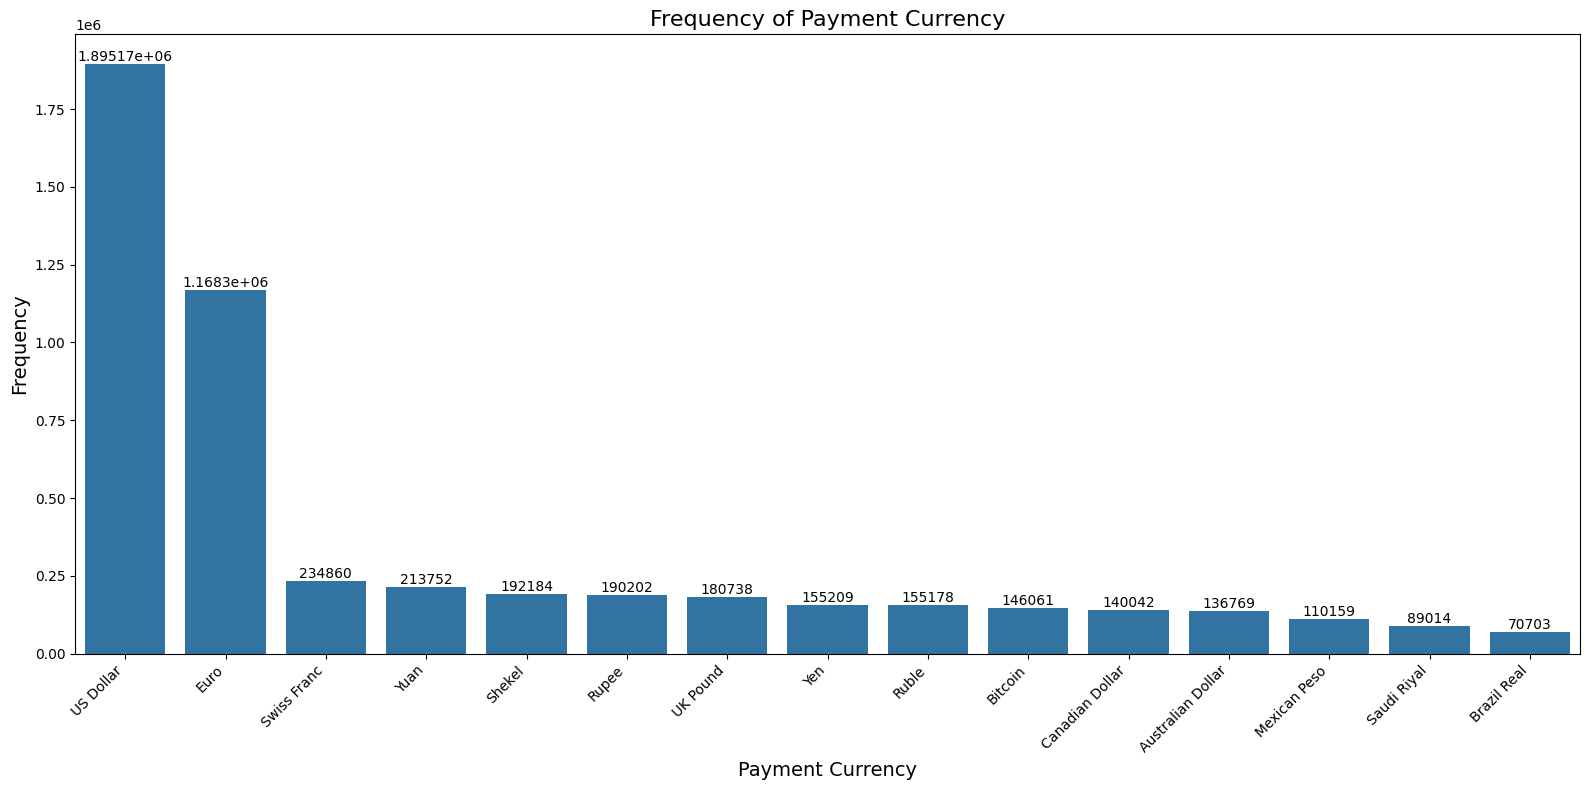

In [19]:
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='Payment Currency', data=df, order=df['Payment Currency'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Frequency of Payment Currency', fontsize=16)
plt.xlabel('Payment Currency', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
for i in ax.containers:
    ax.bar_label(i, fontsize=10)

plt.tight_layout()
plt.show()

### Recieving Currency

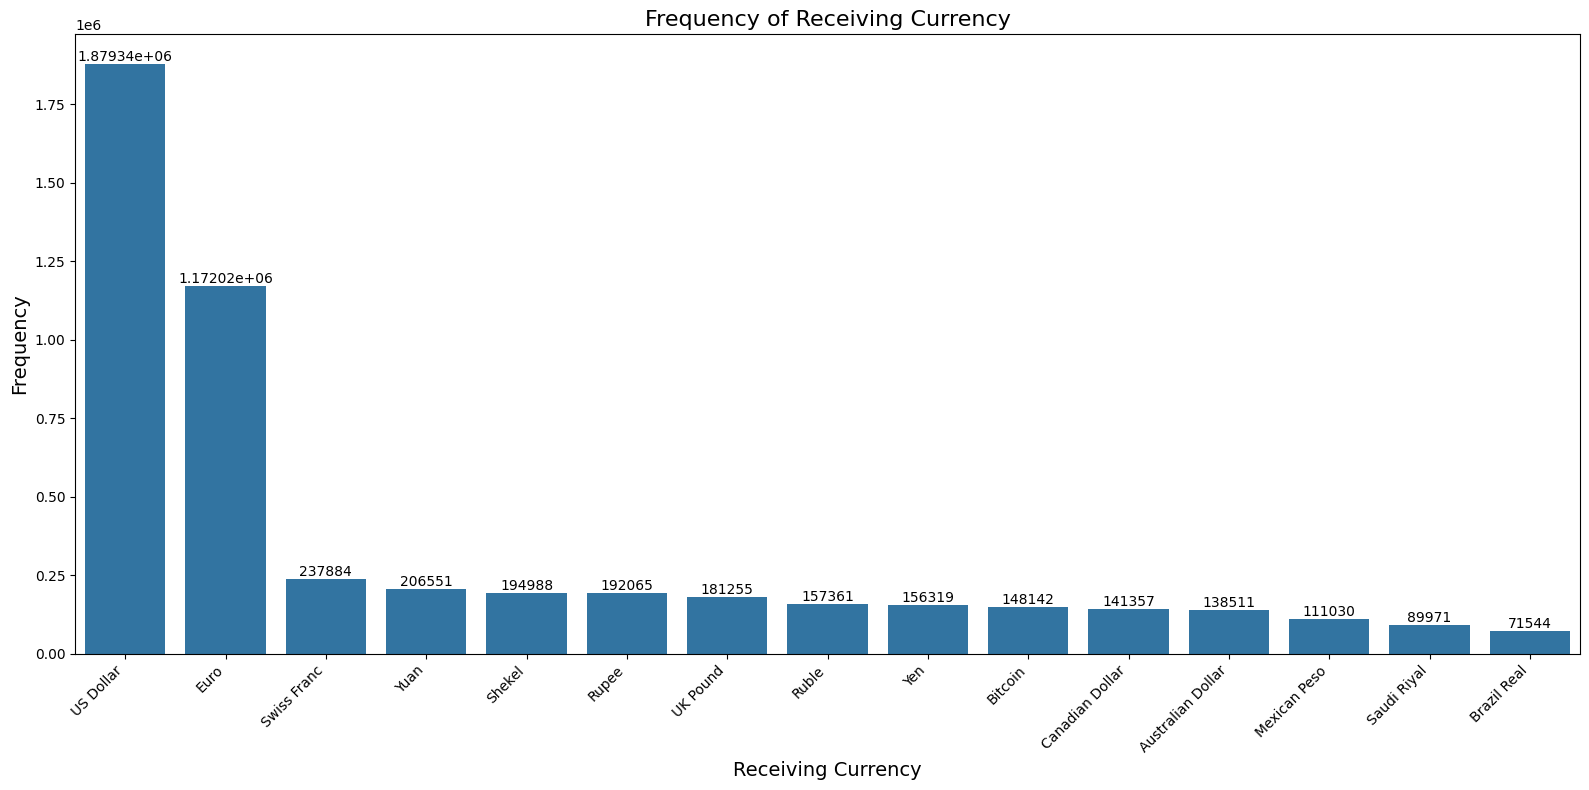

In [20]:
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='Receiving Currency', data=df, order=df['Receiving Currency'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Frequency of Receiving Currency', fontsize=16)
plt.xlabel('Receiving Currency', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
for i in ax.containers:
    ax.bar_label(i, fontsize=10)

plt.tight_layout()
plt.show()

In [21]:
df['Payment Currency'].value_counts()

Payment Currency
US Dollar            1895169
Euro                 1168296
Swiss Franc           234860
Yuan                  213752
Shekel                192184
Rupee                 190202
UK Pound              180738
Yen                   155209
Ruble                 155178
Bitcoin               146061
Canadian Dollar       140042
Australian Dollar     136769
Mexican Peso          110159
Saudi Riyal            89014
Brazil Real            70703
Name: count, dtype: int64

In [22]:
df['Receiving Currency'].value_counts()

Receiving Currency
US Dollar            1879341
Euro                 1172017
Swiss Franc           237884
Yuan                  206551
Shekel                194988
Rupee                 192065
UK Pound              181255
Ruble                 157361
Yen                   156319
Bitcoin               148142
Canadian Dollar       141357
Australian Dollar     138511
Mexican Peso          111030
Saudi Riyal            89971
Brazil Real            71544
Name: count, dtype: int64

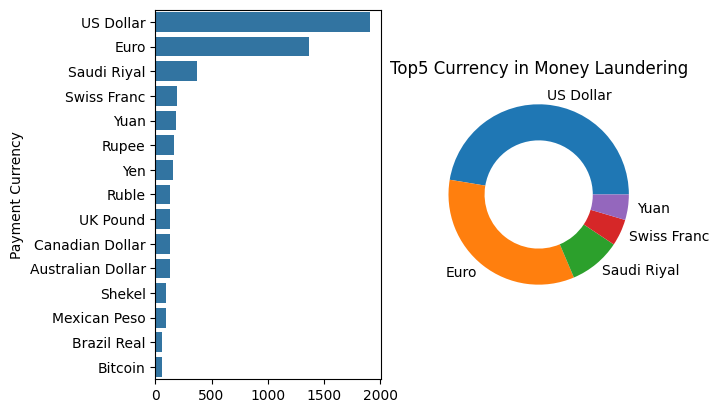

In [23]:
currency=df[df["Is Laundering"]==1]["Payment Currency"].value_counts()
plt.subplot(1,2,1)
#plt.figure(figsize=(5,5))
sns.barplot(y=currency.index,x=currency.values)
plt.subplot(1,2,2)
currency=currency.head()
plt.title("Top5 Currency in Money Laundering")
plt.pie(currency.values,labels=currency.index,wedgeprops=dict(width=0.4));

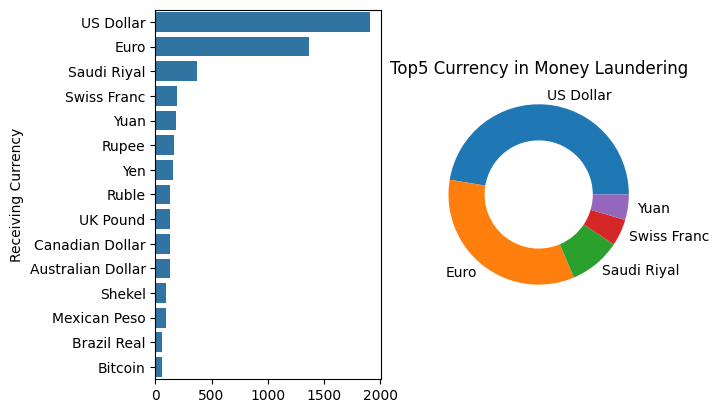

In [24]:
currency=df[df["Is Laundering"]==1]["Receiving Currency"].value_counts()
plt.subplot(1,2,1)
#plt.figure(figsize=(5,5))
sns.barplot(y=currency.index,x=currency.values)
plt.subplot(1,2,2)
currency=currency.head()
plt.title("Top5 Currency in Money Laundering")
plt.pie(currency.values,labels=currency.index,wedgeprops=dict(width=0.4));

It seems like transcations made and recieved with a USD currency are more likely to be laundered.

Let's analyze if the payment currency matches the recieving currency, and what their correlation is with laundering is. My hypothesis is that the currencies might differ for transactions that are classified as laundered, since bad actors might want to cover up their trail to evade suspicion by converting currencies for a particular transaction.

In [25]:
df ['Currency Match'] = (df['Payment Currency'] == df['Receiving Currency']).astype(int)
df['Currency Match'].value_counts()

<ipython-input-25-004f173865de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df ['Currency Match'] = (df['Payment Currency'] == df['Receiving Currency']).astype(int)


Currency Match
1    5006170
0      72166
Name: count, dtype: int64

In [26]:
df['Currency Match'].groupby(df['Is Laundering']).value_counts()

Is Laundering  Currency Match
0              1                 5000993
               0                   72166
1              1                    5177
Name: count, dtype: int64

Ironically, it seems like the ALL currencies match, when it comes to transactions that are marked as laundering! This tells us that currencies of the same transaction type might be more likely to be laundered transactions.

One might think we might need to standardize the currencies to one type (preferably USD). But I would not like to do that, since it introduces some variability in the data fed to the model, which could enable it to make better predictions.

In [111]:
contingency_currency_payment= pd.crosstab(df['Is Laundering'], df['Payment Currency'])
x,p,y,z = st.chi2_contingency(contingency_currency_payment)

if p < 0.05:
    print("There is a relationship")
else:
    print("There is no relationship")

There is a relationship


In [112]:
contingency_currency_receiving= pd.crosstab(df['Is Laundering'], df['Receiving Currency'])
x,p,y,z = st.chi2_contingency(contingency_currency_receiving)

if p < 0.05:
    print("There is a relationship")
else:
    print("There is no relationship")

There is a relationship


## Amount Received and Amount Paid

Since we have a mixture of currencies, for each currency let us visualize the Amount Recieved and Amount Paid with respect to "Is Laundering"

<ipython-input-27-452e8671c724>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usd['Log Amount Received'] = np.log(df_usd['Amount Received'].replace(0, np.nan).dropna())
<ipython-input-27-452e8671c724>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usd['Log Amount Paid'] = np.log(df_usd['Amount Paid'].replace(0, np.nan).dropna())
<ipython-input-27-452e8671c724>:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; plea

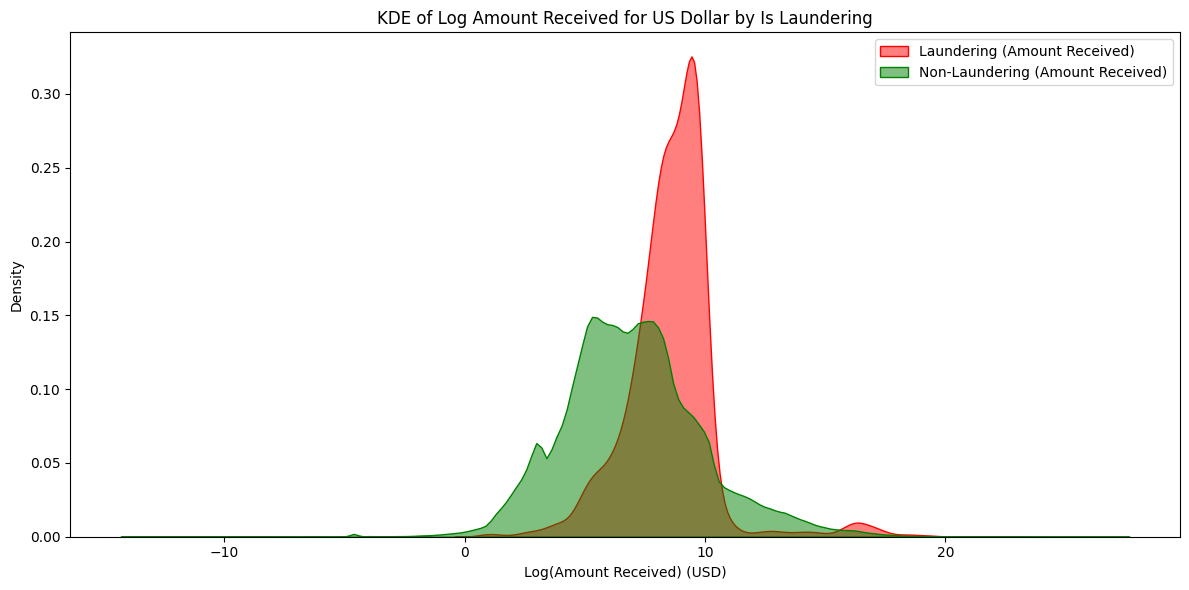

<ipython-input-27-452e8671c724>:36: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_laundering_paid, label='Laundering (Amount Paid)', shade=True, color='darkred', alpha=0.5)
<ipython-input-27-452e8671c724>:37: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_non_laundering_paid, label='Non-Laundering (Amount Paid)', shade=True, color='darkgreen', alpha=0.5)


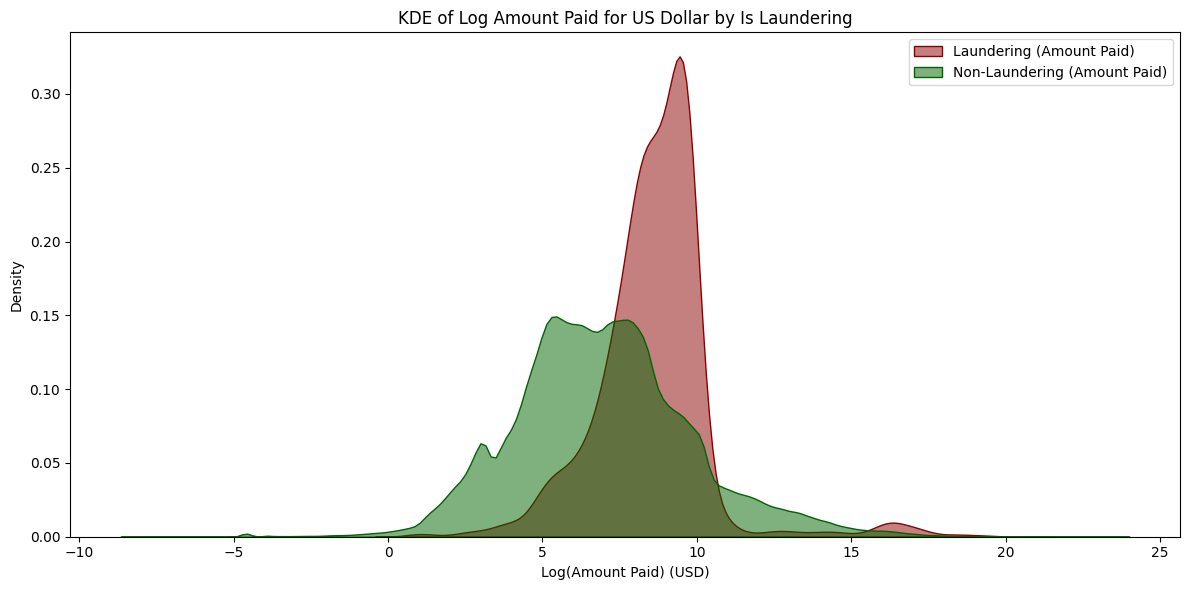

In [27]:
# Filter the dataset for transactions involving US Dollar (USD)
df_usd = df[(df['Receiving Currency'] == 'US Dollar') | (df['Payment Currency'] == 'US Dollar')]

# Log-transform the Amount Received and Amount Paid (handle non-positive values)
df_usd['Log Amount Received'] = np.log(df_usd['Amount Received'].replace(0, np.nan).dropna())
df_usd['Log Amount Paid'] = np.log(df_usd['Amount Paid'].replace(0, np.nan).dropna())

# Separate the data for laundering (1) and non-laundering (0)
df_laundering_received = df_usd[df_usd['Is Laundering'] == 1]['Log Amount Received']
df_non_laundering_received = df_usd[df_usd['Is Laundering'] == 0]['Log Amount Received']

df_laundering_paid = df_usd[df_usd['Is Laundering'] == 1]['Log Amount Paid']
df_non_laundering_paid = df_usd[df_usd['Is Laundering'] == 0]['Log Amount Paid']

# Plotting the KDE for Amount Received
plt.figure(figsize=(12, 6))

# KDE for Amount Received by Is Laundering
sns.kdeplot(df_laundering_received, label='Laundering (Amount Received)', shade=True, color='red', alpha=0.5)
sns.kdeplot(df_non_laundering_received, label='Non-Laundering (Amount Received)', shade=True, color='green', alpha=0.5)

# Add labels and title
plt.title('KDE of Log Amount Received for US Dollar by Is Laundering')
plt.xlabel('Log(Amount Received) (USD)')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Plotting the KDE for Amount Paid
plt.figure(figsize=(12, 6))

# KDE for Amount Paid by Is Laundering
sns.kdeplot(df_laundering_paid, label='Laundering (Amount Paid)', shade=True, color='darkred', alpha=0.5)
sns.kdeplot(df_non_laundering_paid, label='Non-Laundering (Amount Paid)', shade=True, color='darkgreen', alpha=0.5)

# Add labels and title
plt.title('KDE of Log Amount Paid for US Dollar by Is Laundering')
plt.xlabel('Log(Amount Paid) (USD)')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

There are a couple of observations we can make here:
- Laundering transactions appear more concentrated in higher value ranges
- Non-laundering transactions show more variety in their amounts
- There are very few transactions below log value 0 for either category
- Bothe the amount recieved and the amount paid seen to have have the same distribution.

So, we can deduce that laundered transactions have higher amounts than non-laundered transactions. Let us check if this is also true for other currencies.

<ipython-input-28-284ef69a0d4b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Received'] = np.log(df_currency['Amount Received'].replace(0, np.nan).dropna())
<ipython-input-28-284ef69a0d4b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Paid'] = np.log(df_currency['Amount Paid'].replace(0, np.nan).dropna())
<ipython-input-28-284ef69a0d4b>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in

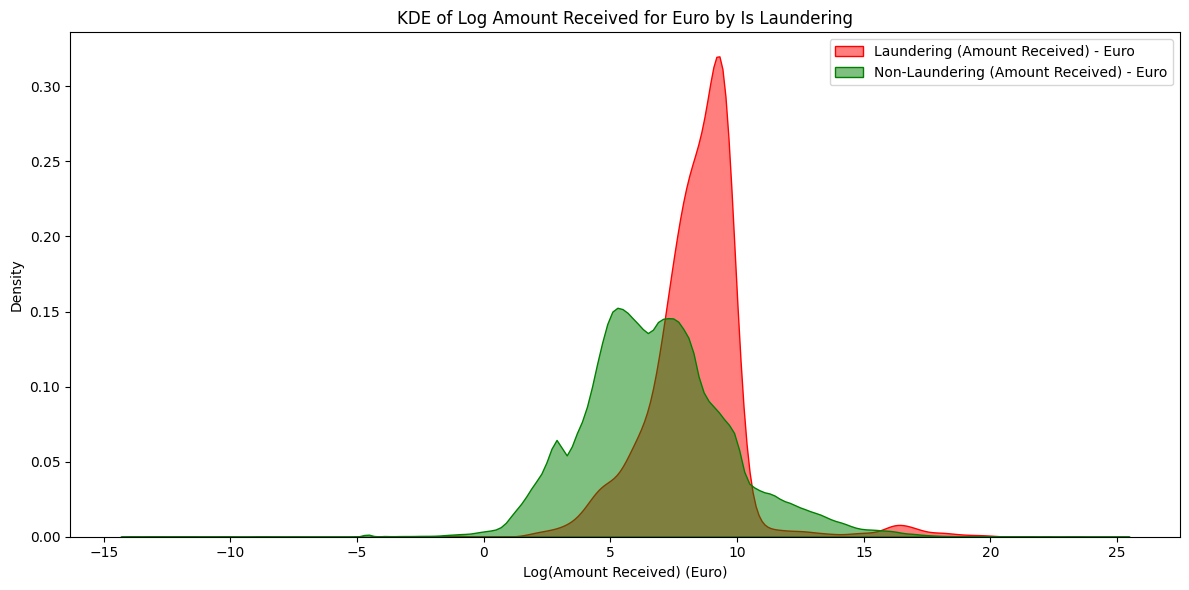

<ipython-input-28-284ef69a0d4b>:38: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_laundering_paid, label=f'Laundering (Amount Paid) - {currency}', shade=True, color='darkred', alpha=0.5)
<ipython-input-28-284ef69a0d4b>:39: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_non_laundering_paid, label=f'Non-Laundering (Amount Paid) - {currency}', shade=True, color='darkgreen', alpha=0.5)


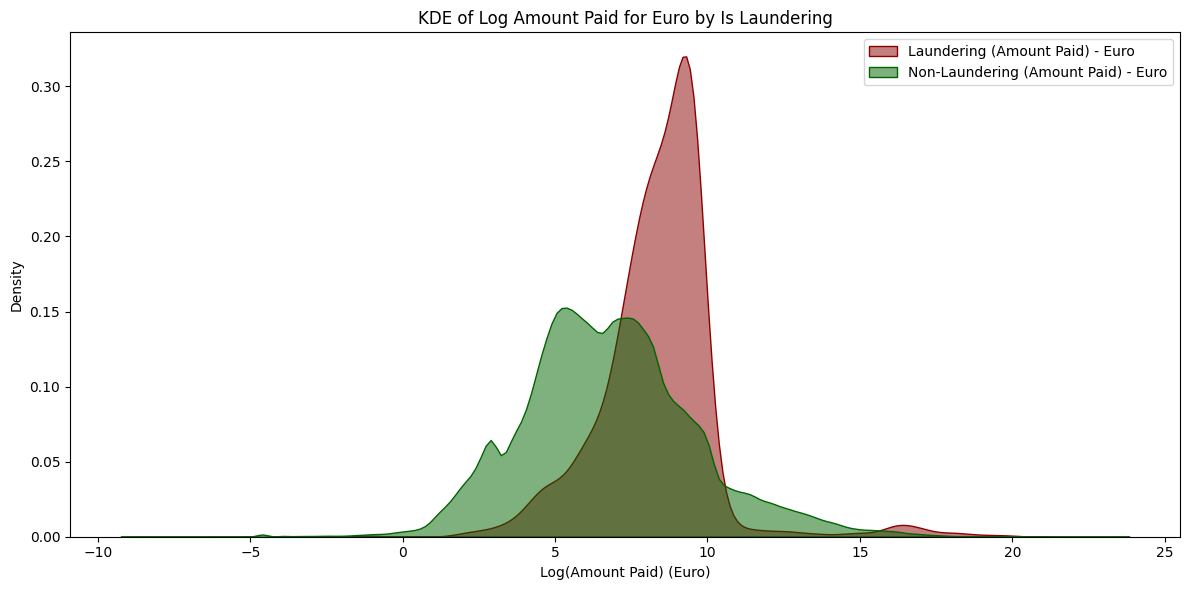

<ipython-input-28-284ef69a0d4b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Received'] = np.log(df_currency['Amount Received'].replace(0, np.nan).dropna())
<ipython-input-28-284ef69a0d4b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Paid'] = np.log(df_currency['Amount Paid'].replace(0, np.nan).dropna())
<ipython-input-28-284ef69a0d4b>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in

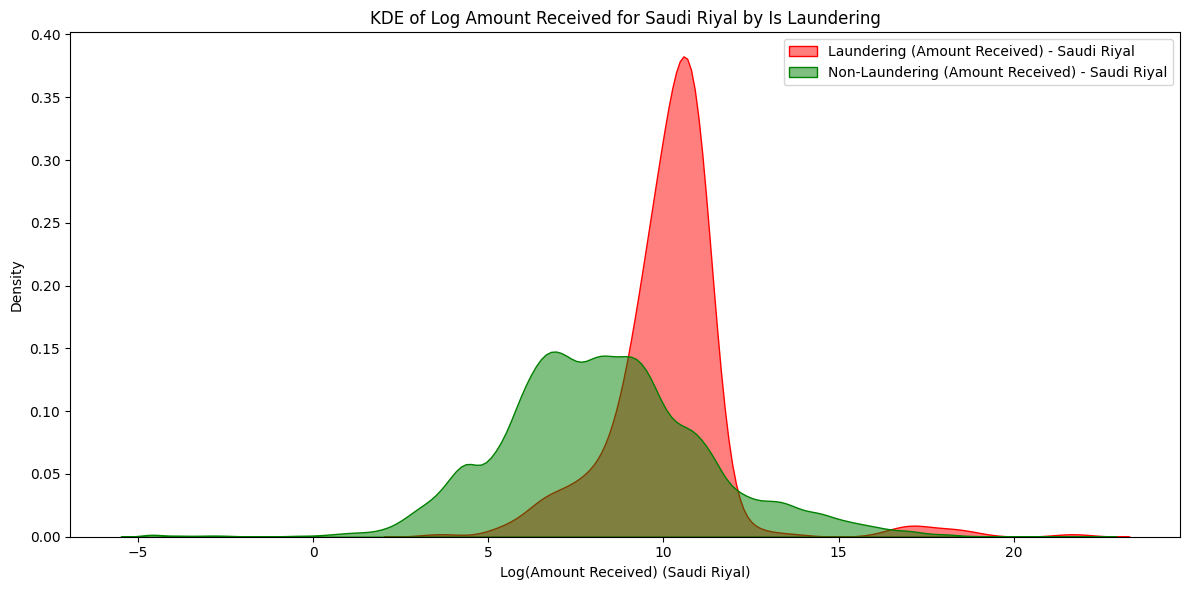

<ipython-input-28-284ef69a0d4b>:38: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_laundering_paid, label=f'Laundering (Amount Paid) - {currency}', shade=True, color='darkred', alpha=0.5)
<ipython-input-28-284ef69a0d4b>:39: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_non_laundering_paid, label=f'Non-Laundering (Amount Paid) - {currency}', shade=True, color='darkgreen', alpha=0.5)


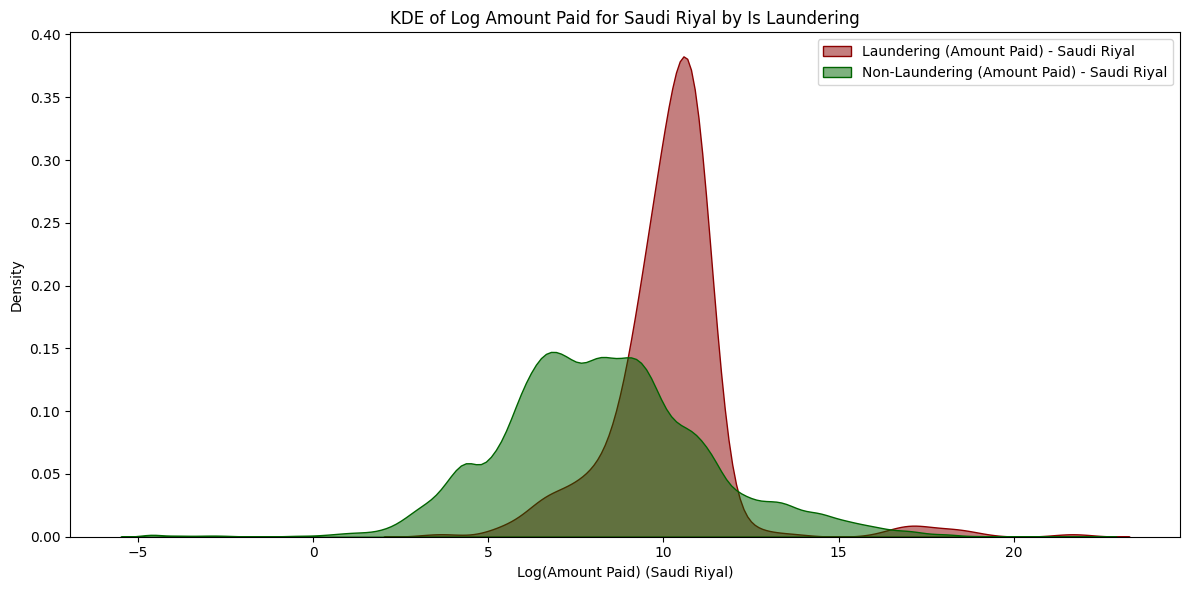

<ipython-input-28-284ef69a0d4b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Received'] = np.log(df_currency['Amount Received'].replace(0, np.nan).dropna())
<ipython-input-28-284ef69a0d4b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Paid'] = np.log(df_currency['Amount Paid'].replace(0, np.nan).dropna())
<ipython-input-28-284ef69a0d4b>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in

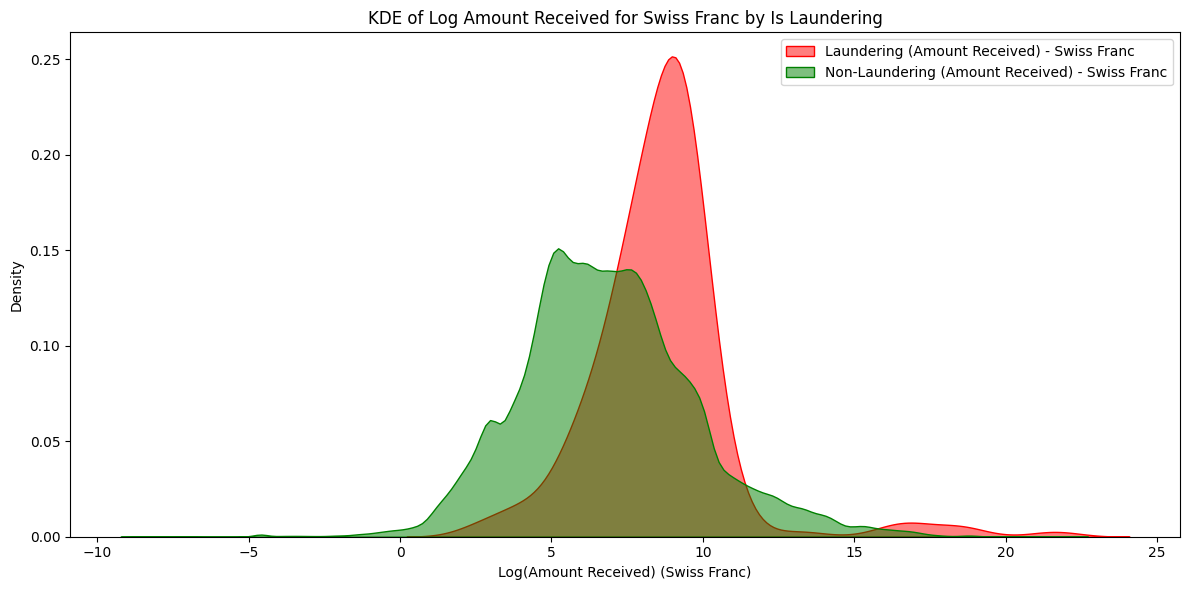

<ipython-input-28-284ef69a0d4b>:38: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_laundering_paid, label=f'Laundering (Amount Paid) - {currency}', shade=True, color='darkred', alpha=0.5)
<ipython-input-28-284ef69a0d4b>:39: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_non_laundering_paid, label=f'Non-Laundering (Amount Paid) - {currency}', shade=True, color='darkgreen', alpha=0.5)


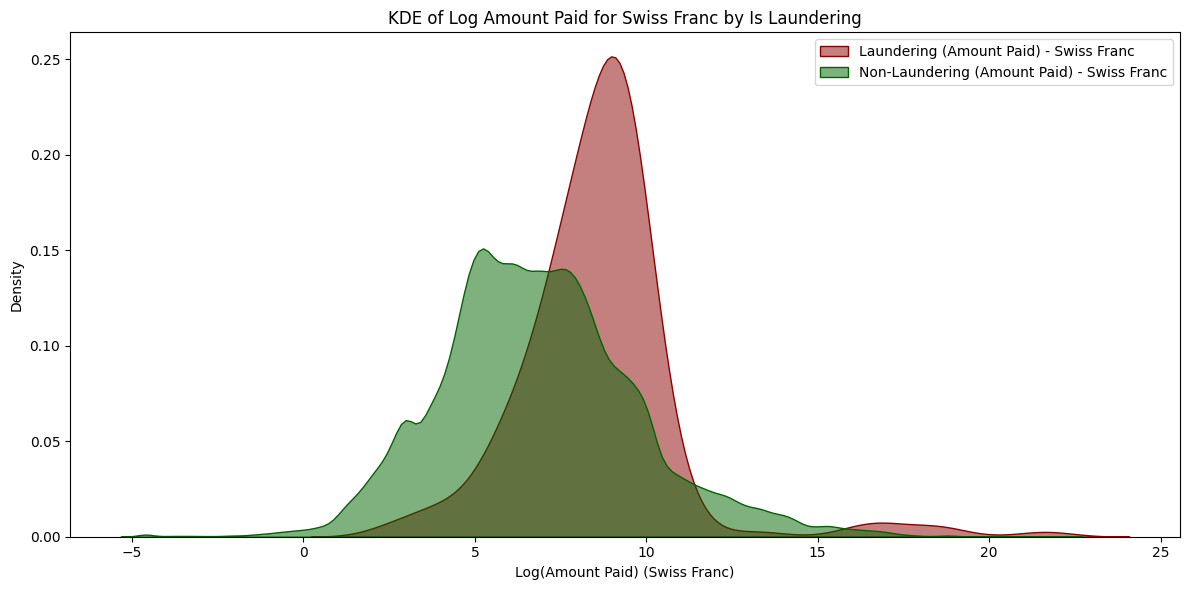

<ipython-input-28-284ef69a0d4b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Received'] = np.log(df_currency['Amount Received'].replace(0, np.nan).dropna())
<ipython-input-28-284ef69a0d4b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Paid'] = np.log(df_currency['Amount Paid'].replace(0, np.nan).dropna())
<ipython-input-28-284ef69a0d4b>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in

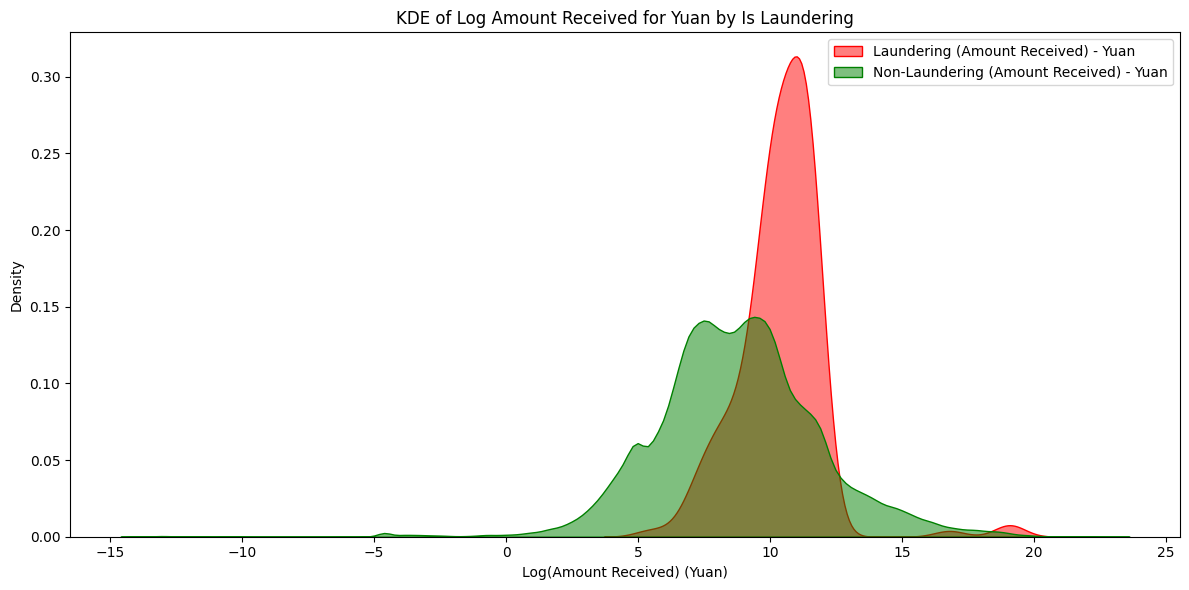

<ipython-input-28-284ef69a0d4b>:38: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_laundering_paid, label=f'Laundering (Amount Paid) - {currency}', shade=True, color='darkred', alpha=0.5)
<ipython-input-28-284ef69a0d4b>:39: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_non_laundering_paid, label=f'Non-Laundering (Amount Paid) - {currency}', shade=True, color='darkgreen', alpha=0.5)


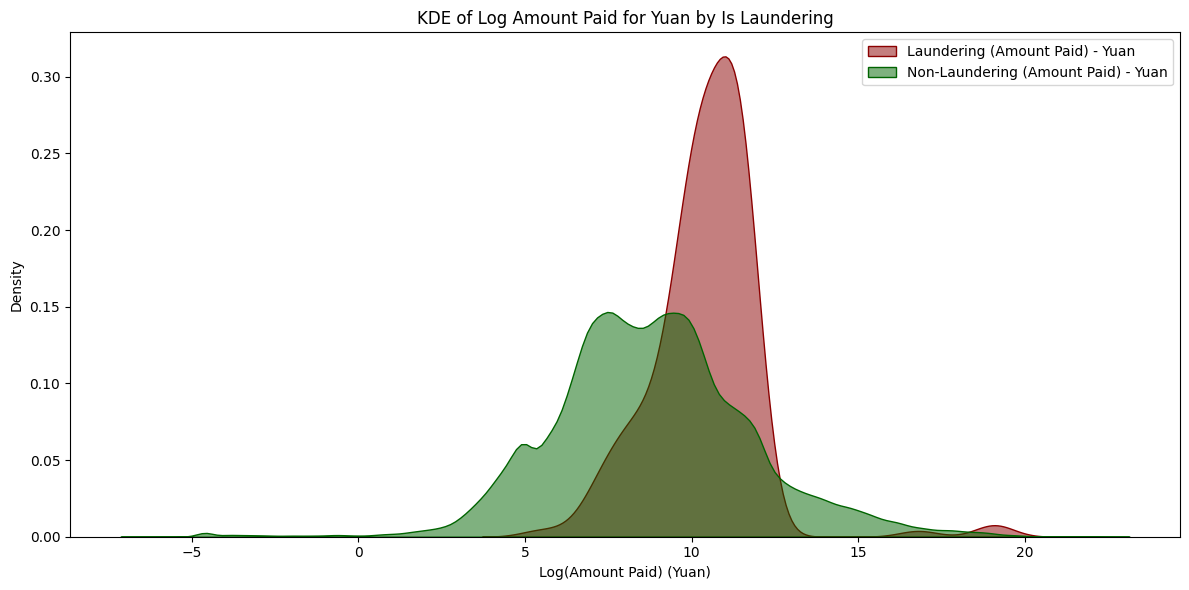

<ipython-input-28-284ef69a0d4b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Received'] = np.log(df_currency['Amount Received'].replace(0, np.nan).dropna())
<ipython-input-28-284ef69a0d4b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Paid'] = np.log(df_currency['Amount Paid'].replace(0, np.nan).dropna())
<ipython-input-28-284ef69a0d4b>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in

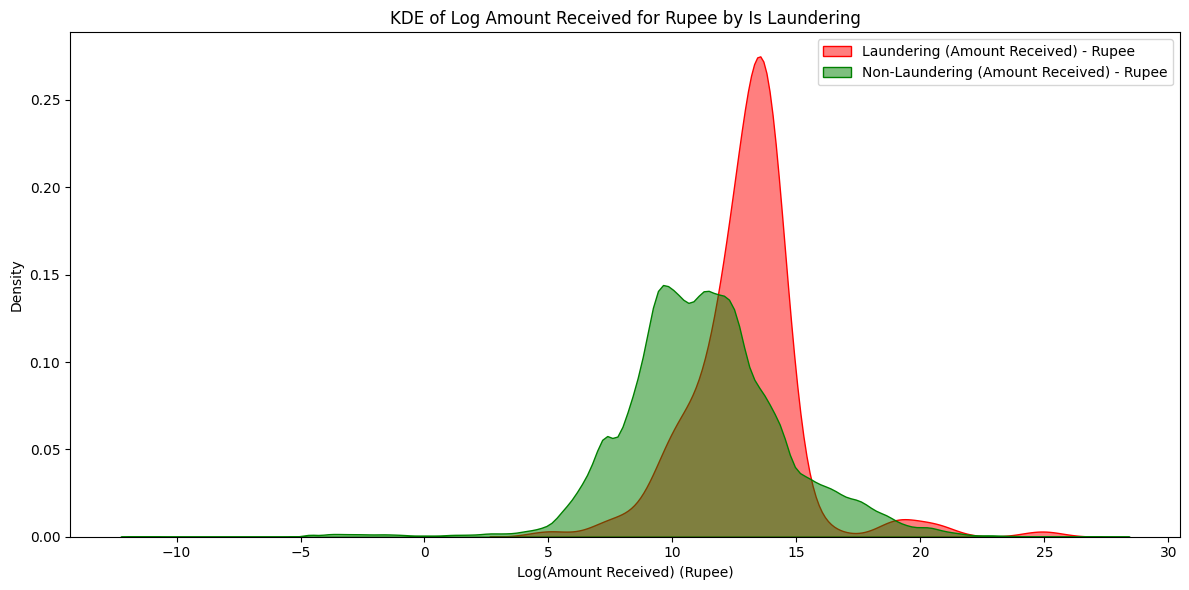

<ipython-input-28-284ef69a0d4b>:38: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_laundering_paid, label=f'Laundering (Amount Paid) - {currency}', shade=True, color='darkred', alpha=0.5)
<ipython-input-28-284ef69a0d4b>:39: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_non_laundering_paid, label=f'Non-Laundering (Amount Paid) - {currency}', shade=True, color='darkgreen', alpha=0.5)


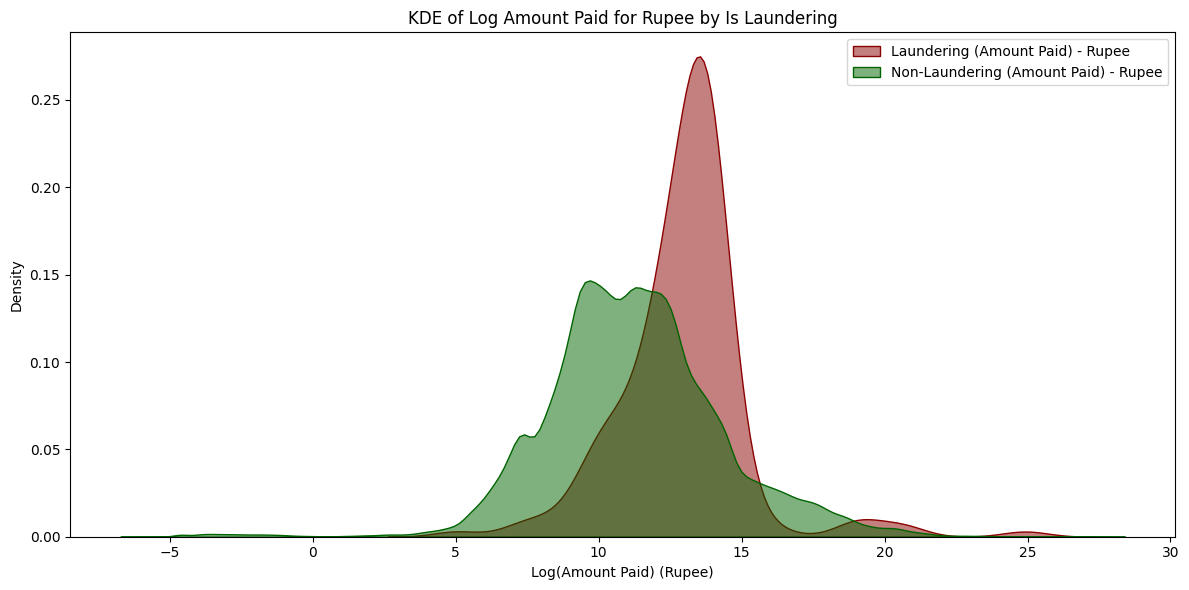

<ipython-input-28-284ef69a0d4b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Received'] = np.log(df_currency['Amount Received'].replace(0, np.nan).dropna())
<ipython-input-28-284ef69a0d4b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Paid'] = np.log(df_currency['Amount Paid'].replace(0, np.nan).dropna())
<ipython-input-28-284ef69a0d4b>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in

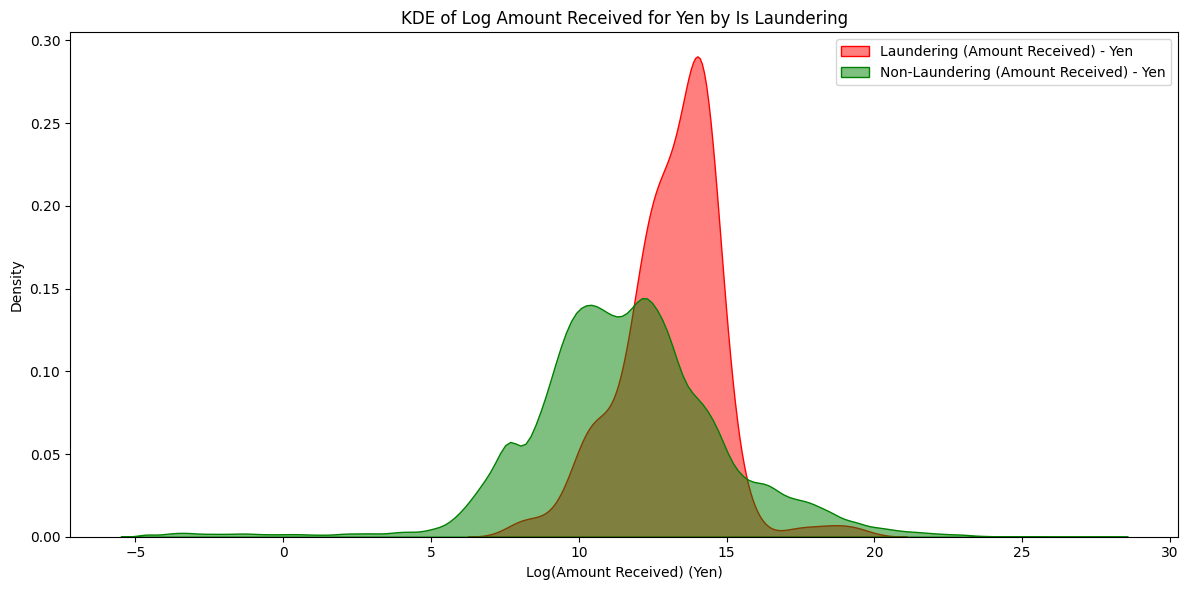

<ipython-input-28-284ef69a0d4b>:38: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_laundering_paid, label=f'Laundering (Amount Paid) - {currency}', shade=True, color='darkred', alpha=0.5)
<ipython-input-28-284ef69a0d4b>:39: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_non_laundering_paid, label=f'Non-Laundering (Amount Paid) - {currency}', shade=True, color='darkgreen', alpha=0.5)


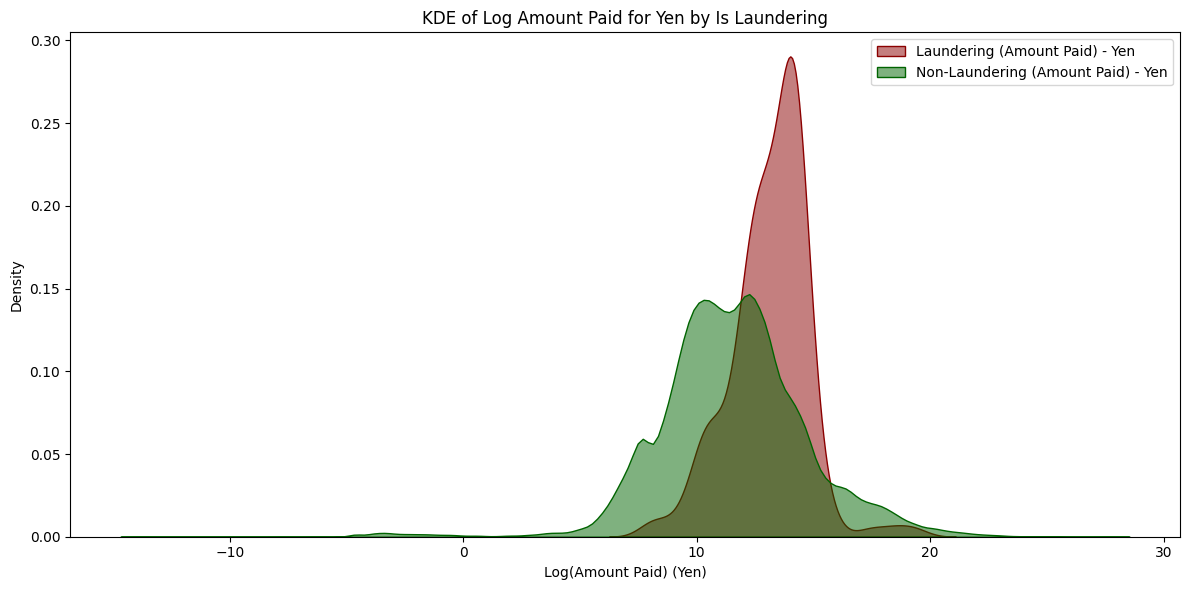

<ipython-input-28-284ef69a0d4b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Received'] = np.log(df_currency['Amount Received'].replace(0, np.nan).dropna())
<ipython-input-28-284ef69a0d4b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Paid'] = np.log(df_currency['Amount Paid'].replace(0, np.nan).dropna())
<ipython-input-28-284ef69a0d4b>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in

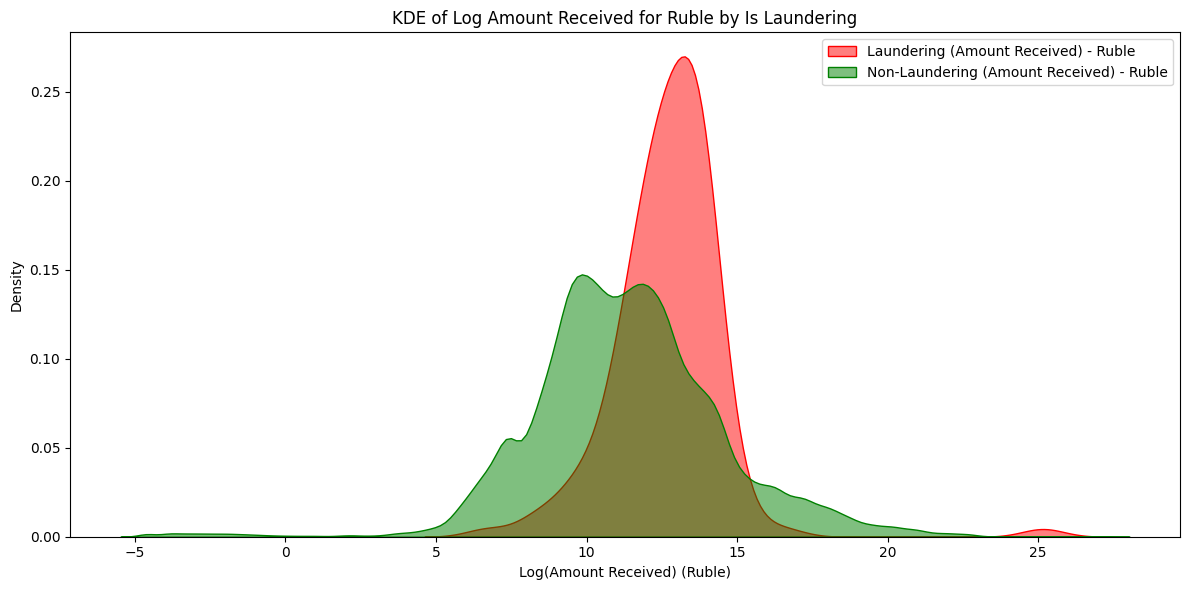

<ipython-input-28-284ef69a0d4b>:38: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_laundering_paid, label=f'Laundering (Amount Paid) - {currency}', shade=True, color='darkred', alpha=0.5)
<ipython-input-28-284ef69a0d4b>:39: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_non_laundering_paid, label=f'Non-Laundering (Amount Paid) - {currency}', shade=True, color='darkgreen', alpha=0.5)


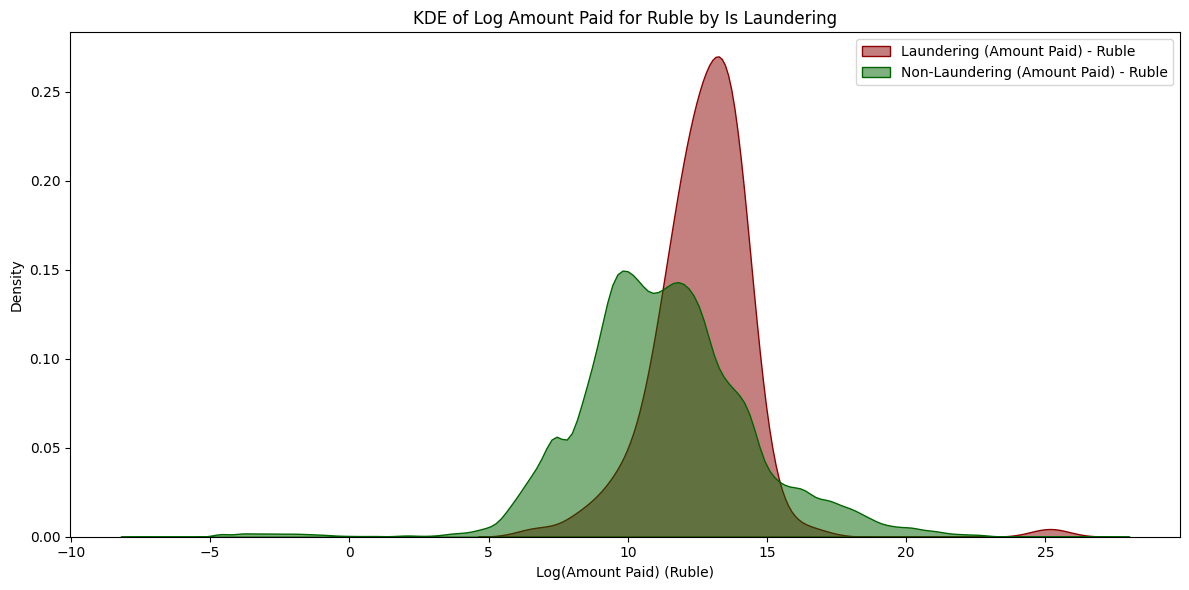

<ipython-input-28-284ef69a0d4b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Received'] = np.log(df_currency['Amount Received'].replace(0, np.nan).dropna())
<ipython-input-28-284ef69a0d4b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Paid'] = np.log(df_currency['Amount Paid'].replace(0, np.nan).dropna())
<ipython-input-28-284ef69a0d4b>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in

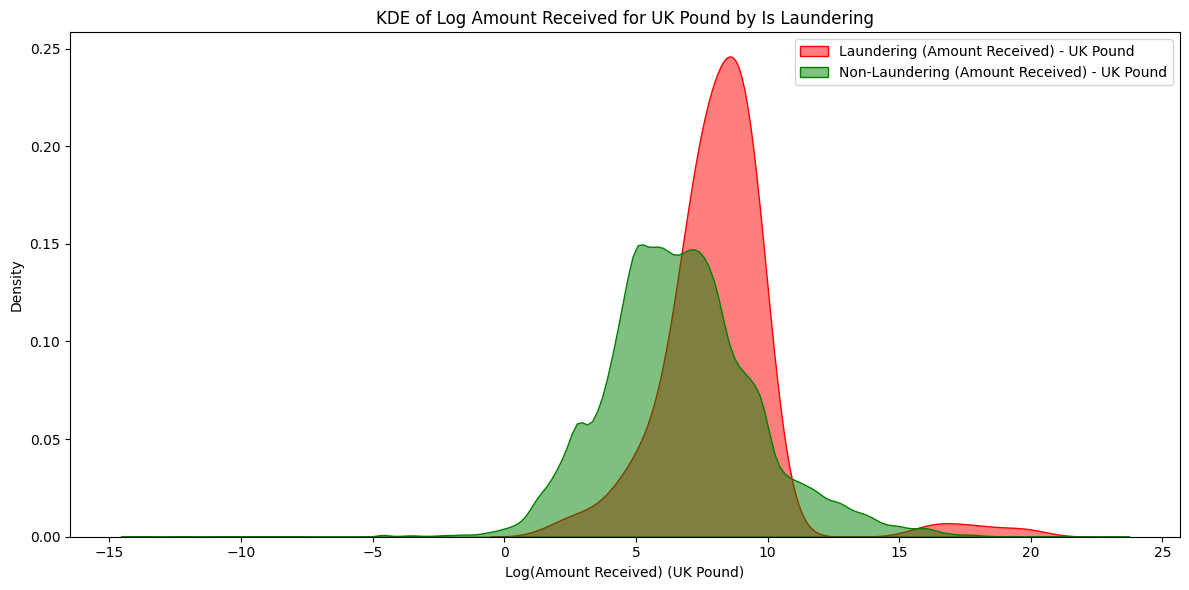

<ipython-input-28-284ef69a0d4b>:38: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_laundering_paid, label=f'Laundering (Amount Paid) - {currency}', shade=True, color='darkred', alpha=0.5)
<ipython-input-28-284ef69a0d4b>:39: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_non_laundering_paid, label=f'Non-Laundering (Amount Paid) - {currency}', shade=True, color='darkgreen', alpha=0.5)


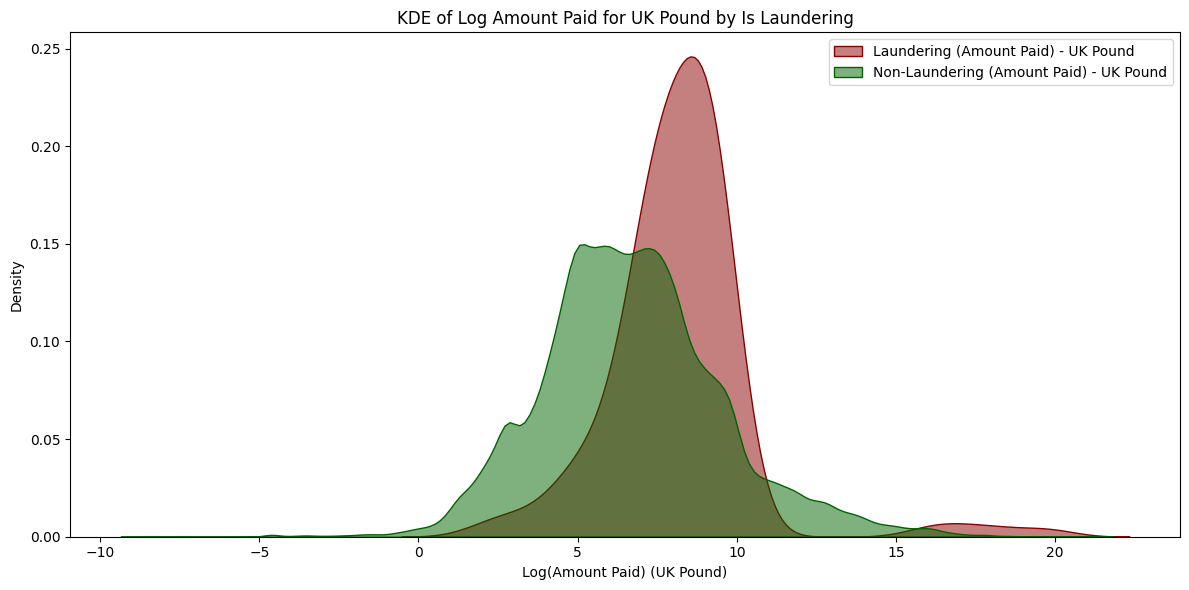

<ipython-input-28-284ef69a0d4b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Received'] = np.log(df_currency['Amount Received'].replace(0, np.nan).dropna())
<ipython-input-28-284ef69a0d4b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Paid'] = np.log(df_currency['Amount Paid'].replace(0, np.nan).dropna())
<ipython-input-28-284ef69a0d4b>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in

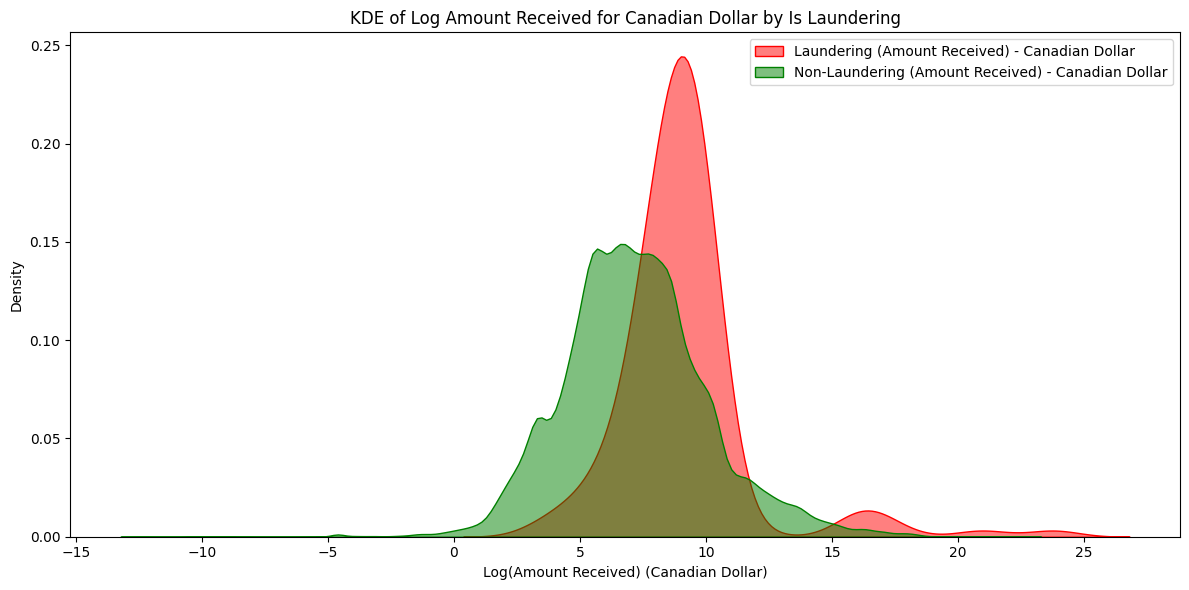

<ipython-input-28-284ef69a0d4b>:38: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_laundering_paid, label=f'Laundering (Amount Paid) - {currency}', shade=True, color='darkred', alpha=0.5)
<ipython-input-28-284ef69a0d4b>:39: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_non_laundering_paid, label=f'Non-Laundering (Amount Paid) - {currency}', shade=True, color='darkgreen', alpha=0.5)


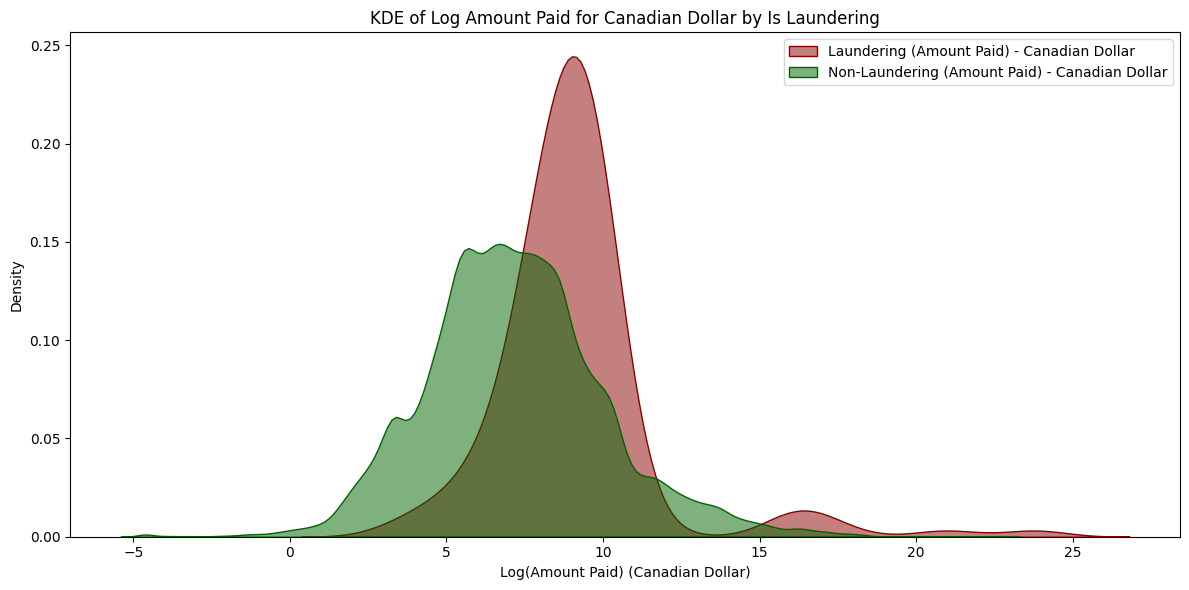

<ipython-input-28-284ef69a0d4b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Received'] = np.log(df_currency['Amount Received'].replace(0, np.nan).dropna())
<ipython-input-28-284ef69a0d4b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Paid'] = np.log(df_currency['Amount Paid'].replace(0, np.nan).dropna())
<ipython-input-28-284ef69a0d4b>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in

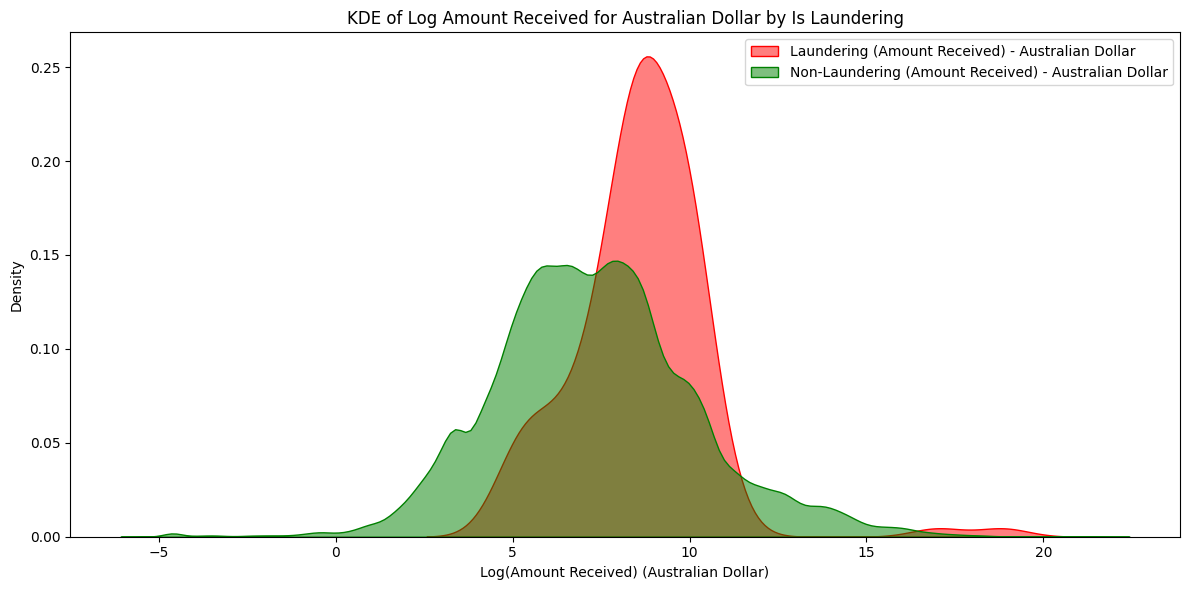

<ipython-input-28-284ef69a0d4b>:38: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_laundering_paid, label=f'Laundering (Amount Paid) - {currency}', shade=True, color='darkred', alpha=0.5)
<ipython-input-28-284ef69a0d4b>:39: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_non_laundering_paid, label=f'Non-Laundering (Amount Paid) - {currency}', shade=True, color='darkgreen', alpha=0.5)


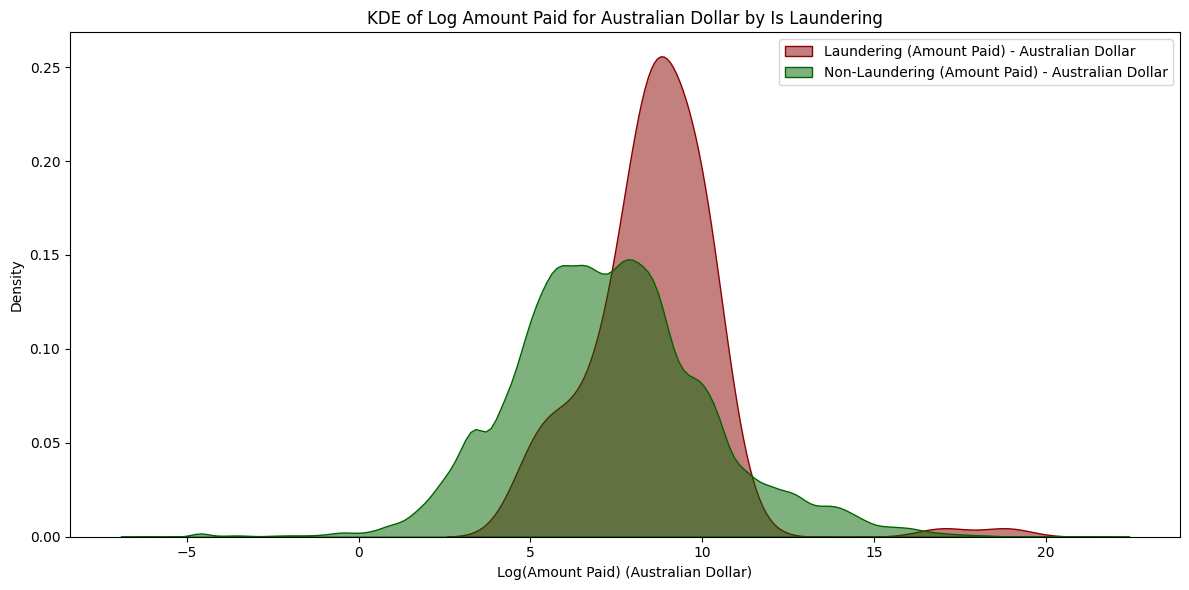

<ipython-input-28-284ef69a0d4b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Received'] = np.log(df_currency['Amount Received'].replace(0, np.nan).dropna())
<ipython-input-28-284ef69a0d4b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Paid'] = np.log(df_currency['Amount Paid'].replace(0, np.nan).dropna())
<ipython-input-28-284ef69a0d4b>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in

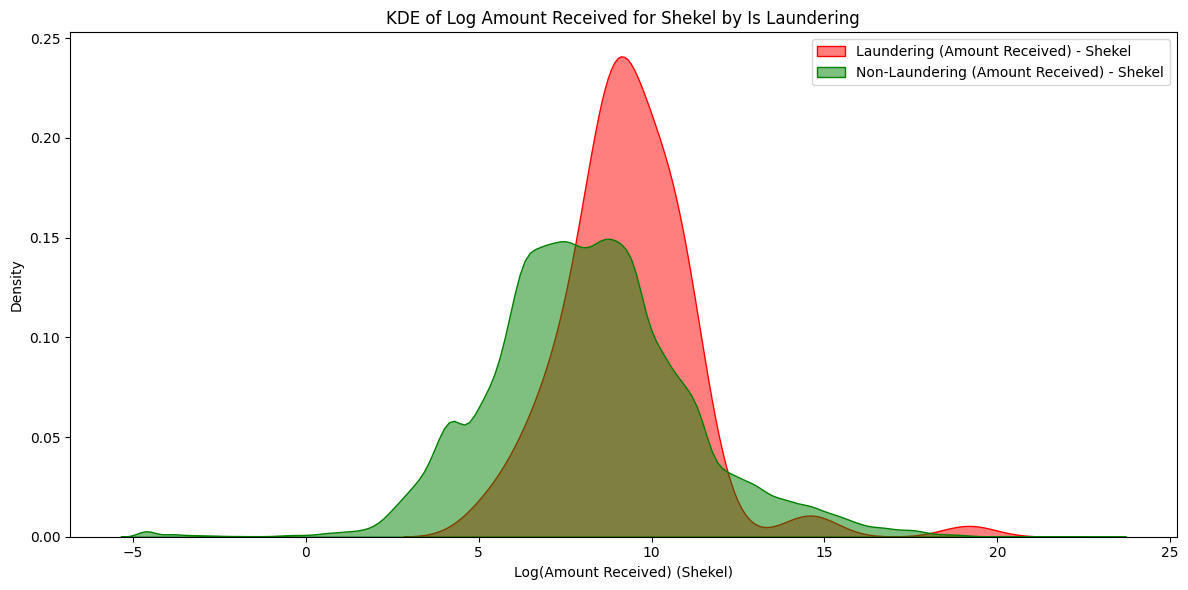

<ipython-input-28-284ef69a0d4b>:38: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_laundering_paid, label=f'Laundering (Amount Paid) - {currency}', shade=True, color='darkred', alpha=0.5)
<ipython-input-28-284ef69a0d4b>:39: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_non_laundering_paid, label=f'Non-Laundering (Amount Paid) - {currency}', shade=True, color='darkgreen', alpha=0.5)


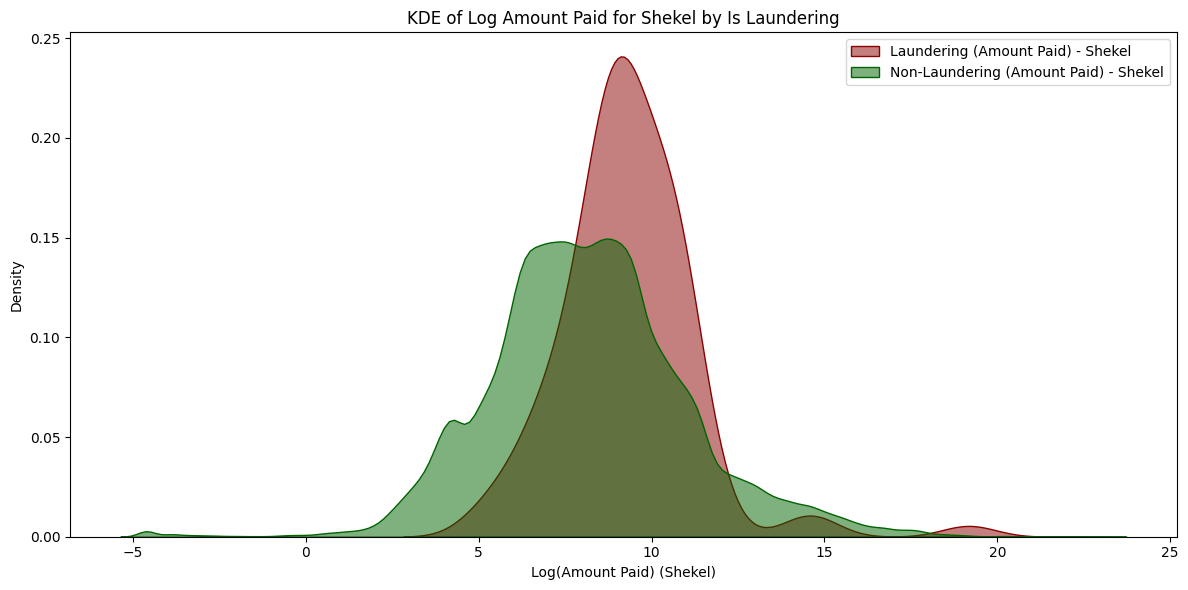

<ipython-input-28-284ef69a0d4b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Received'] = np.log(df_currency['Amount Received'].replace(0, np.nan).dropna())
<ipython-input-28-284ef69a0d4b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Paid'] = np.log(df_currency['Amount Paid'].replace(0, np.nan).dropna())
<ipython-input-28-284ef69a0d4b>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in

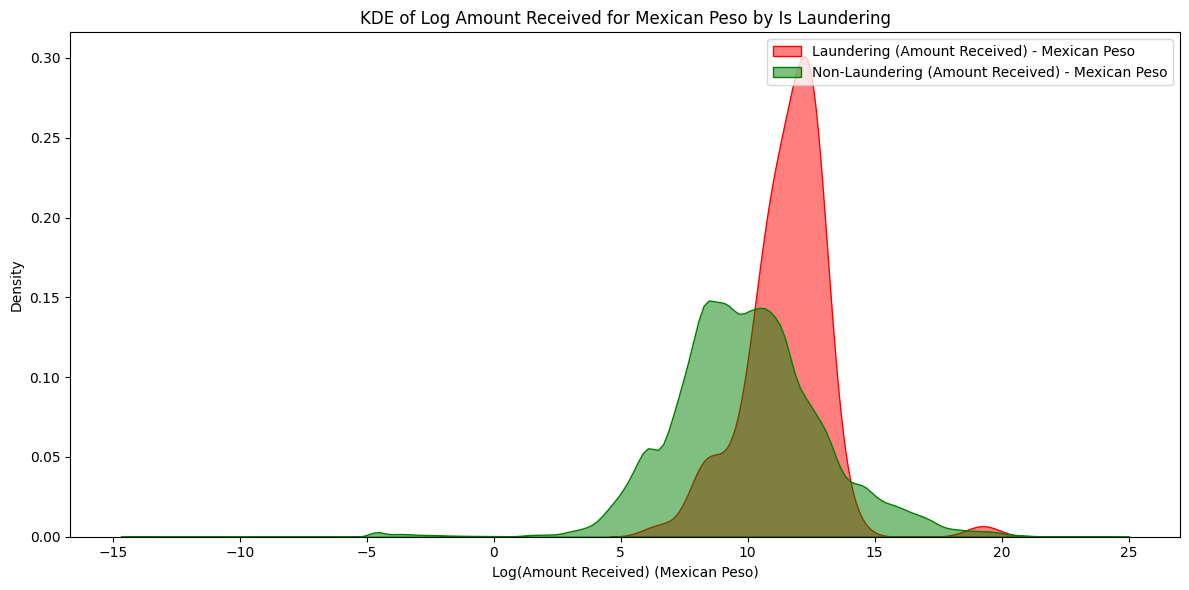

<ipython-input-28-284ef69a0d4b>:38: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_laundering_paid, label=f'Laundering (Amount Paid) - {currency}', shade=True, color='darkred', alpha=0.5)
<ipython-input-28-284ef69a0d4b>:39: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_non_laundering_paid, label=f'Non-Laundering (Amount Paid) - {currency}', shade=True, color='darkgreen', alpha=0.5)


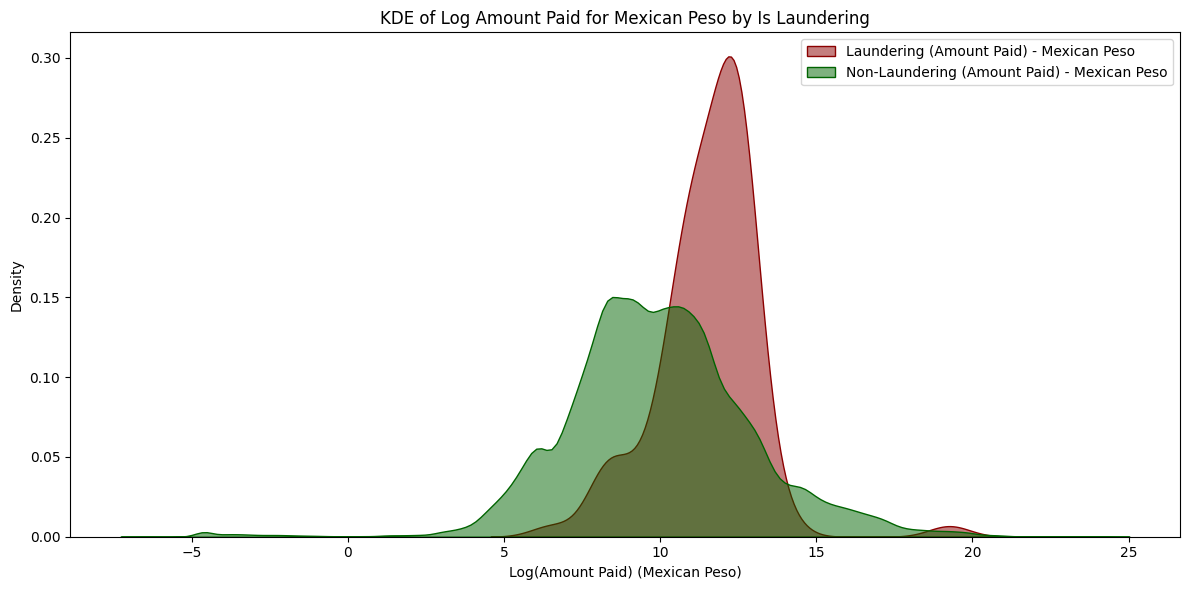

<ipython-input-28-284ef69a0d4b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Received'] = np.log(df_currency['Amount Received'].replace(0, np.nan).dropna())
<ipython-input-28-284ef69a0d4b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Paid'] = np.log(df_currency['Amount Paid'].replace(0, np.nan).dropna())
<ipython-input-28-284ef69a0d4b>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in

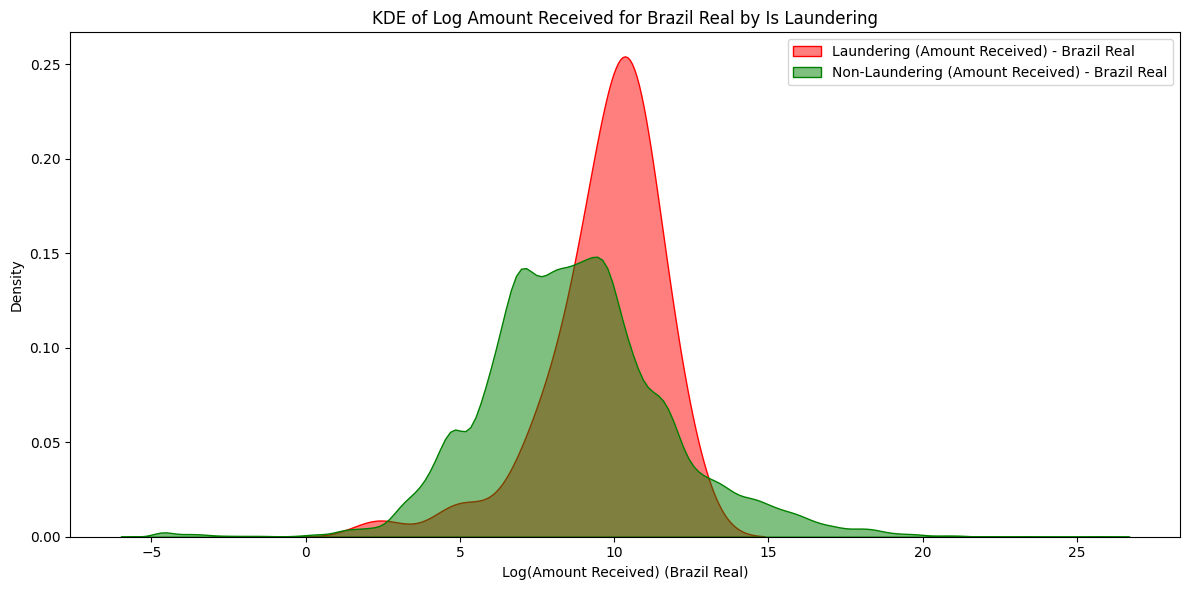

<ipython-input-28-284ef69a0d4b>:38: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_laundering_paid, label=f'Laundering (Amount Paid) - {currency}', shade=True, color='darkred', alpha=0.5)
<ipython-input-28-284ef69a0d4b>:39: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_non_laundering_paid, label=f'Non-Laundering (Amount Paid) - {currency}', shade=True, color='darkgreen', alpha=0.5)


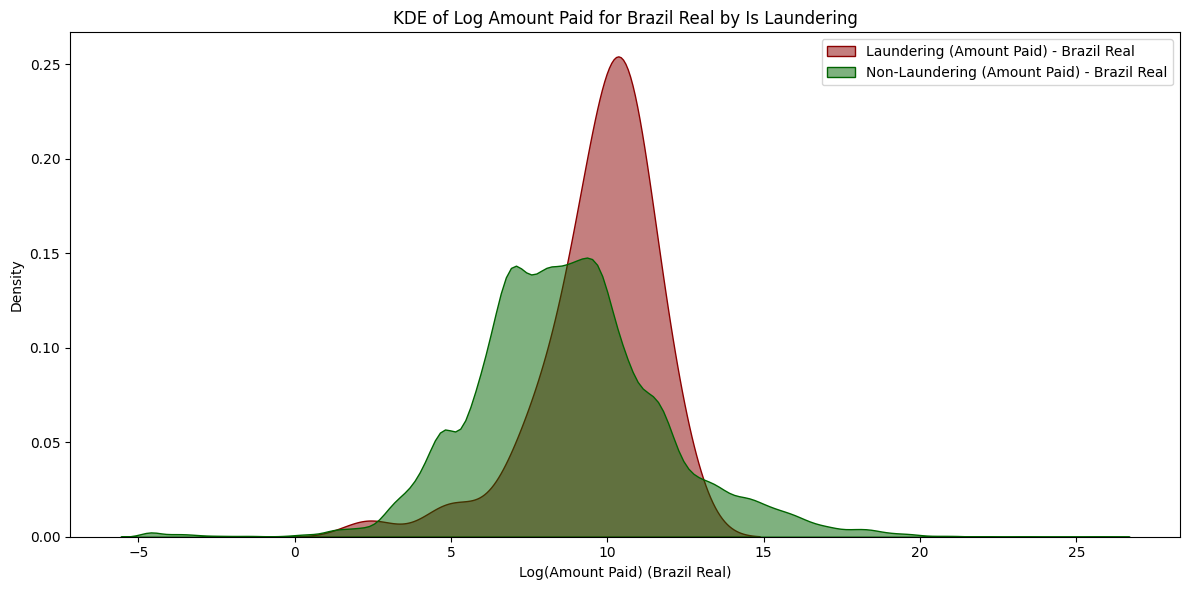

<ipython-input-28-284ef69a0d4b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Received'] = np.log(df_currency['Amount Received'].replace(0, np.nan).dropna())
<ipython-input-28-284ef69a0d4b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Paid'] = np.log(df_currency['Amount Paid'].replace(0, np.nan).dropna())
<ipython-input-28-284ef69a0d4b>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in

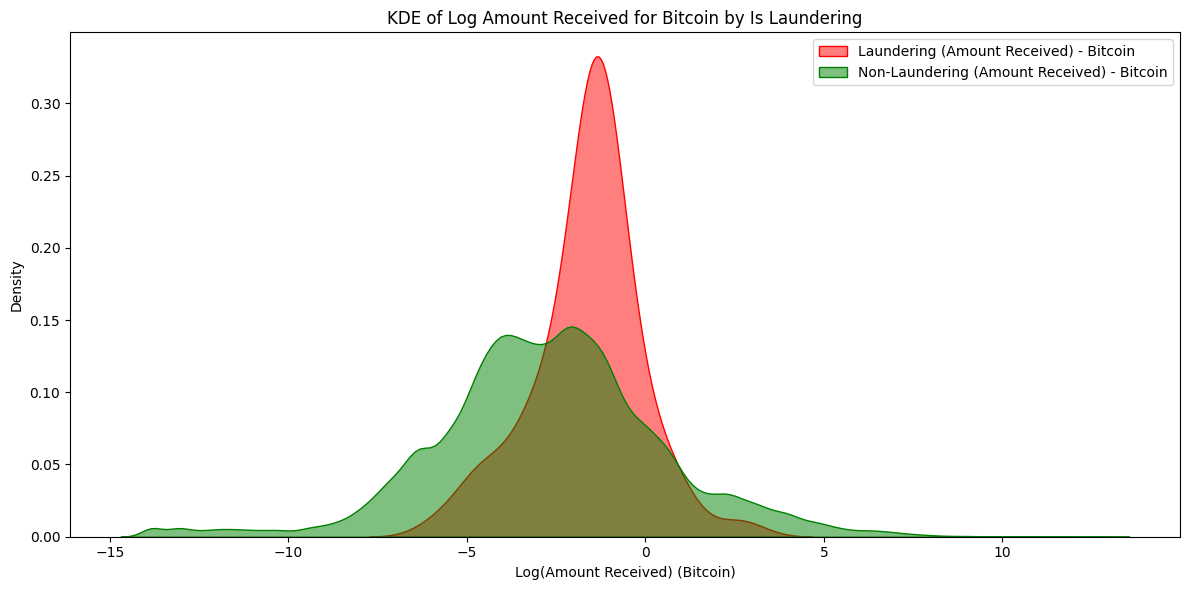

<ipython-input-28-284ef69a0d4b>:38: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_laundering_paid, label=f'Laundering (Amount Paid) - {currency}', shade=True, color='darkred', alpha=0.5)
<ipython-input-28-284ef69a0d4b>:39: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_non_laundering_paid, label=f'Non-Laundering (Amount Paid) - {currency}', shade=True, color='darkgreen', alpha=0.5)


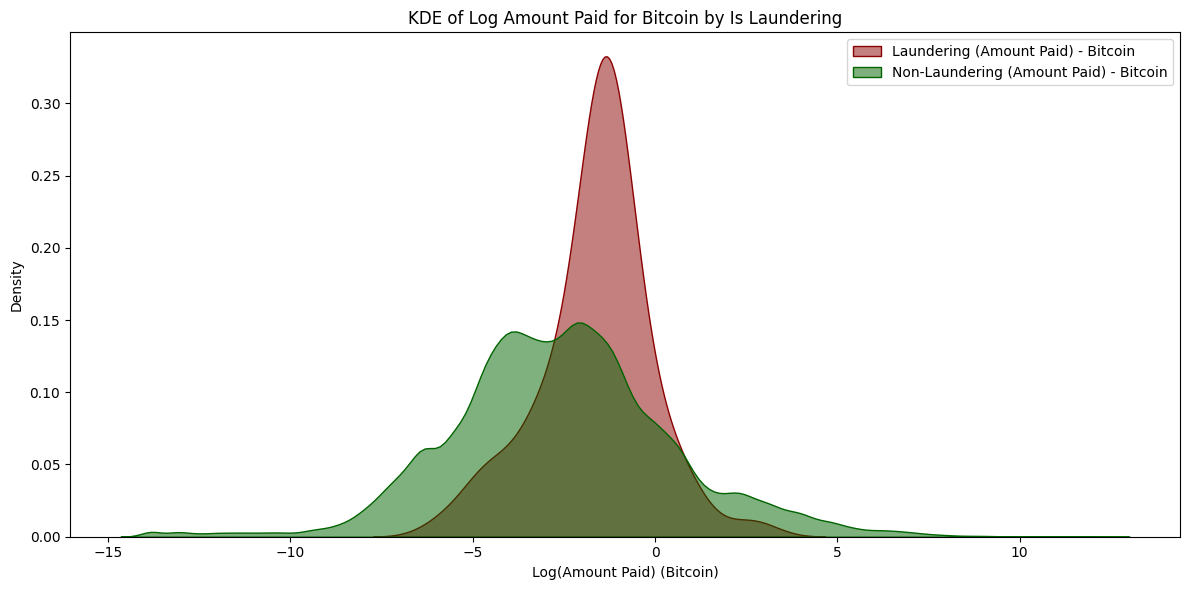

In [28]:
# List of currencies to visualize
currencies = [
    'Euro', 'Saudi Riyal', 'Swiss Franc', 'Yuan', 'Rupee', 'Yen', 'Ruble',
    'UK Pound', 'Canadian Dollar', 'Australian Dollar', 'Shekel', 'Mexican Peso',
    'Brazil Real', 'Bitcoin'
]



def plot_kde_for_currency(df, currency):

    df_currency = df[(df['Receiving Currency'] == currency) | (df['Payment Currency'] == currency)]


    df_currency['Log Amount Received'] = np.log(df_currency['Amount Received'].replace(0, np.nan).dropna())
    df_currency['Log Amount Paid'] = np.log(df_currency['Amount Paid'].replace(0, np.nan).dropna())


    df_laundering_received = df_currency[df_currency['Is Laundering'] == 1]['Log Amount Received']
    df_non_laundering_received = df_currency[df_currency['Is Laundering'] == 0]['Log Amount Received']

    df_laundering_paid = df_currency[df_currency['Is Laundering'] == 1]['Log Amount Paid']
    df_non_laundering_paid = df_currency[df_currency['Is Laundering'] == 0]['Log Amount Paid']


    plt.figure(figsize=(12, 6))
    sns.kdeplot(df_laundering_received, label=f'Laundering (Amount Received) - {currency}', shade=True, color='red', alpha=0.5)
    sns.kdeplot(df_non_laundering_received, label=f'Non-Laundering (Amount Received) - {currency}', shade=True, color='green', alpha=0.5)
    plt.title(f'KDE of Log Amount Received for {currency} by Is Laundering')
    plt.xlabel(f'Log(Amount Received) ({currency})')
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plotting the KDE for Amount Paid
    plt.figure(figsize=(12, 6))
    sns.kdeplot(df_laundering_paid, label=f'Laundering (Amount Paid) - {currency}', shade=True, color='darkred', alpha=0.5)
    sns.kdeplot(df_non_laundering_paid, label=f'Non-Laundering (Amount Paid) - {currency}', shade=True, color='darkgreen', alpha=0.5)
    plt.title(f'KDE of Log Amount Paid for {currency} by Is Laundering')
    plt.xlabel(f'Log(Amount Paid) ({currency})')
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Iterate through each currency in the list and plot
for currency in currencies:
    plot_kde_for_currency(df, currency)



The same pattern seems to hold true for other currency types too.

<ipython-input-29-c14571245450>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Received'] = np.log(df_currency['Amount Received'].replace(0, np.nan).dropna())
<ipython-input-29-c14571245450>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Paid'] = np.log(df_currency['Amount Paid'].replace(0, np.nan).dropna())
<ipython-input-29-c14571245450>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign 

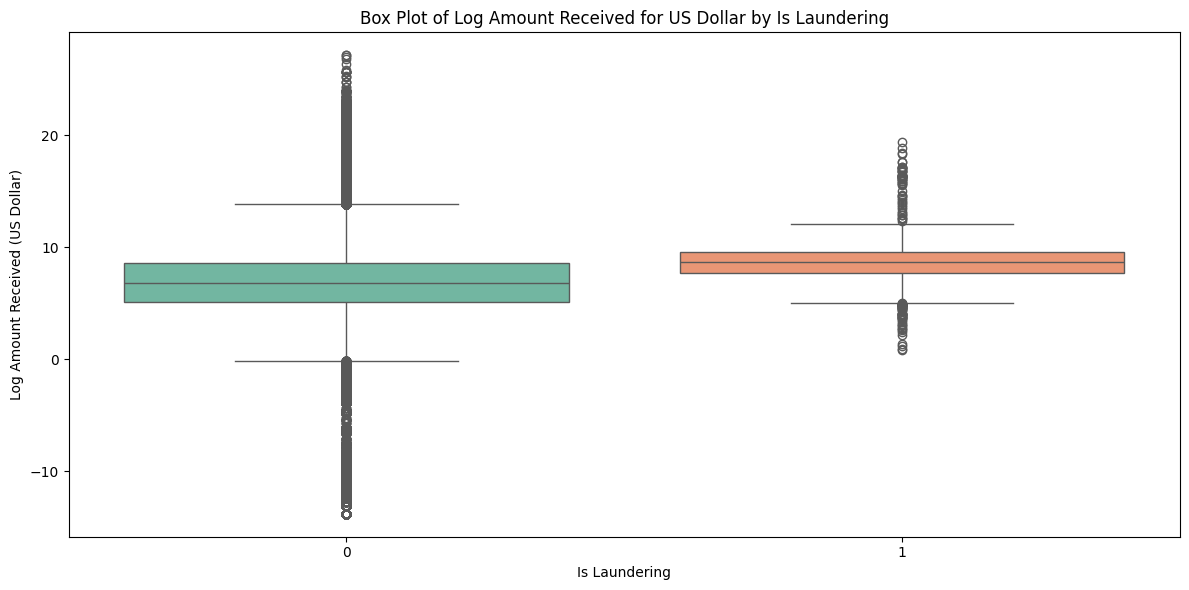

<ipython-input-29-c14571245450>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is Laundering', y='Log Amount Paid', data=df_currency, palette="Set2")


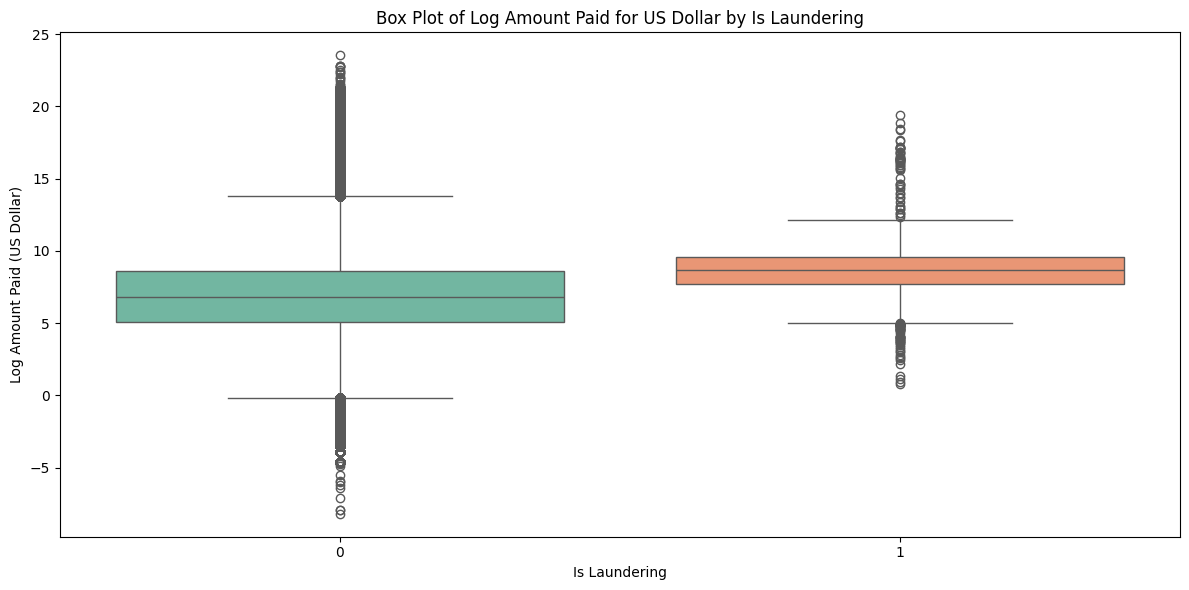

<ipython-input-29-c14571245450>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Received'] = np.log(df_currency['Amount Received'].replace(0, np.nan).dropna())
<ipython-input-29-c14571245450>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Paid'] = np.log(df_currency['Amount Paid'].replace(0, np.nan).dropna())
<ipython-input-29-c14571245450>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign 

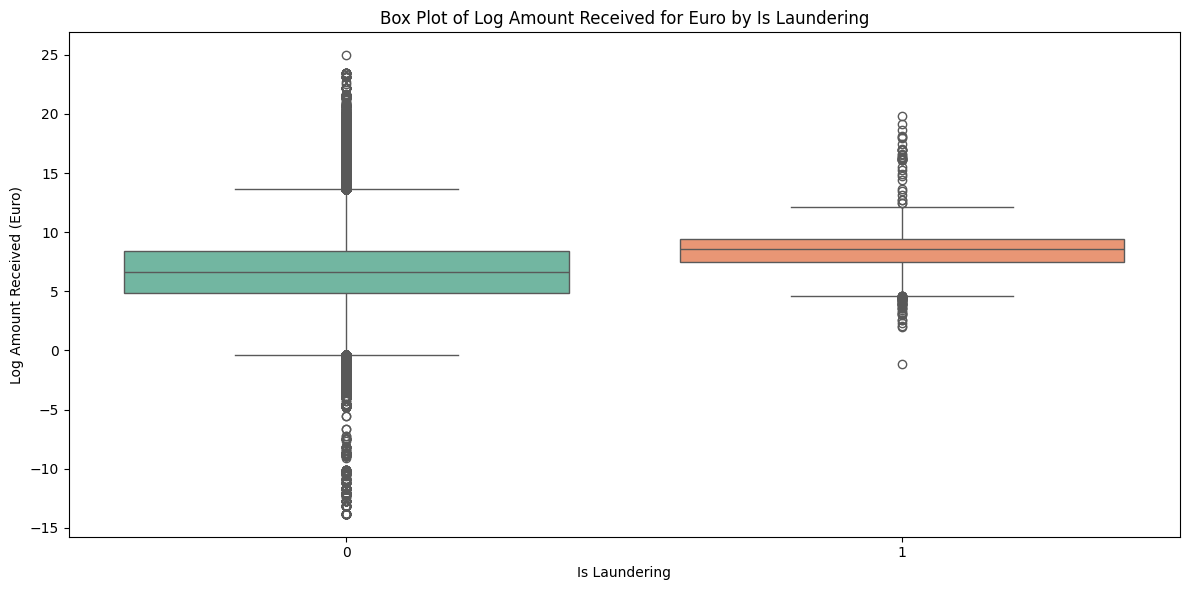

<ipython-input-29-c14571245450>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is Laundering', y='Log Amount Paid', data=df_currency, palette="Set2")


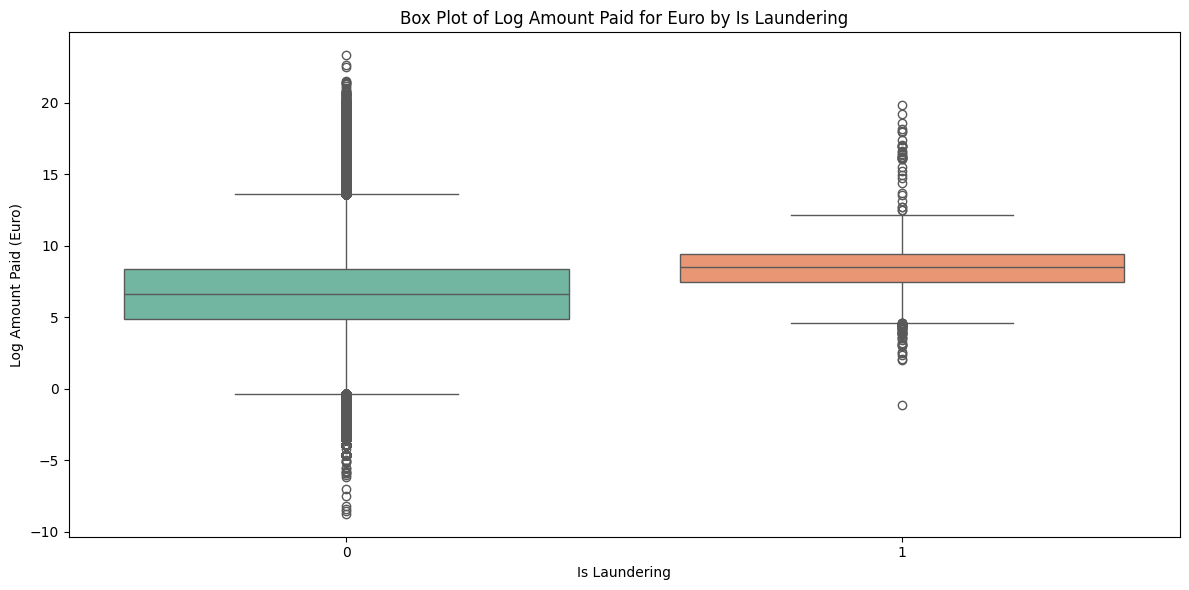

<ipython-input-29-c14571245450>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Received'] = np.log(df_currency['Amount Received'].replace(0, np.nan).dropna())
<ipython-input-29-c14571245450>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Paid'] = np.log(df_currency['Amount Paid'].replace(0, np.nan).dropna())
<ipython-input-29-c14571245450>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign 

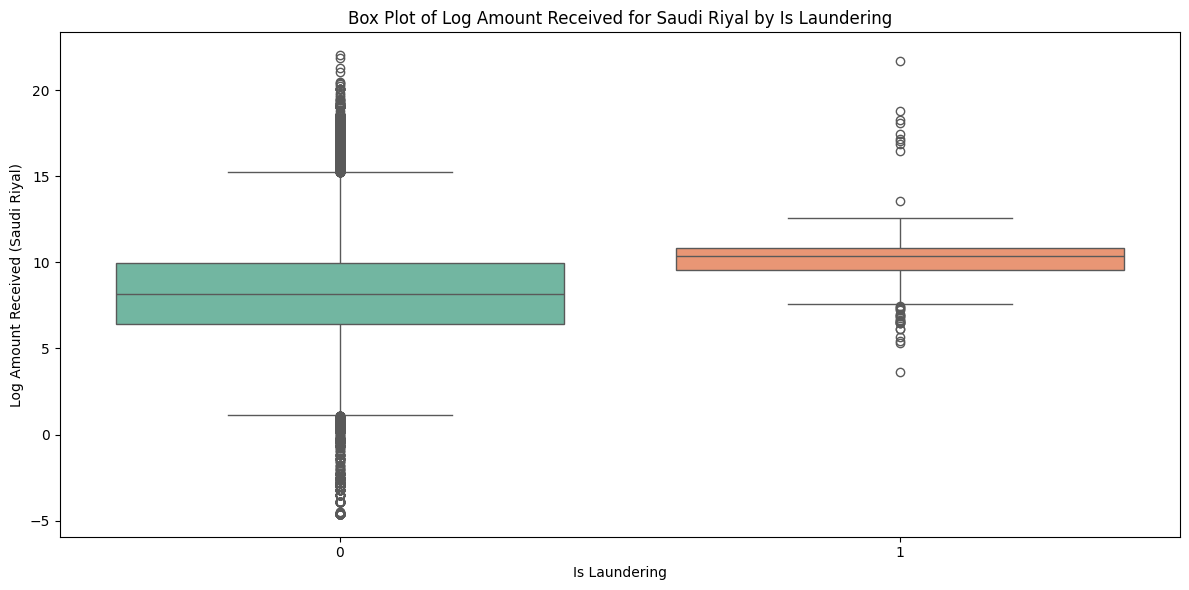

<ipython-input-29-c14571245450>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is Laundering', y='Log Amount Paid', data=df_currency, palette="Set2")


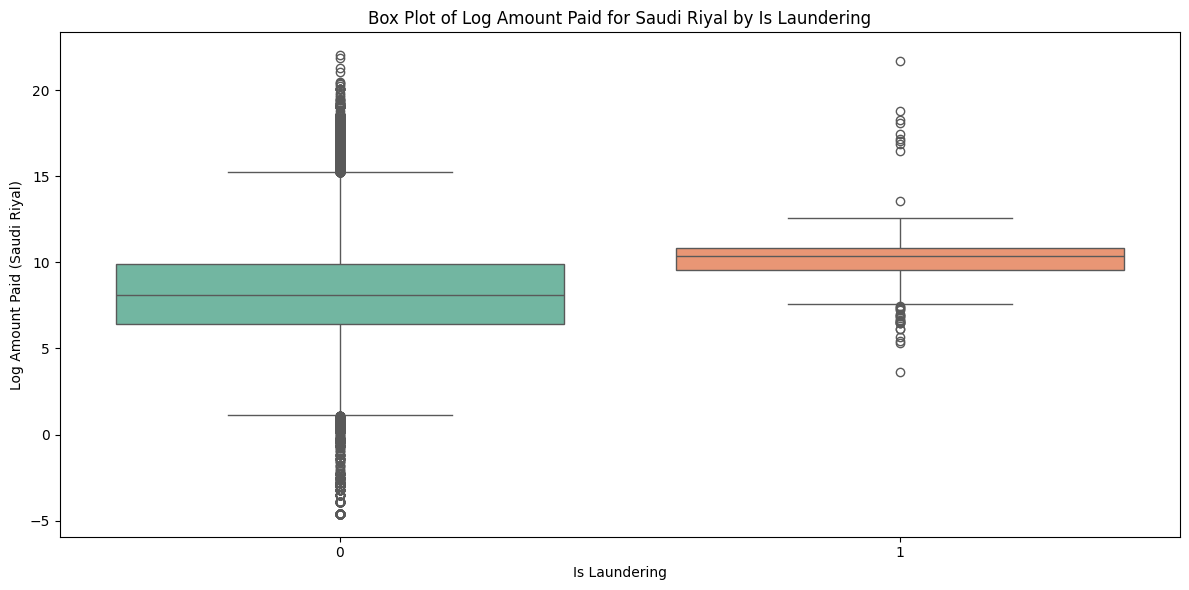

<ipython-input-29-c14571245450>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Received'] = np.log(df_currency['Amount Received'].replace(0, np.nan).dropna())
<ipython-input-29-c14571245450>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Paid'] = np.log(df_currency['Amount Paid'].replace(0, np.nan).dropna())
<ipython-input-29-c14571245450>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign 

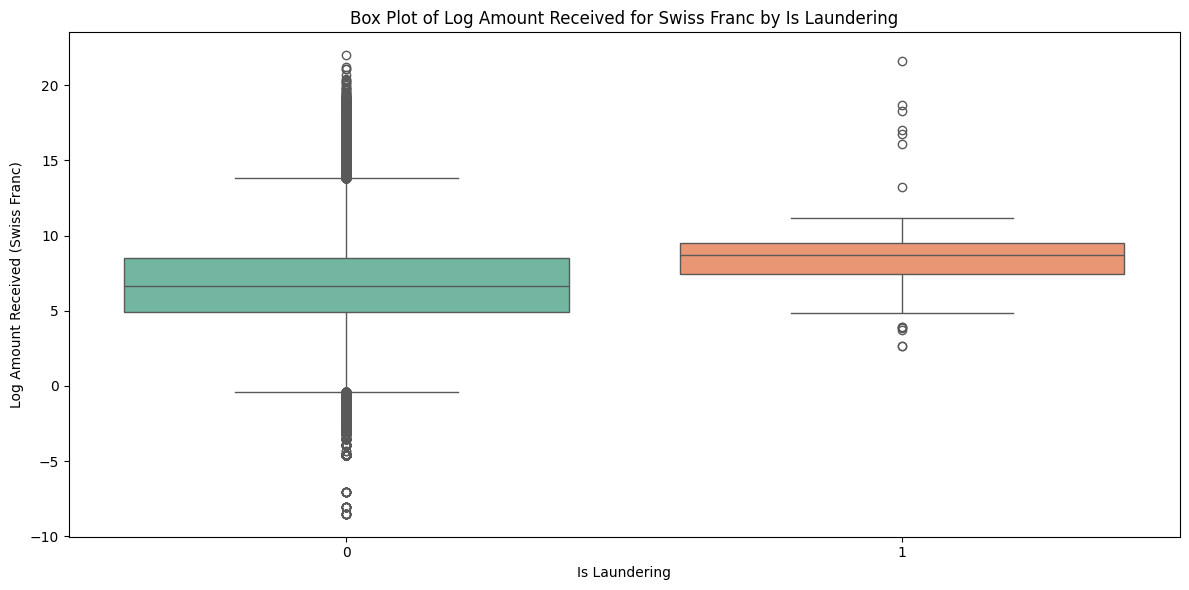

<ipython-input-29-c14571245450>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is Laundering', y='Log Amount Paid', data=df_currency, palette="Set2")


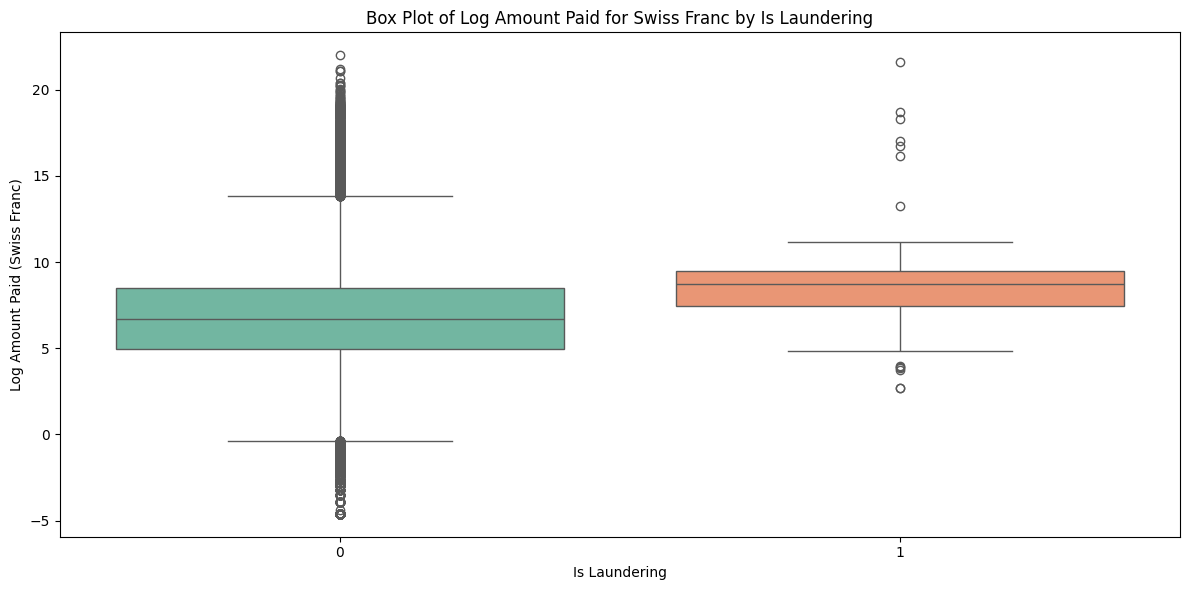

<ipython-input-29-c14571245450>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Received'] = np.log(df_currency['Amount Received'].replace(0, np.nan).dropna())
<ipython-input-29-c14571245450>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Paid'] = np.log(df_currency['Amount Paid'].replace(0, np.nan).dropna())
<ipython-input-29-c14571245450>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign 

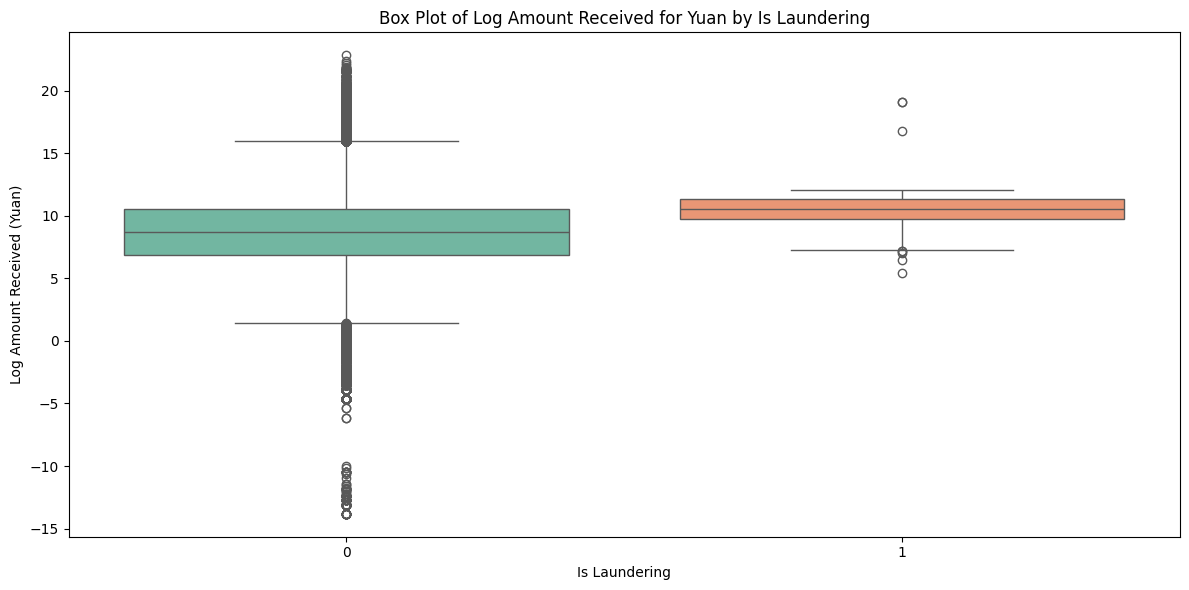

<ipython-input-29-c14571245450>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is Laundering', y='Log Amount Paid', data=df_currency, palette="Set2")


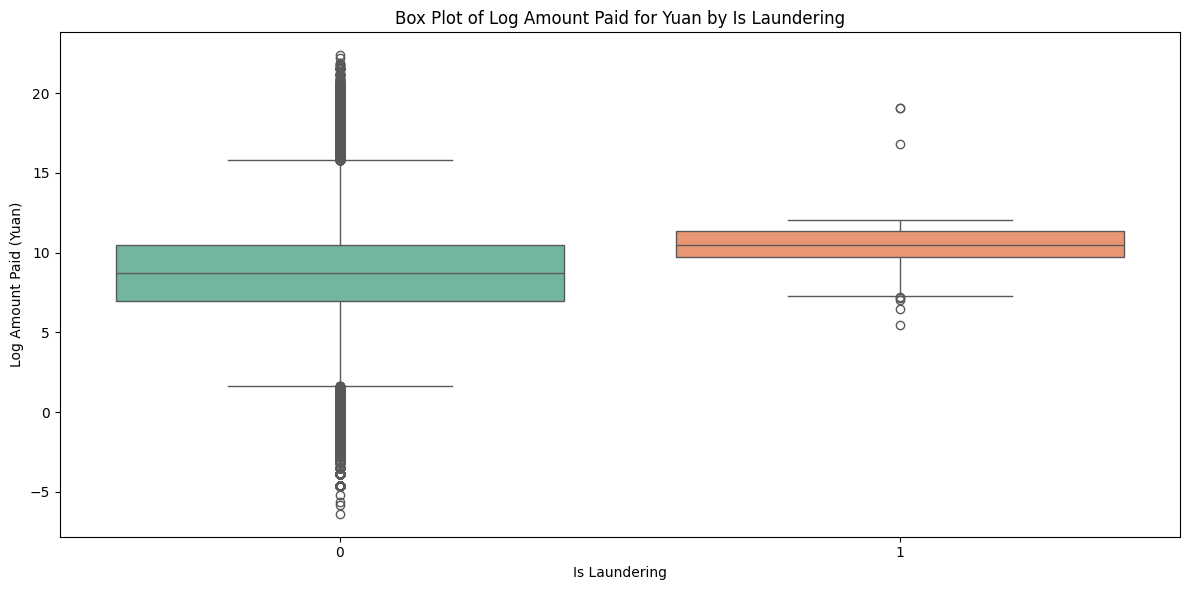

<ipython-input-29-c14571245450>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Received'] = np.log(df_currency['Amount Received'].replace(0, np.nan).dropna())
<ipython-input-29-c14571245450>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Paid'] = np.log(df_currency['Amount Paid'].replace(0, np.nan).dropna())
<ipython-input-29-c14571245450>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign 

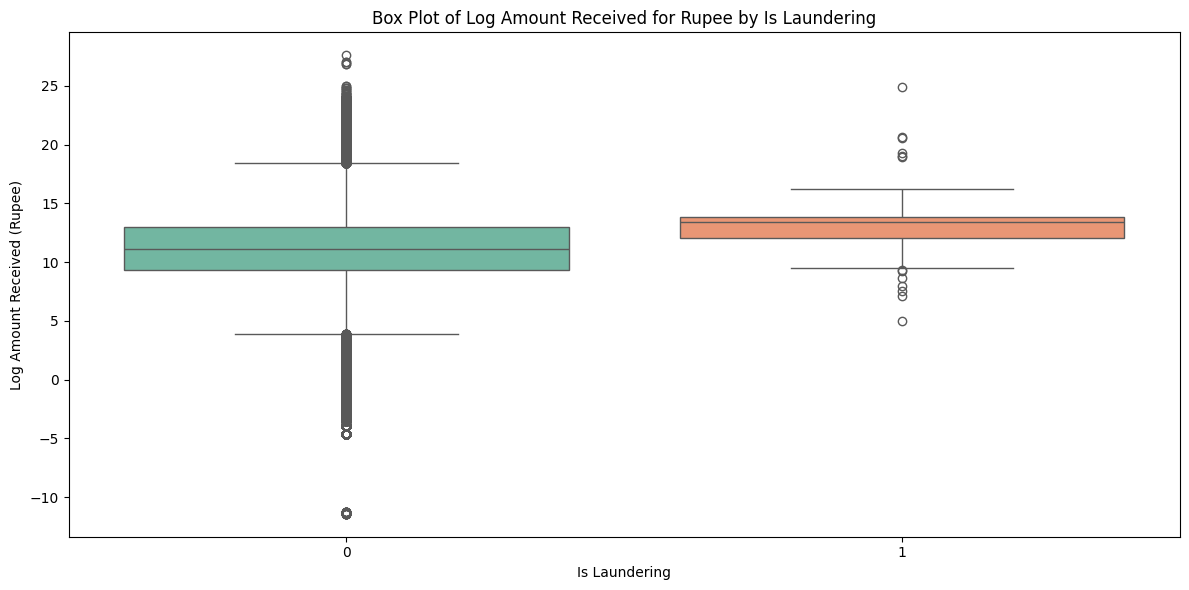

<ipython-input-29-c14571245450>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is Laundering', y='Log Amount Paid', data=df_currency, palette="Set2")


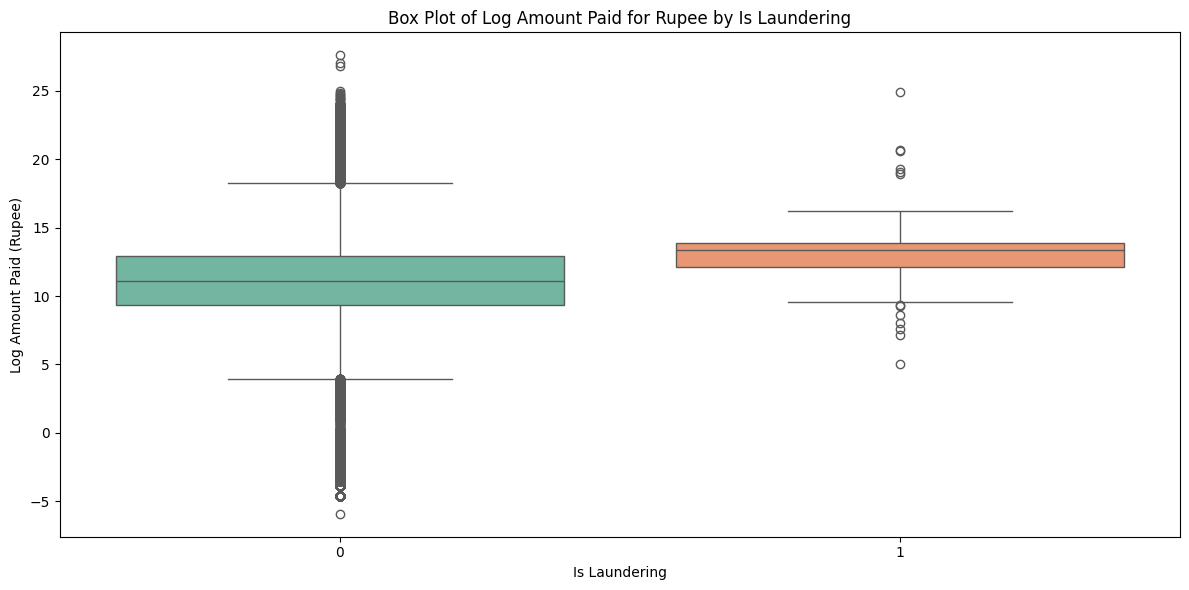

<ipython-input-29-c14571245450>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Received'] = np.log(df_currency['Amount Received'].replace(0, np.nan).dropna())
<ipython-input-29-c14571245450>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Paid'] = np.log(df_currency['Amount Paid'].replace(0, np.nan).dropna())
<ipython-input-29-c14571245450>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign 

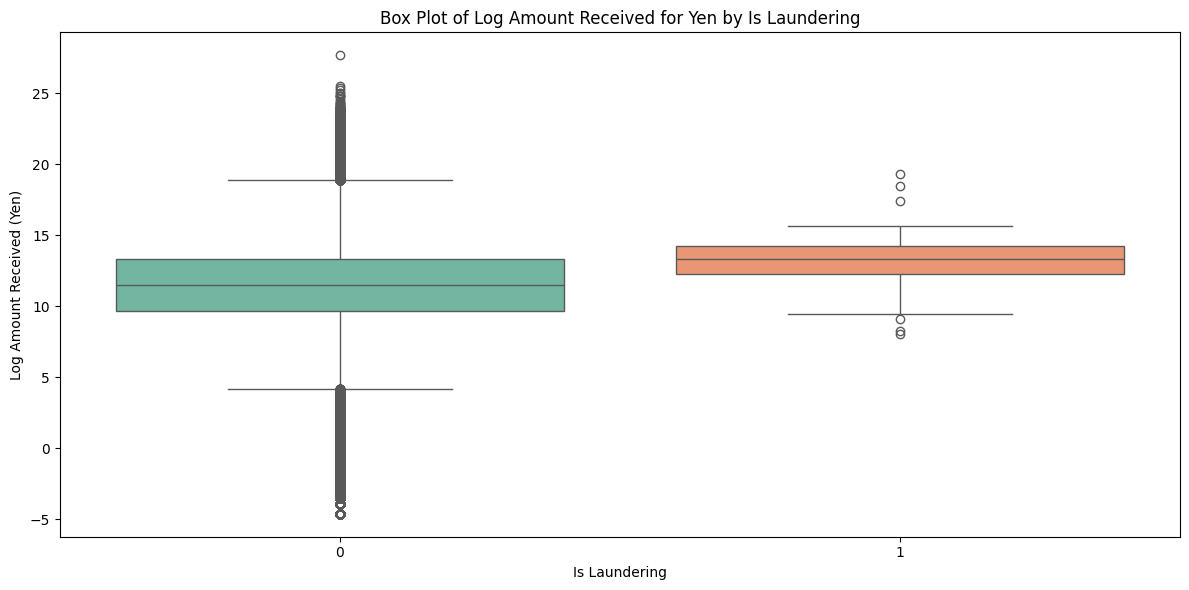

<ipython-input-29-c14571245450>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is Laundering', y='Log Amount Paid', data=df_currency, palette="Set2")


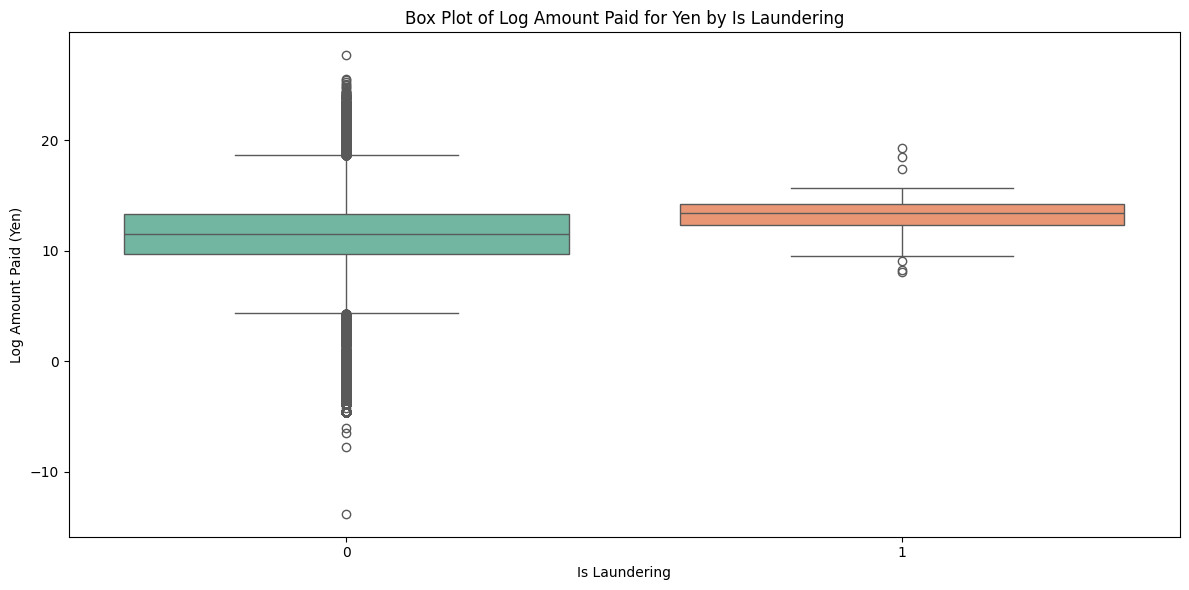

<ipython-input-29-c14571245450>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Received'] = np.log(df_currency['Amount Received'].replace(0, np.nan).dropna())
<ipython-input-29-c14571245450>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Paid'] = np.log(df_currency['Amount Paid'].replace(0, np.nan).dropna())
<ipython-input-29-c14571245450>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign 

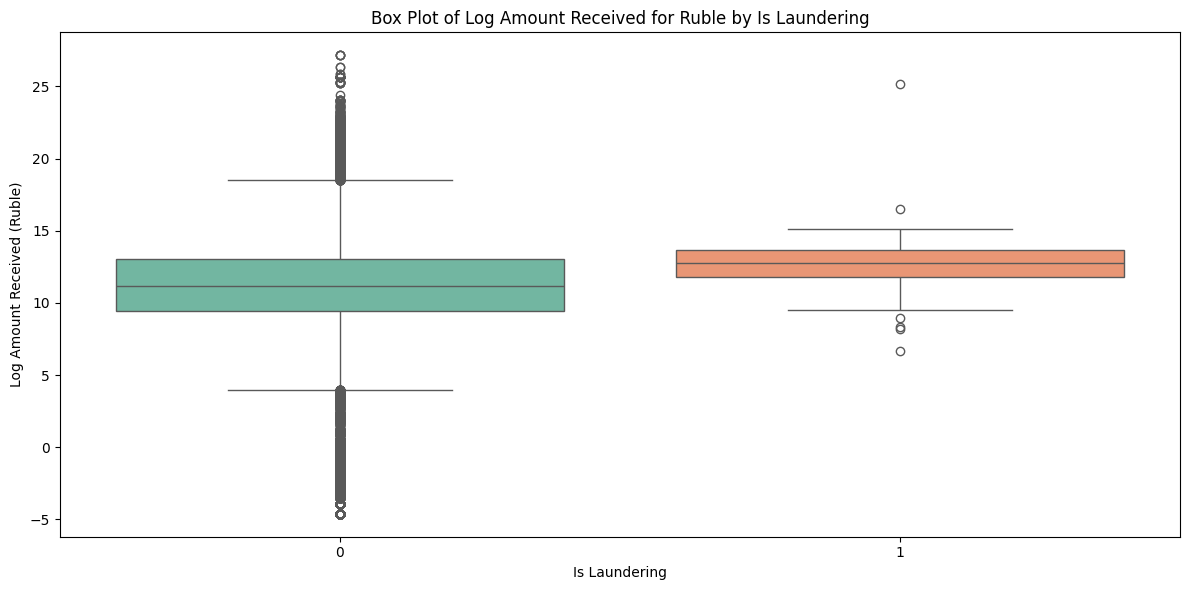

<ipython-input-29-c14571245450>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is Laundering', y='Log Amount Paid', data=df_currency, palette="Set2")


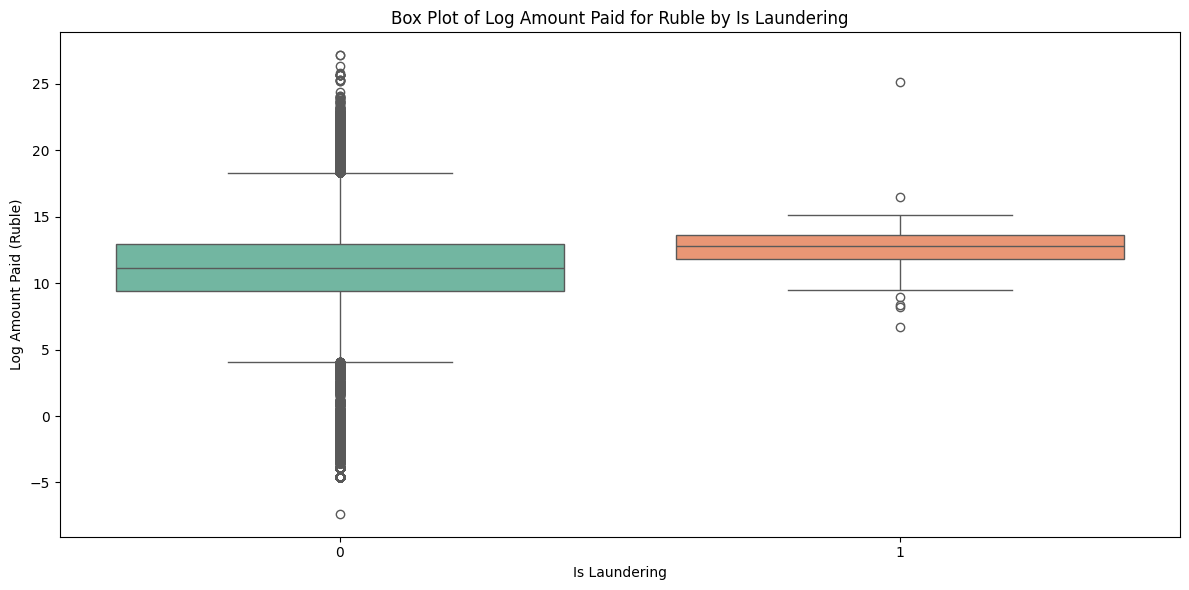

<ipython-input-29-c14571245450>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Received'] = np.log(df_currency['Amount Received'].replace(0, np.nan).dropna())
<ipython-input-29-c14571245450>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Paid'] = np.log(df_currency['Amount Paid'].replace(0, np.nan).dropna())
<ipython-input-29-c14571245450>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign 

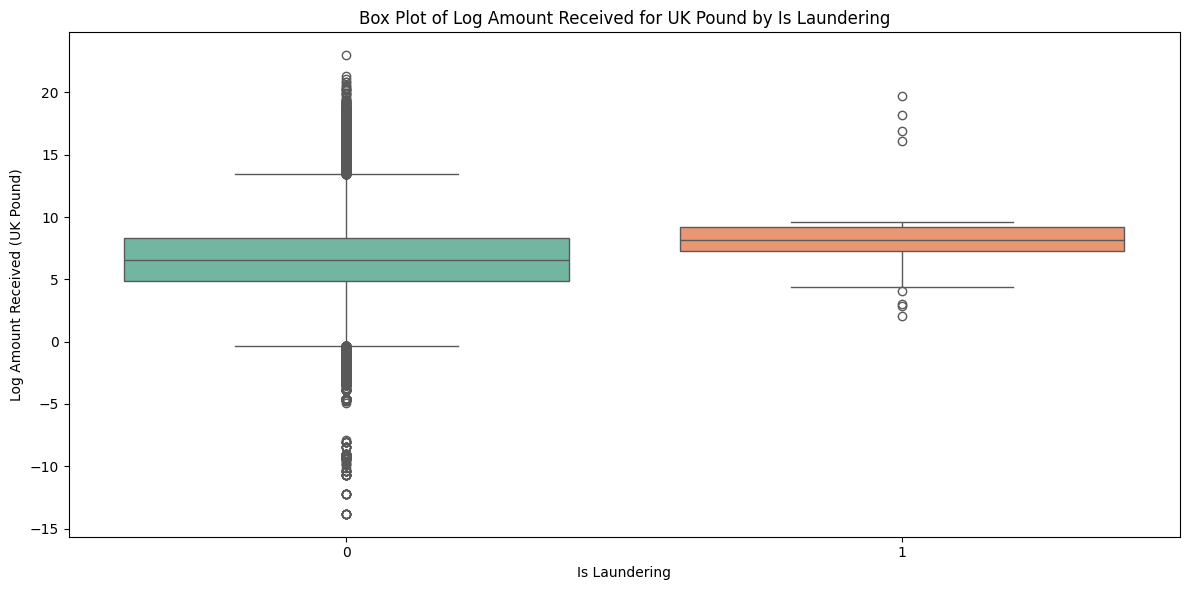

<ipython-input-29-c14571245450>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is Laundering', y='Log Amount Paid', data=df_currency, palette="Set2")


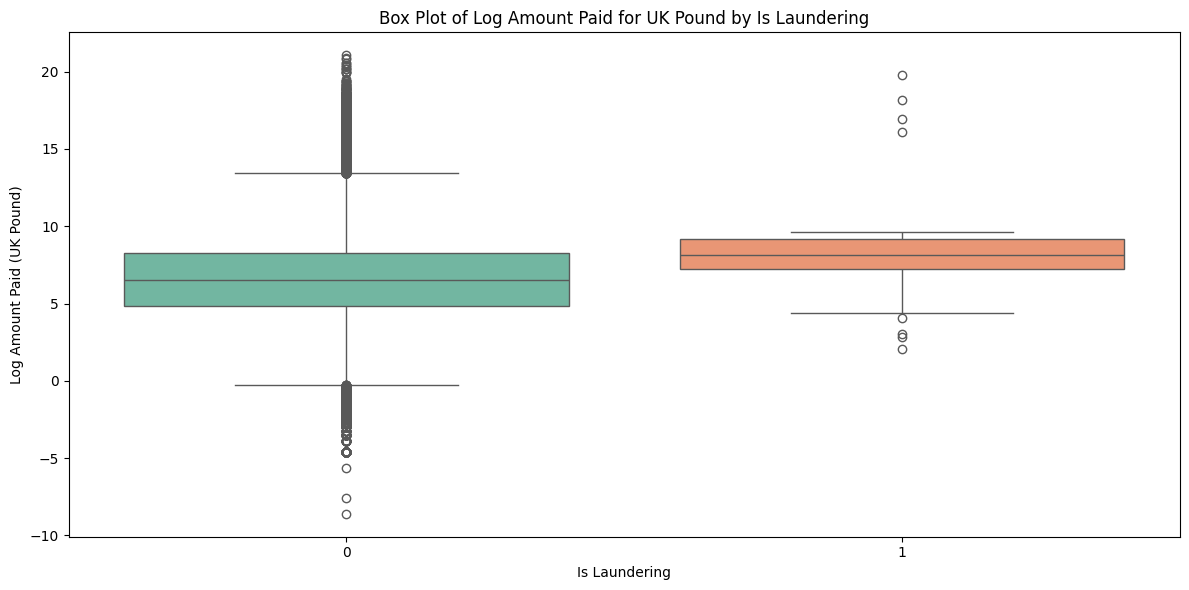

<ipython-input-29-c14571245450>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Received'] = np.log(df_currency['Amount Received'].replace(0, np.nan).dropna())
<ipython-input-29-c14571245450>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Paid'] = np.log(df_currency['Amount Paid'].replace(0, np.nan).dropna())
<ipython-input-29-c14571245450>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign 

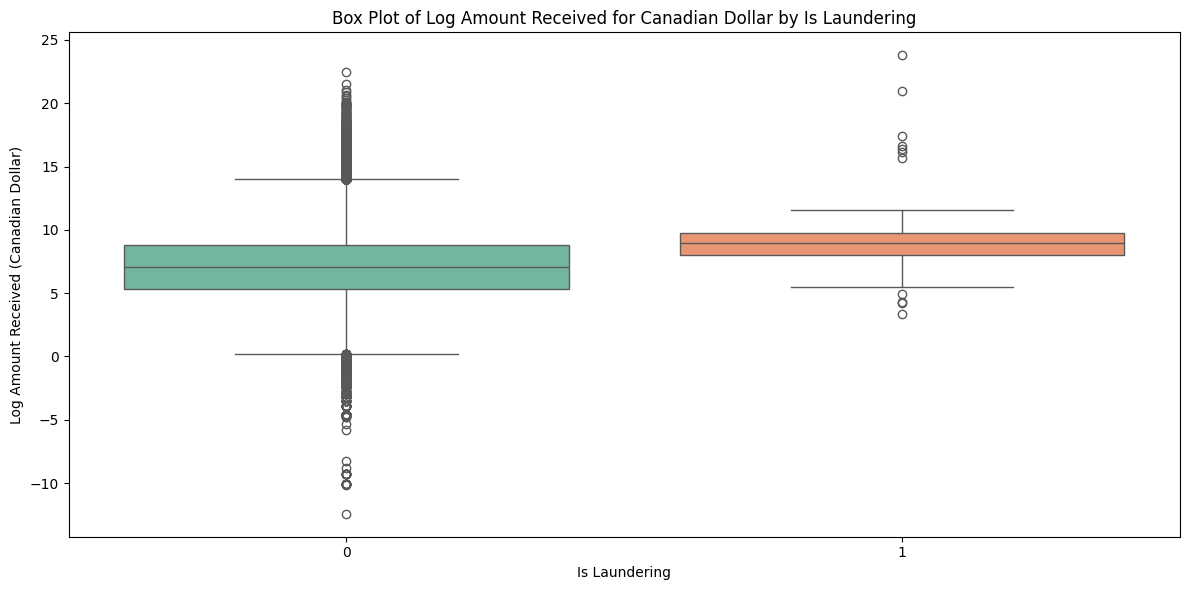

<ipython-input-29-c14571245450>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is Laundering', y='Log Amount Paid', data=df_currency, palette="Set2")


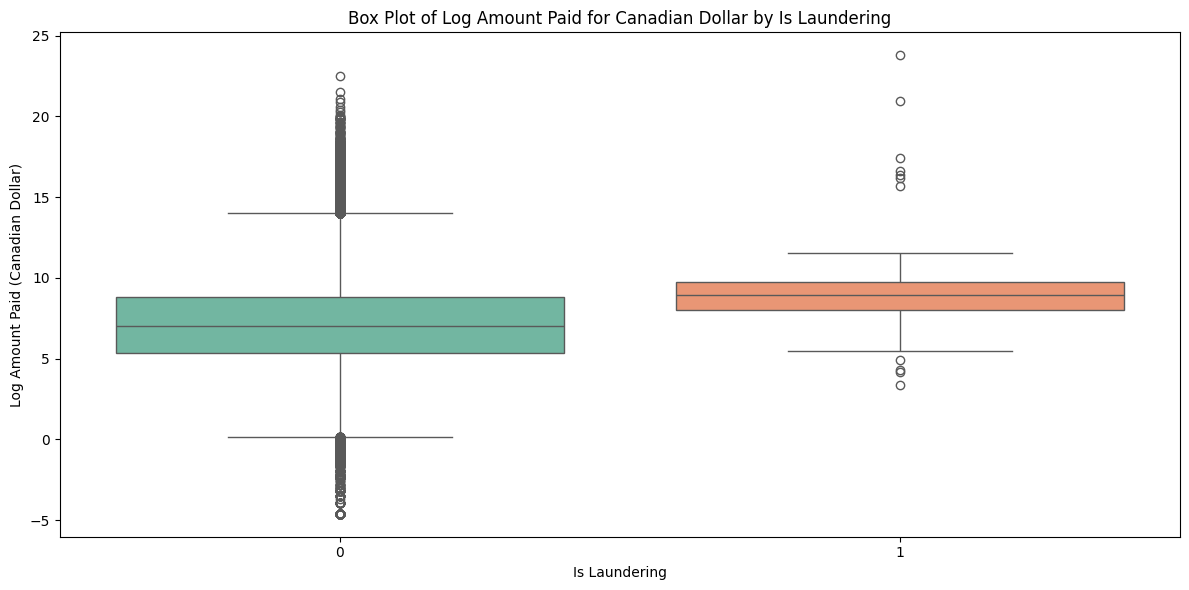

<ipython-input-29-c14571245450>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Received'] = np.log(df_currency['Amount Received'].replace(0, np.nan).dropna())
<ipython-input-29-c14571245450>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Paid'] = np.log(df_currency['Amount Paid'].replace(0, np.nan).dropna())
<ipython-input-29-c14571245450>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign 

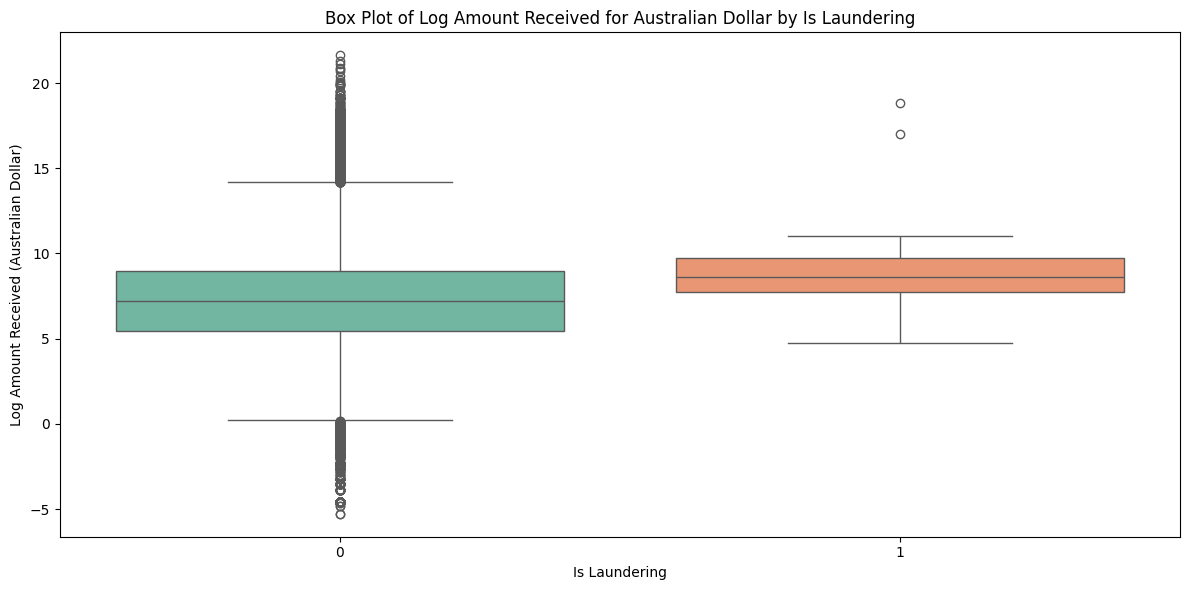

<ipython-input-29-c14571245450>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is Laundering', y='Log Amount Paid', data=df_currency, palette="Set2")


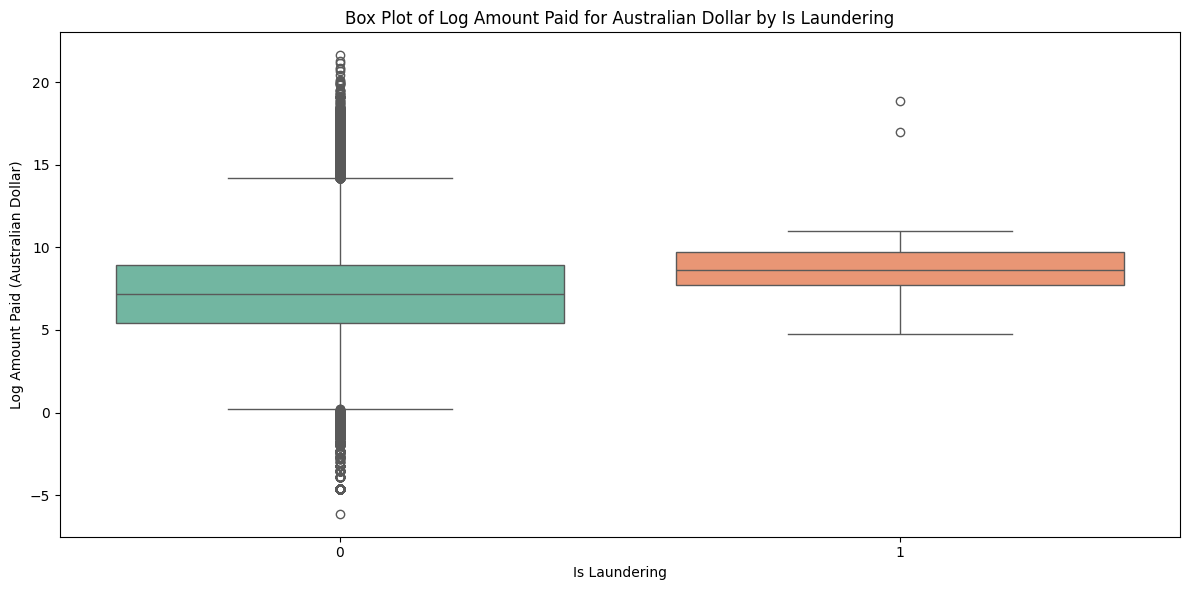

<ipython-input-29-c14571245450>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Received'] = np.log(df_currency['Amount Received'].replace(0, np.nan).dropna())
<ipython-input-29-c14571245450>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Paid'] = np.log(df_currency['Amount Paid'].replace(0, np.nan).dropna())
<ipython-input-29-c14571245450>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign 

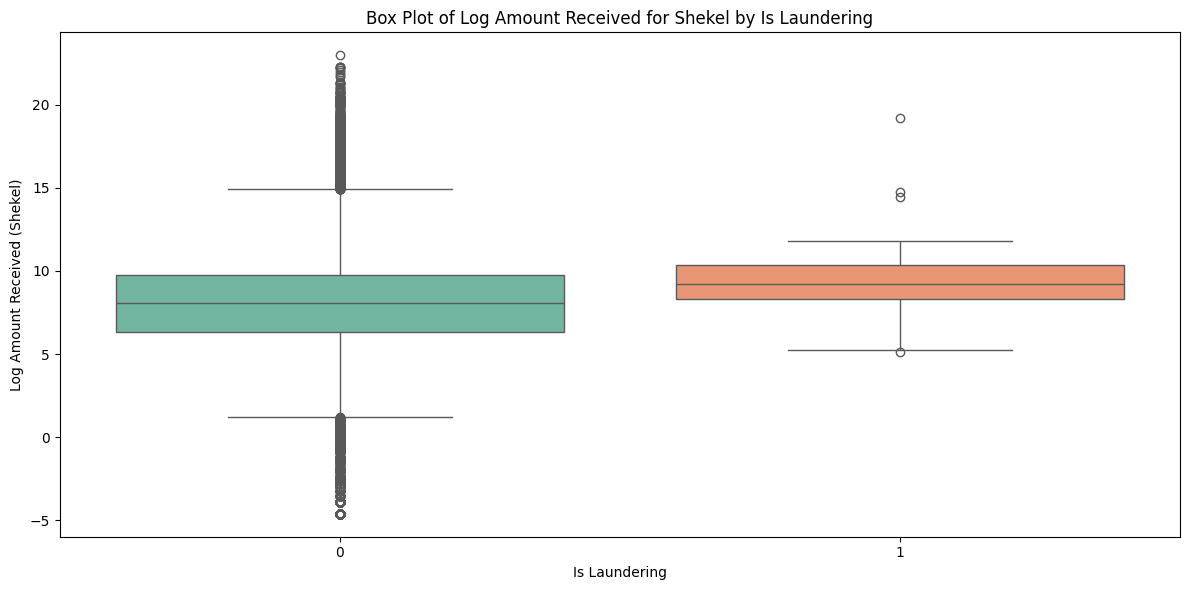

<ipython-input-29-c14571245450>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is Laundering', y='Log Amount Paid', data=df_currency, palette="Set2")


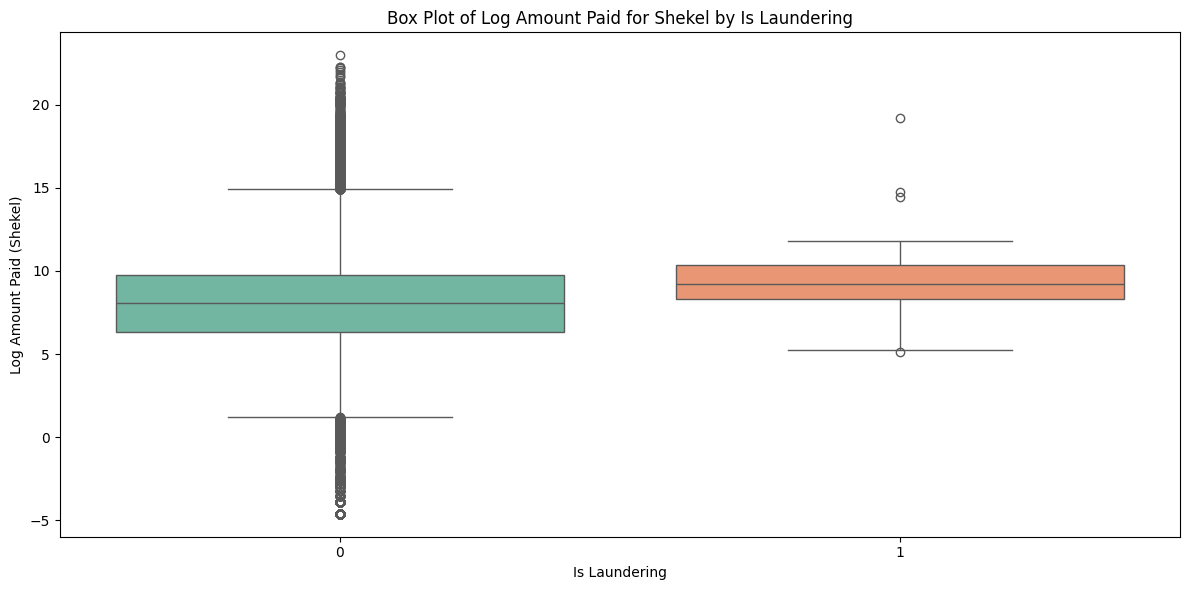

<ipython-input-29-c14571245450>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Received'] = np.log(df_currency['Amount Received'].replace(0, np.nan).dropna())
<ipython-input-29-c14571245450>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Paid'] = np.log(df_currency['Amount Paid'].replace(0, np.nan).dropna())
<ipython-input-29-c14571245450>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign 

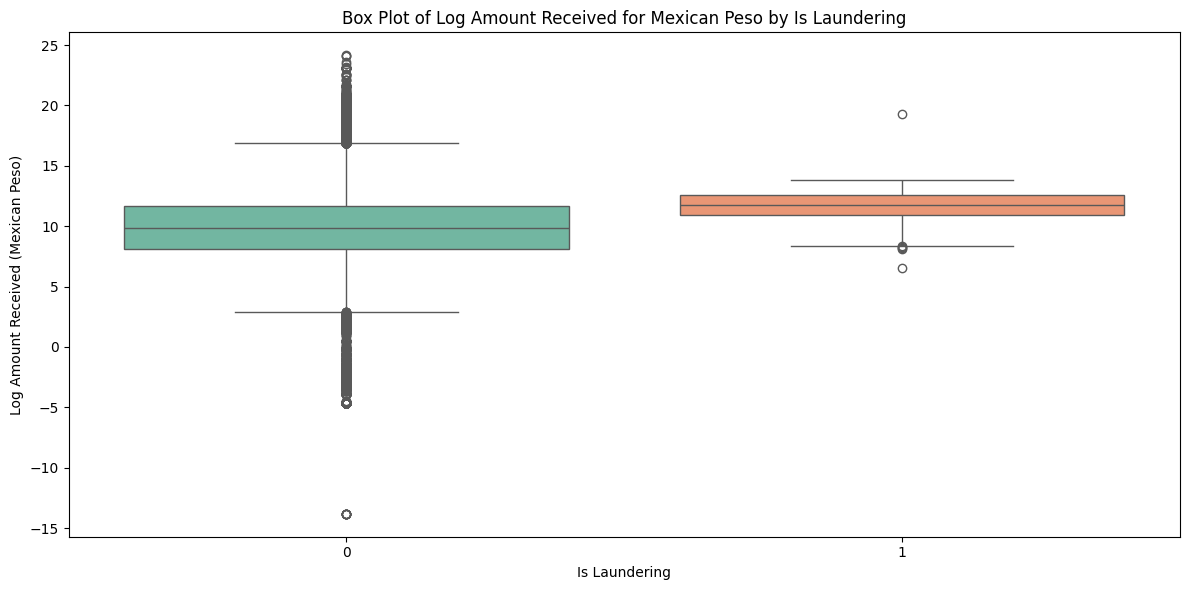

<ipython-input-29-c14571245450>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is Laundering', y='Log Amount Paid', data=df_currency, palette="Set2")


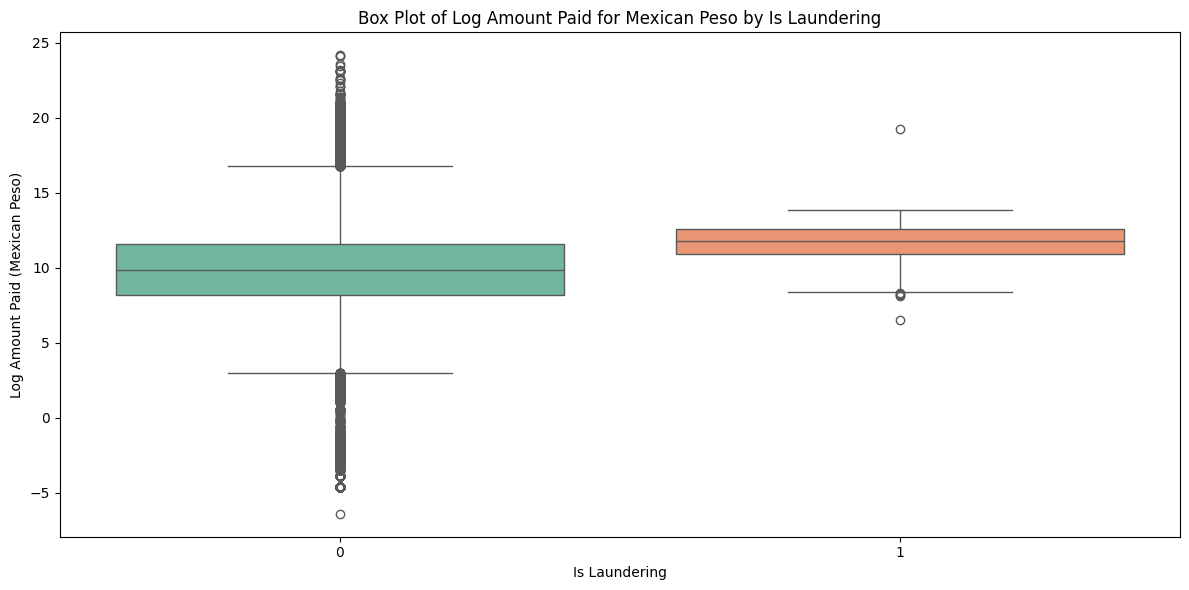

<ipython-input-29-c14571245450>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Received'] = np.log(df_currency['Amount Received'].replace(0, np.nan).dropna())
<ipython-input-29-c14571245450>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Paid'] = np.log(df_currency['Amount Paid'].replace(0, np.nan).dropna())
<ipython-input-29-c14571245450>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign 

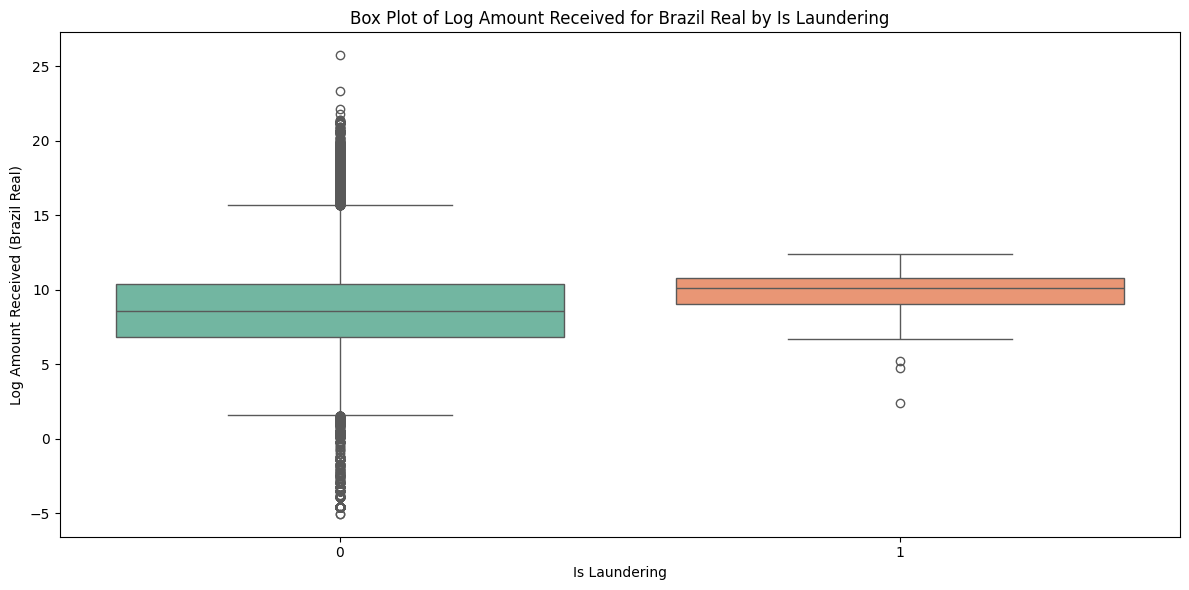

<ipython-input-29-c14571245450>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is Laundering', y='Log Amount Paid', data=df_currency, palette="Set2")


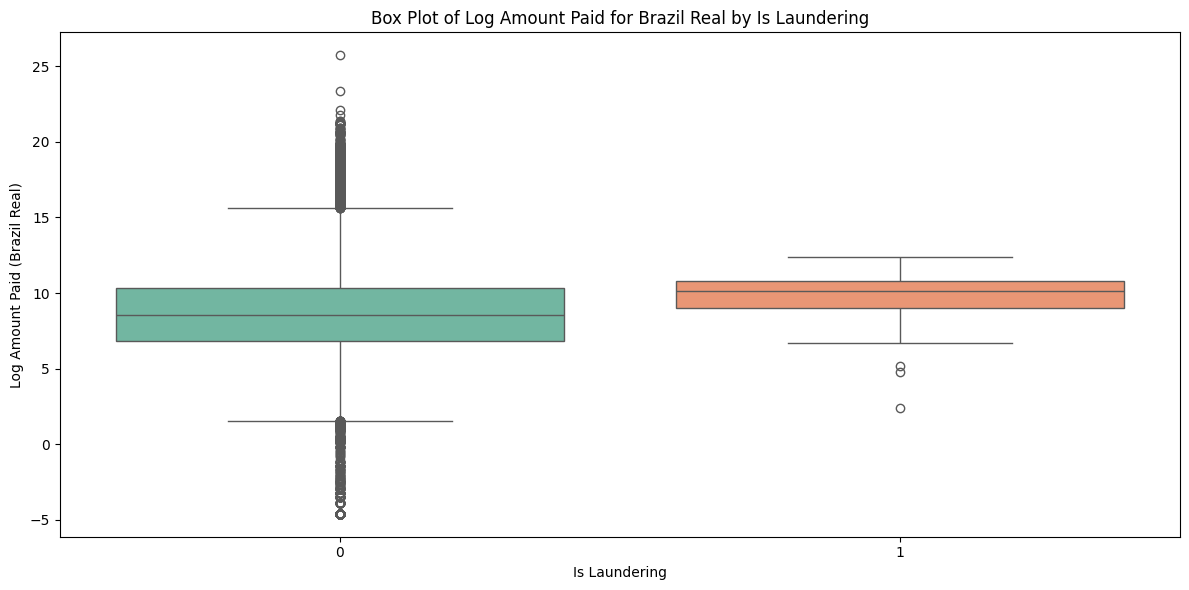

<ipython-input-29-c14571245450>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Received'] = np.log(df_currency['Amount Received'].replace(0, np.nan).dropna())
<ipython-input-29-c14571245450>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency['Log Amount Paid'] = np.log(df_currency['Amount Paid'].replace(0, np.nan).dropna())
<ipython-input-29-c14571245450>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign 

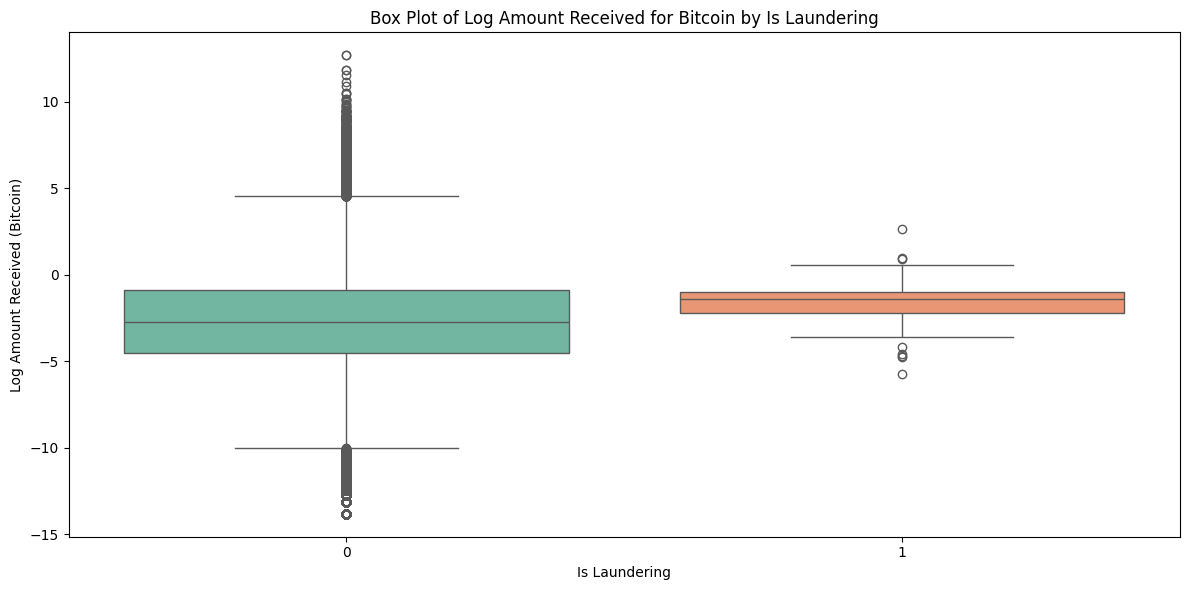

<ipython-input-29-c14571245450>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is Laundering', y='Log Amount Paid', data=df_currency, palette="Set2")


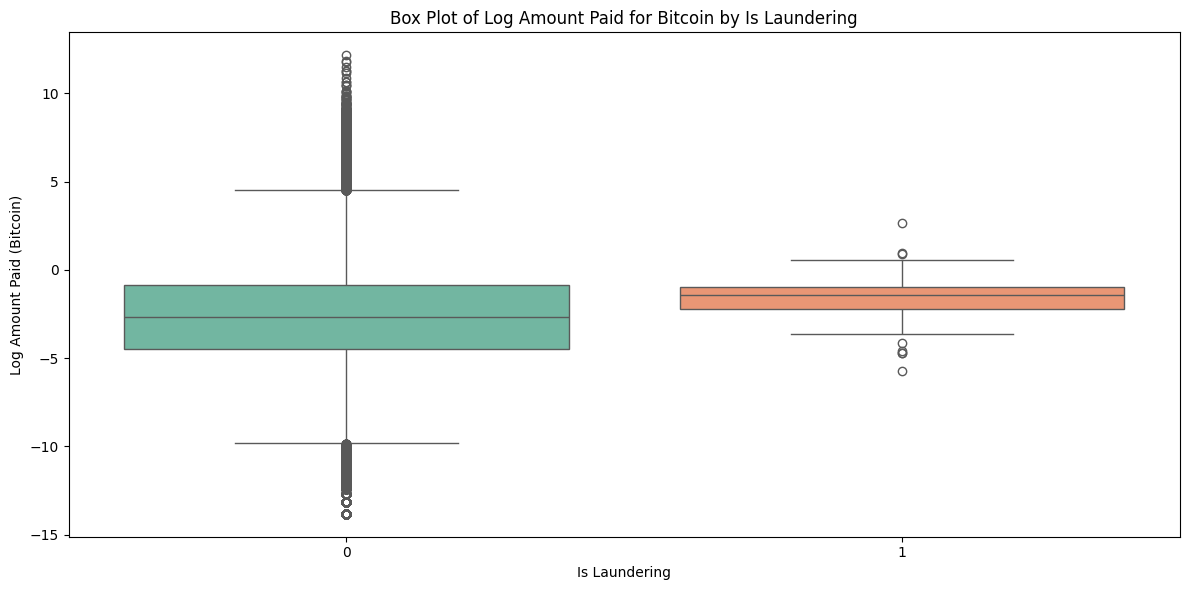

In [29]:
# List of currencies to visualize
currencies = [
    'US Dollar', 'Euro', 'Saudi Riyal', 'Swiss Franc', 'Yuan', 'Rupee', 'Yen', 'Ruble',
    'UK Pound', 'Canadian Dollar', 'Australian Dollar', 'Shekel', 'Mexican Peso',
    'Brazil Real', 'Bitcoin'
]

# Function to plot box plots for a given currency
def plot_boxplot_for_currency(df, currency):
    # Filter for the specific currency in either Receiving or Payment Currency
    df_currency = df[(df['Receiving Currency'] == currency) | (df['Payment Currency'] == currency)]

    # Log-transform the Amount Received and Amount Paid
    df_currency['Log Amount Received'] = np.log(df_currency['Amount Received'].replace(0, np.nan).dropna())
    df_currency['Log Amount Paid'] = np.log(df_currency['Amount Paid'].replace(0, np.nan).dropna())

    # Plotting the box plot for Amount Received by Is Laundering
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Is Laundering', y='Log Amount Received', data=df_currency, palette="Set2")
    plt.title(f'Box Plot of Log Amount Received for {currency} by Is Laundering')
    plt.xlabel('Is Laundering')
    plt.ylabel(f'Log Amount Received ({currency})')
    plt.tight_layout()
    plt.show()

    # Plotting the box plot for Amount Paid by Is Laundering
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Is Laundering', y='Log Amount Paid', data=df_currency, palette="Set2")
    plt.title(f'Box Plot of Log Amount Paid for {currency} by Is Laundering')
    plt.xlabel('Is Laundering')
    plt.ylabel(f'Log Amount Paid ({currency})')
    plt.tight_layout()
    plt.show()

# Iterate through each currency in the list and plot
for currency in currencies:
    plot_boxplot_for_currency(df, currency)

We can see that that there are a fair amount of outliers in the above dataset. I would not like to remove the outliers, because they can add variability to the dataset, and might even help the model make better predictions.

In [30]:
df['Amount_Mismatch'] = df['Amount Received'] != df['Amount Paid'] # False is where they do match, True means they do not match
df['Amount_Mismatch'].groupby(df['Is Laundering']).value_counts()

<ipython-input-30-c6cfff8c5474>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Amount_Mismatch'] = df['Amount Received'] != df['Amount Paid'] # False is where they do match, True means they do not match


Is Laundering  Amount_Mismatch
0              False              5001005
               True                 72154
1              False                 5177
Name: count, dtype: int64

It seems like all the laundered transactions are matching in terms of amount recieved and amount paid.

In [116]:
laundered_amounts = df[df['Is Laundering']==1]['Amount Received']
non_laundered_amounts = df[df['Is Laundering']==0]['Amount Received']

# Perform t-test
t_stat, p_value = st.ttest_ind(laundered_amounts, non_laundered_amounts)

print("T-test results for Amount Received:")
print(f"T-statistic: {t_stat}")
print(f"p-value: {p_value}")

T-test results for Amount Received:
T-statistic: 2.0923936004953143
p-value: 0.03640337030683799


**P-value (0.036):**

- Since the p-value is 0.036, which is below the typical significance level of 0.05, you can conclude that there is a statistically significant difference in "Amount Received" between transactions marked as laundering (Is Laundering == 1) and those that are not (Is Laundering == 0).
- This suggests that the amounts received in laundering transactions are different from those in non-laundering transactions, at a 95% confidence level.

**T-statistic (2.093):**

- The positive t-statistic indicates that, on average, the "Amount Received" in laundering transactions is higher than in non-laundering transactions.

##Timestamp

Now let us take a look at how the timestamp correlates to the Is Laundering.

In [40]:

df["Timestamp"] = pd.to_datetime(df["Timestamp"])


df["Date"] = df["Timestamp"].dt.date
df["Day"] = df["Timestamp"].dt.day_name()
df["Time"] = df["Timestamp"].dt.time

df.drop(columns=["Timestamp"], inplace=True)

<Axes: title={'center': 'Days with Money Laundering'}, xlabel='Day'>

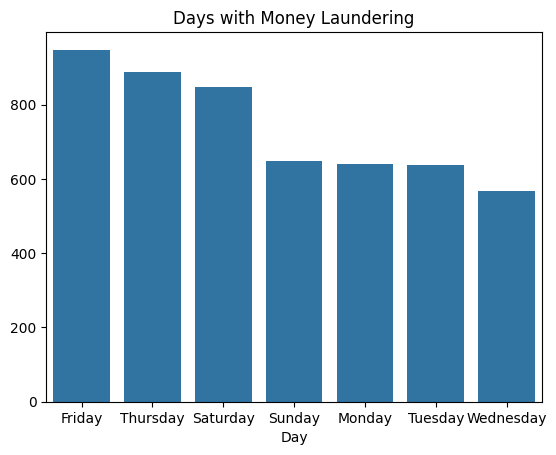

In [47]:
plt.title("Days with Money Laundering")
day=df[df["Is Laundering"]==1]["Day"].value_counts()
sns.barplot(x=day.index,y=day.values)

It seems like most of the laundered transactions happen on Friday. Let us do a chi-squared test of independence to see if this is true or not.

In [48]:
contingency_Day= pd.crosstab(df['Is Laundering'], df['Day'])
import scipy.stats as st
x,p,y,z = st.chi2_contingency(contingency_Day)

if p < 0.05:
    print("There is a relationship")
else:
    print("There is no relationship")

There is a relationship


In [49]:
p

0.0

Since p is less than 0.05, it suggests that the relationship between 'Is Laundering' and 'Day' is statistically significant (i.e., there is a relationship). Let us see if this is the same case with Day and Time.

In [50]:
contingency_Time= pd.crosstab(df['Is Laundering'], df['Time'])
import scipy.stats as st
x,p,y,z = st.chi2_contingency(contingency_Time)

if p < 0.05:
    print("There is a relationship")
else:
    print("There is no relationship")

There is a relationship


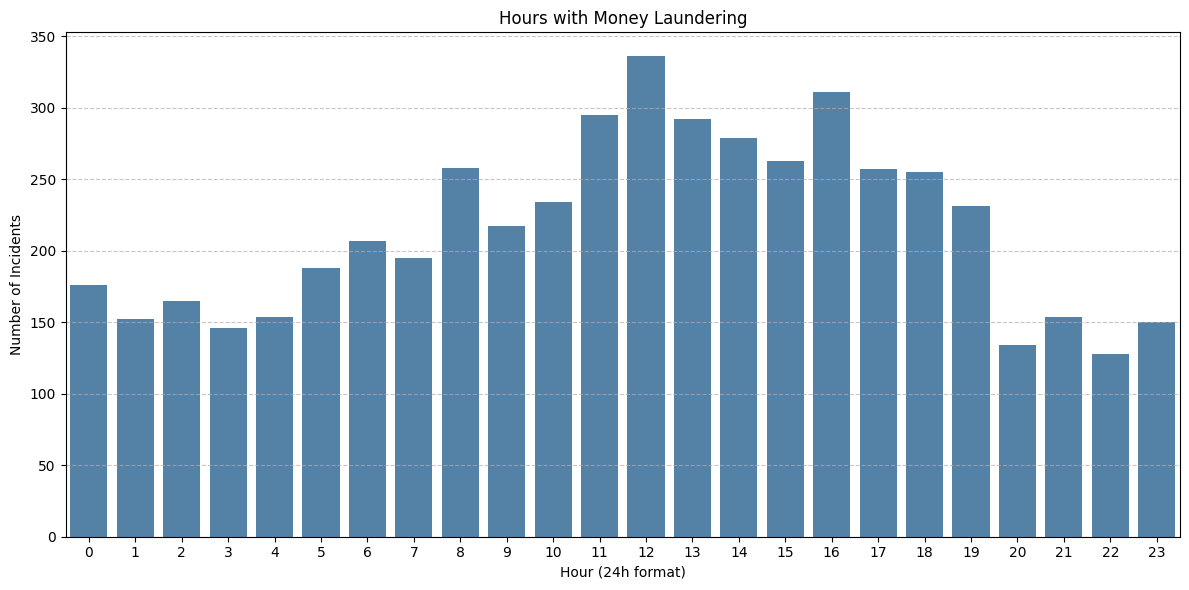

In [51]:
# First convert Time to string
df['Hour'] = df['Time'].astype(str).str[:2].astype(int)
# Extract hour and filter for laundering cases
hour = df[df["Is Laundering"]==1]["Hour"].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=hour.index, y=hour.values, color='#4682B4')

# Customize the plot
plt.title("Hours with Money Laundering")
plt.xlabel('Hour (24h format)')
plt.ylabel('Number of Incidents')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ensure all hours (0-23) are shown
plt.xticks(range(24), range(24))

# Adjust layout
plt.tight_layout()

plt.show()

In [52]:
contingency_Hour= pd.crosstab(df['Is Laundering'], df['Hour'])
import scipy.stats as st
x,p,y,z = st.chi2_contingency(contingency_Hour)

if p < 0.05:
    print("There is a relationship")
else:
    print("There is no relationship")

There is a relationship


In [53]:
p

1.0428755046486282e-160

It looks like most laundered transactions occur at 12:00pm.

In [54]:
df['Date']

0          2022-09-01
1          2022-09-01
2          2022-09-01
3          2022-09-01
4          2022-09-01
              ...    
5078340    2022-09-10
5078341    2022-09-10
5078342    2022-09-10
5078343    2022-09-10
5078344    2022-09-10
Name: Date, Length: 5078345, dtype: object

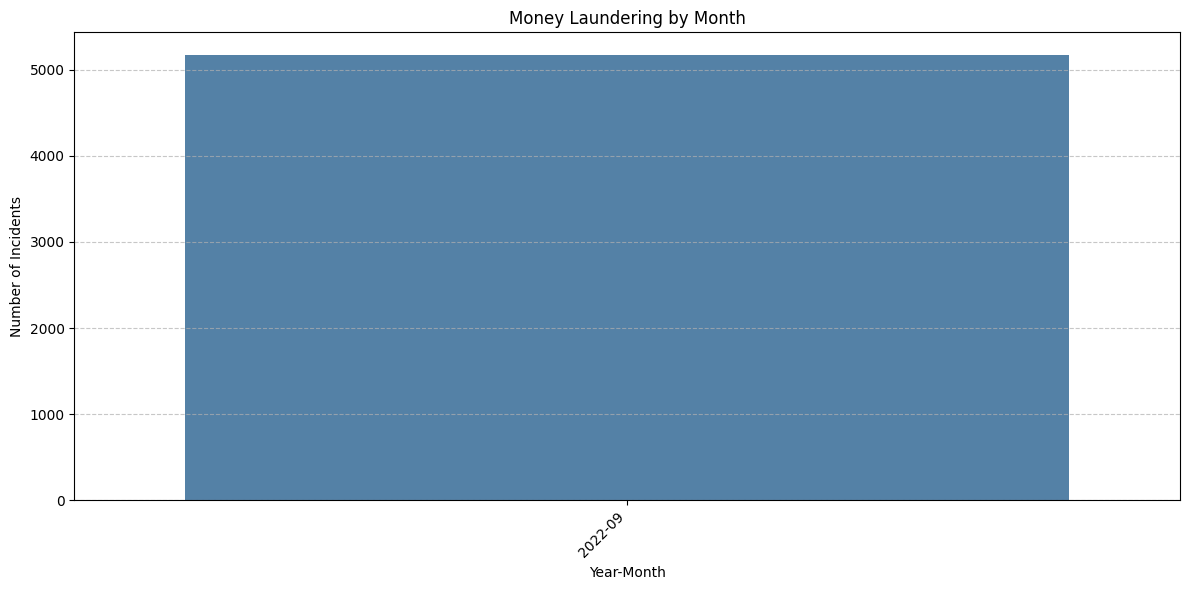

In [124]:
# Extract year and month from the date string
df['YearMonth'] = df['Date'].astype(str).str[:7]  # This will get '2022-09' format

# Count laundered transactions by year-month
yearmonth = df[df["Is Laundering"]==1]["YearMonth"].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=yearmonth.index, y=yearmonth.values, color='#4682B4')

# Customize the plot
plt.title("Money Laundering by Month")
plt.xlabel('Year-Month')
plt.ylabel('Number of Incidents')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

Looking at the data, ALL the trasactions (including transactions that are laundering and NOT laundering) seem to have happened in september. Let's verify with a chi squared test.

In [56]:
contingency_Year_Month= pd.crosstab(df['Is Laundering'], df['YearMonth'])
import scipy.stats as st
x,p,y,z = st.chi2_contingency(contingency_Year_Month)

if p < 0.05:
    print("There is a relationship")
else:
    print("There is no relationship")

There is no relationship


In [ ]:
p

1.0

Interestingly enough, there doesn't seem to be a very plausaible relationship between the year and month a transaction took place.

##Account and Account.1

Let us visualize The originating and receiving account with respect to laundered transactions. Let's keep these definitions in mind:
- Account : Hexadecimal code for account where transaction originates
- Account.1: Hexadecimal code for account where transaction ends

<Axes: xlabel='Account'>

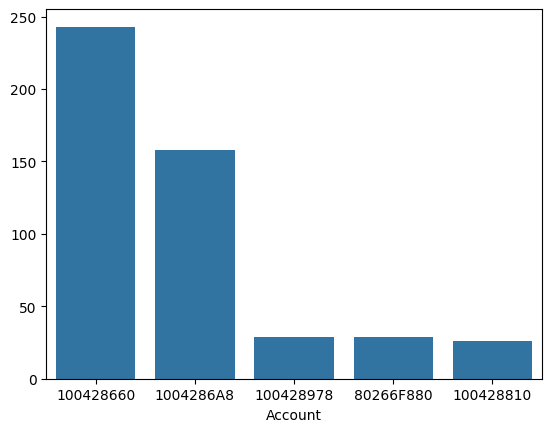

In [60]:
from_account =df[df["Is Laundering"]==1]["Account"].value_counts().head()
sns.barplot(x=from_account.index,y=from_account.values)



<Axes: xlabel='Account.1'>

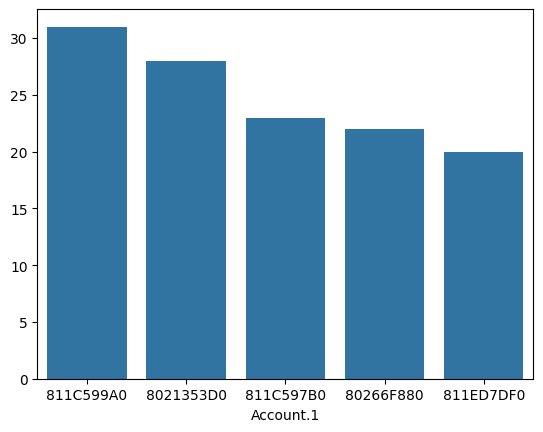

In [63]:
to_account_1=df[df["Is Laundering"]==1]["Account.1"].value_counts().head()
sns.barplot(x=to_account_1.index,y=to_account_1.values)

Interesting, one of the transactions originates and is recieved by 80266F880.

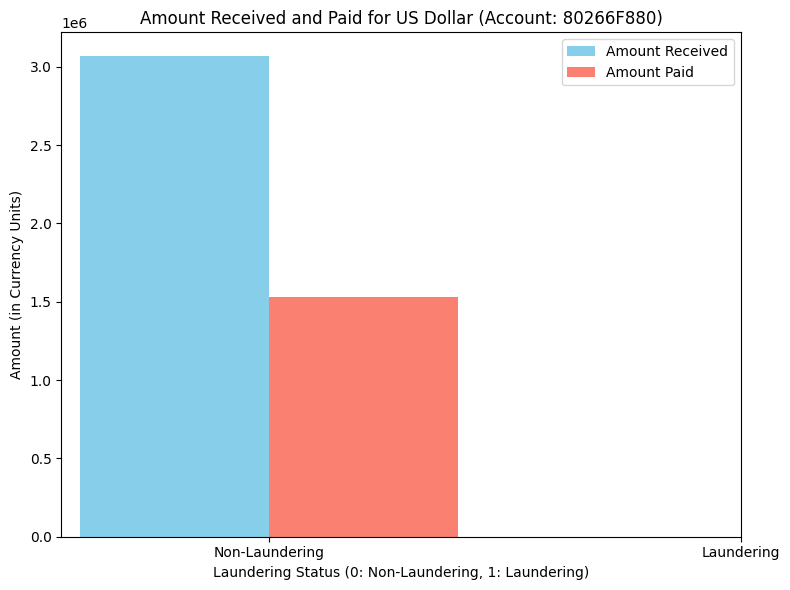

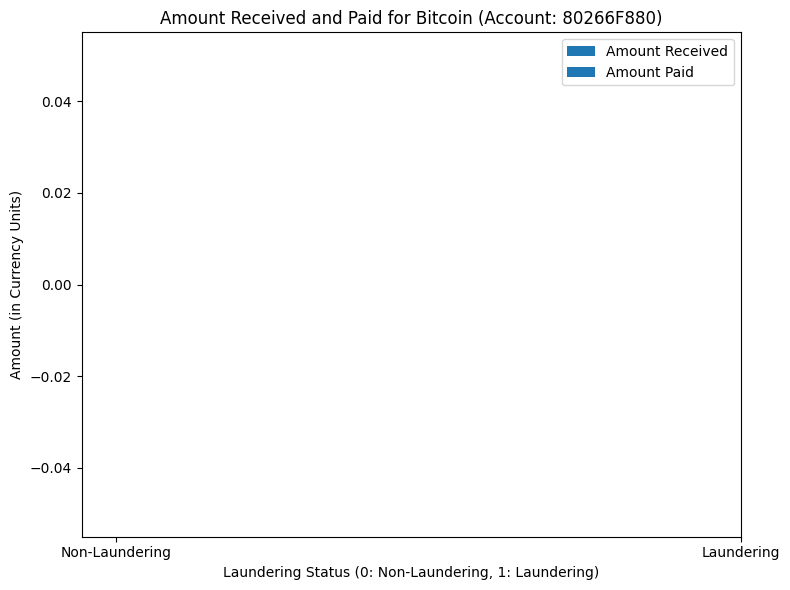

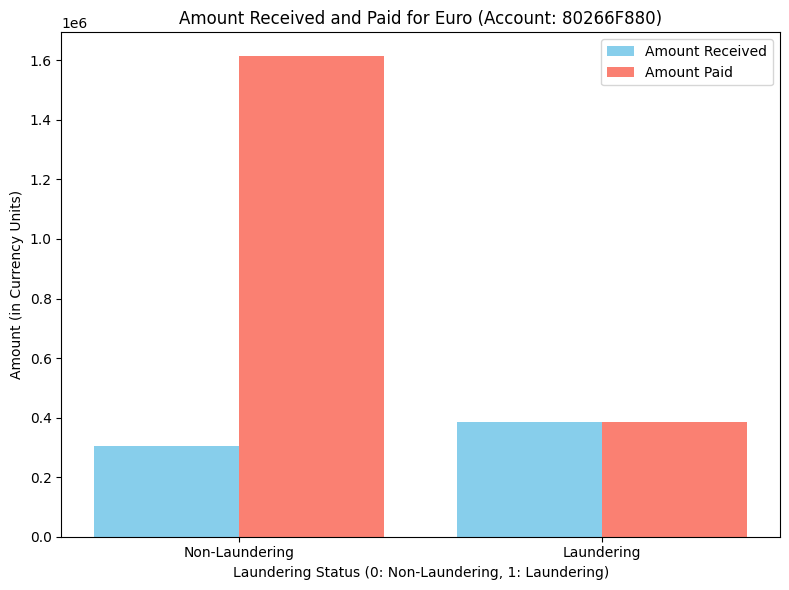

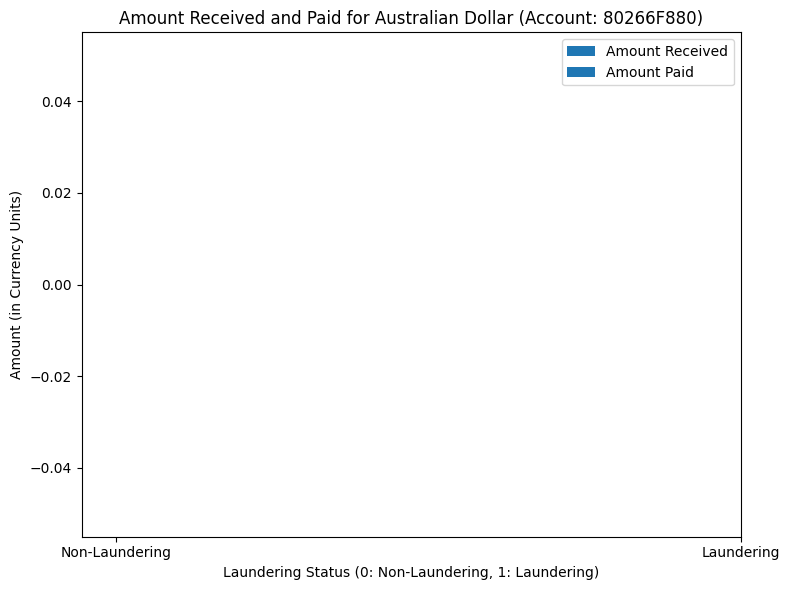

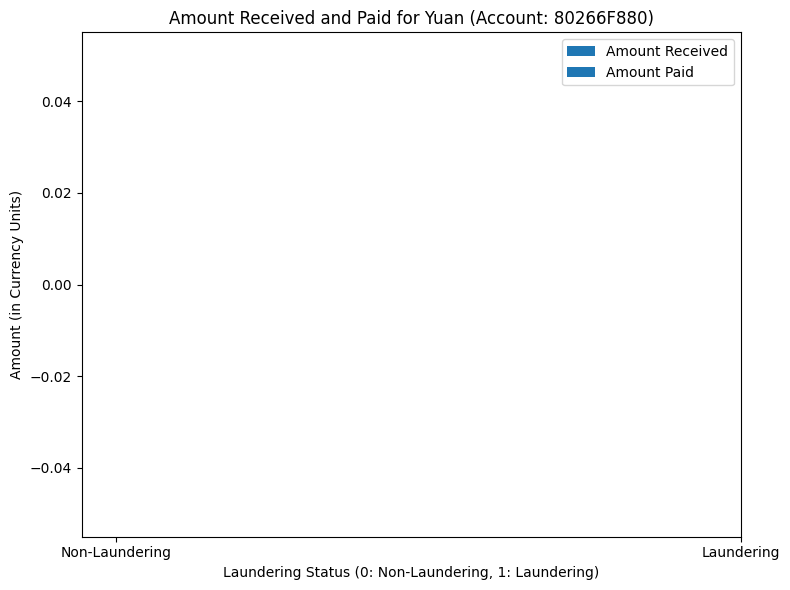

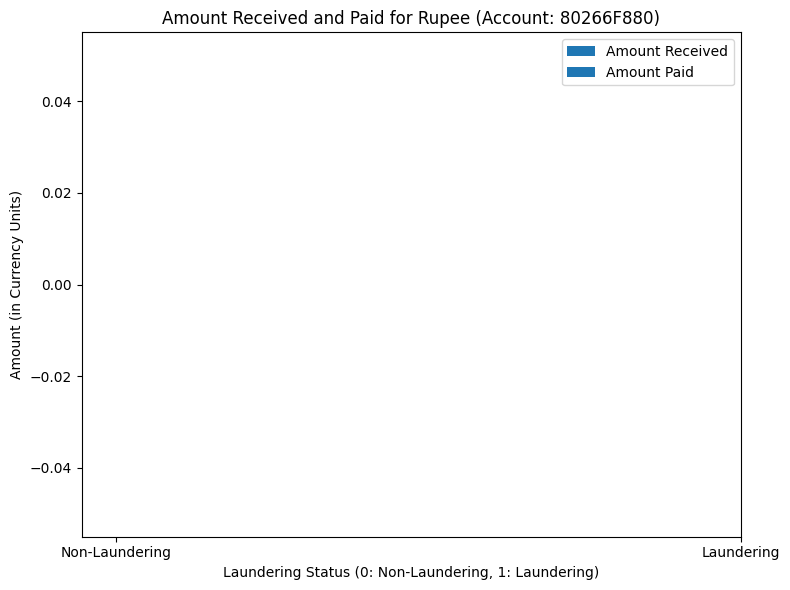

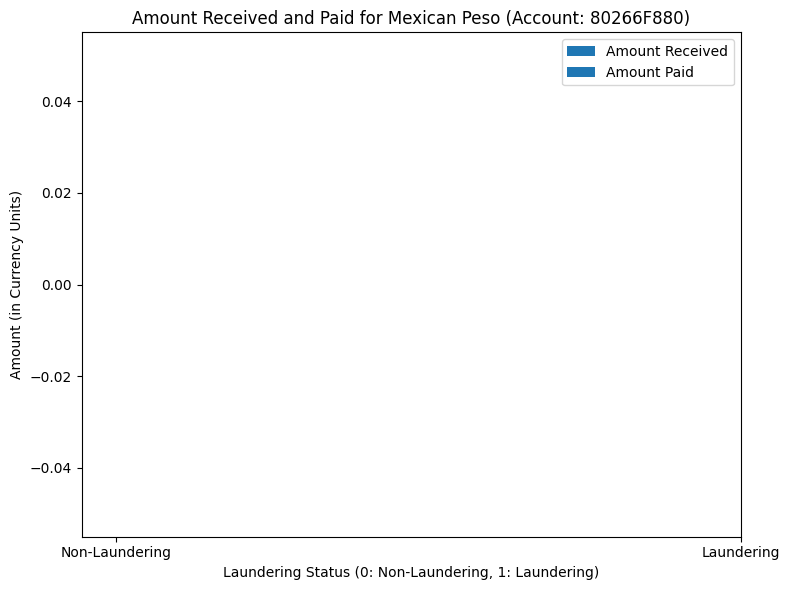

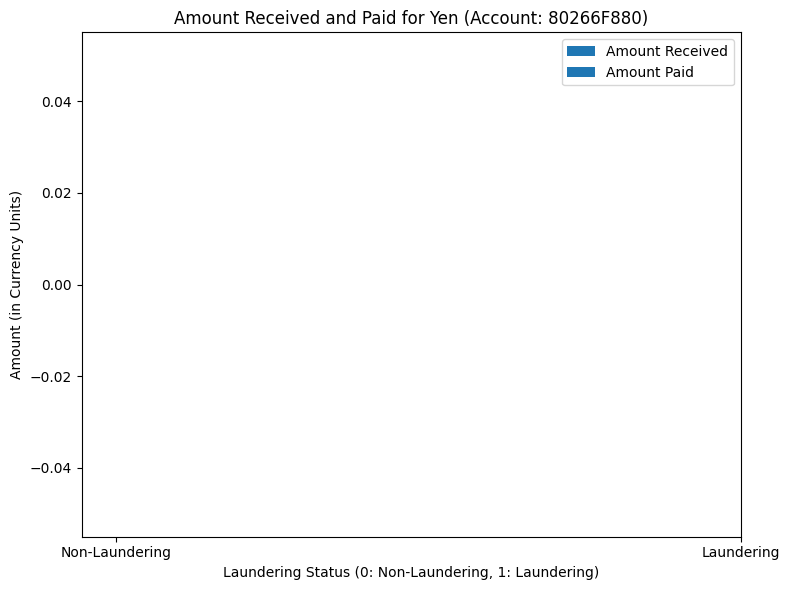

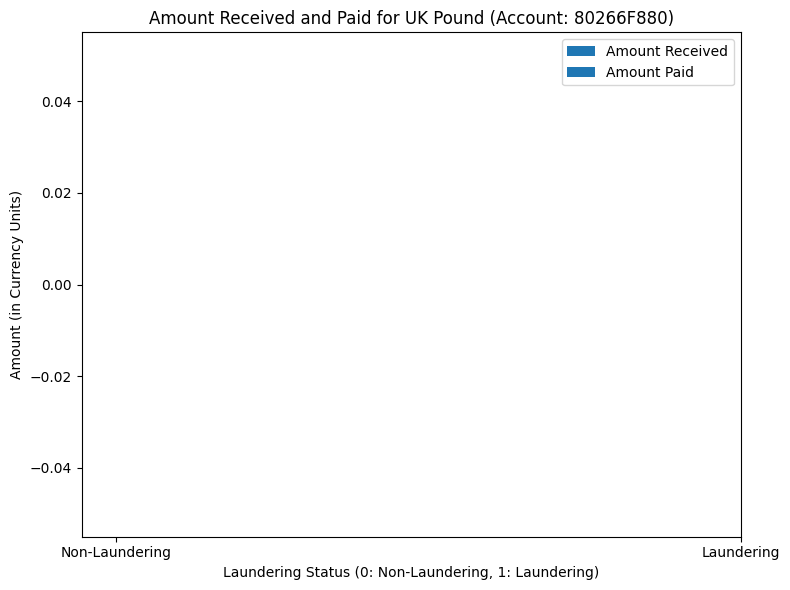

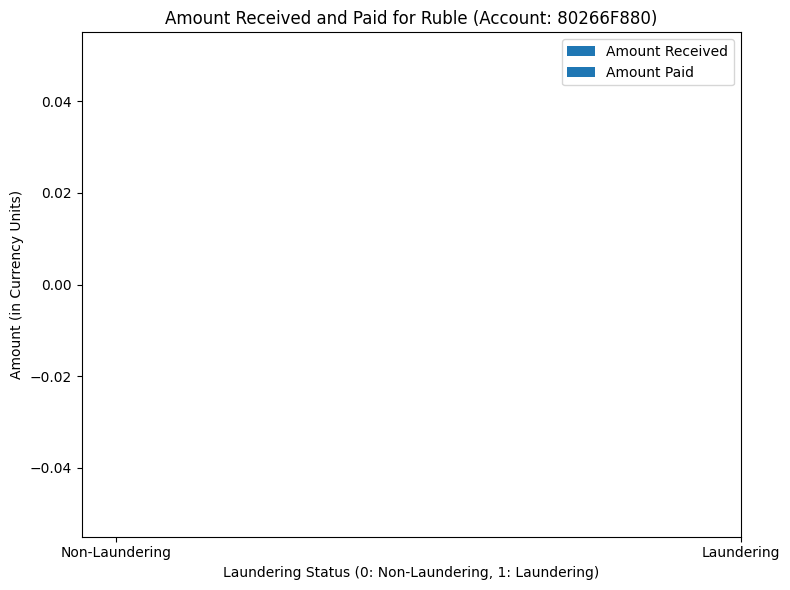

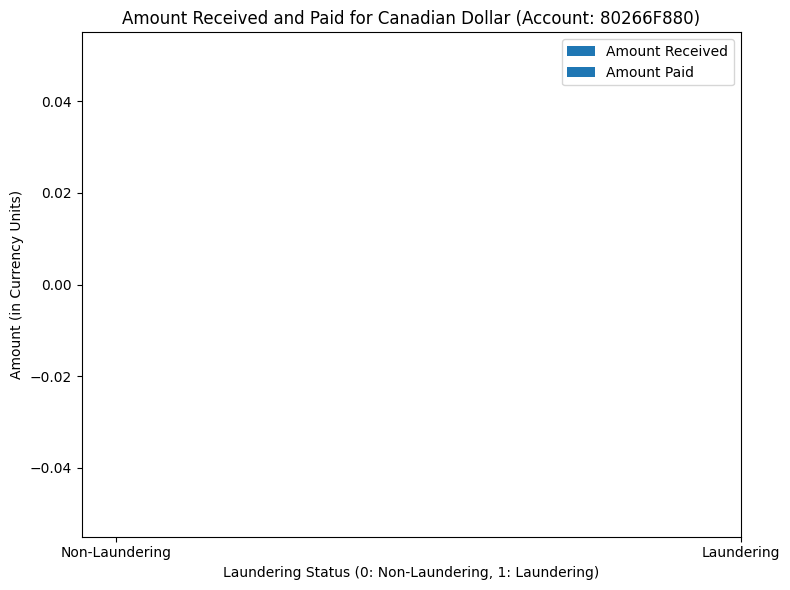

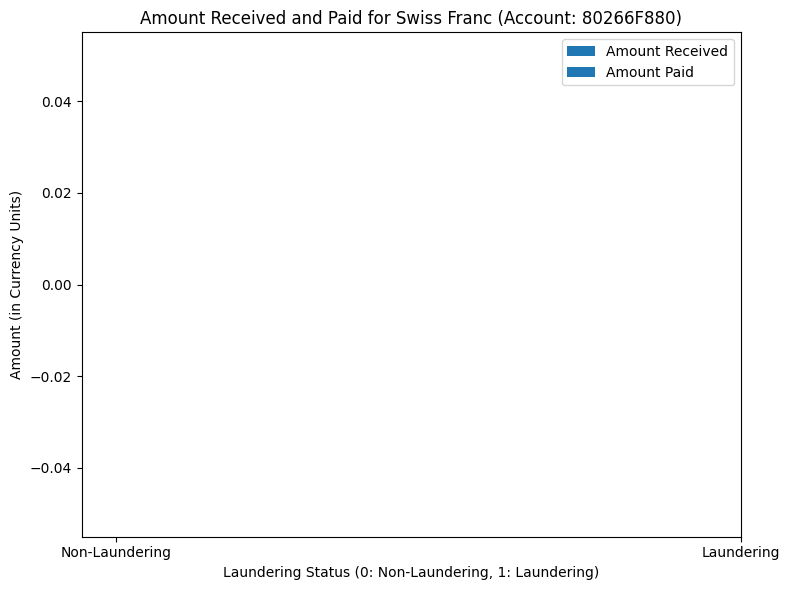

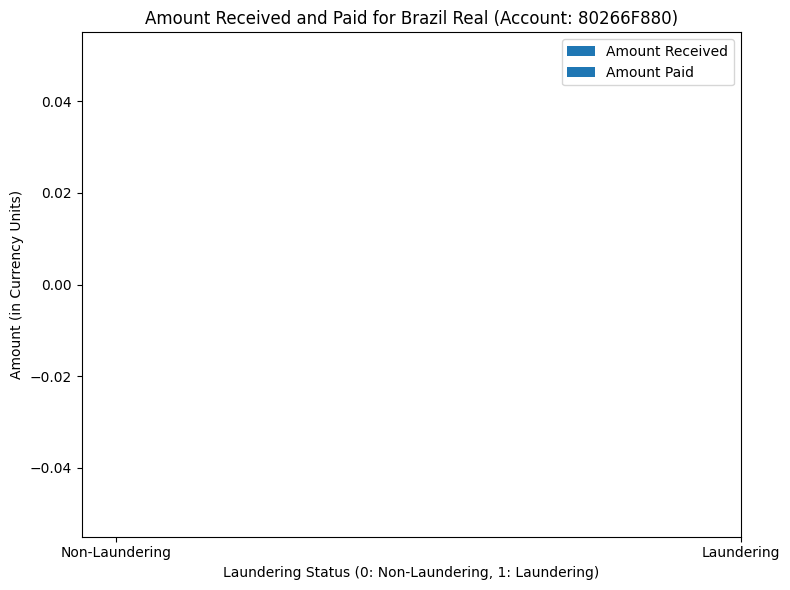

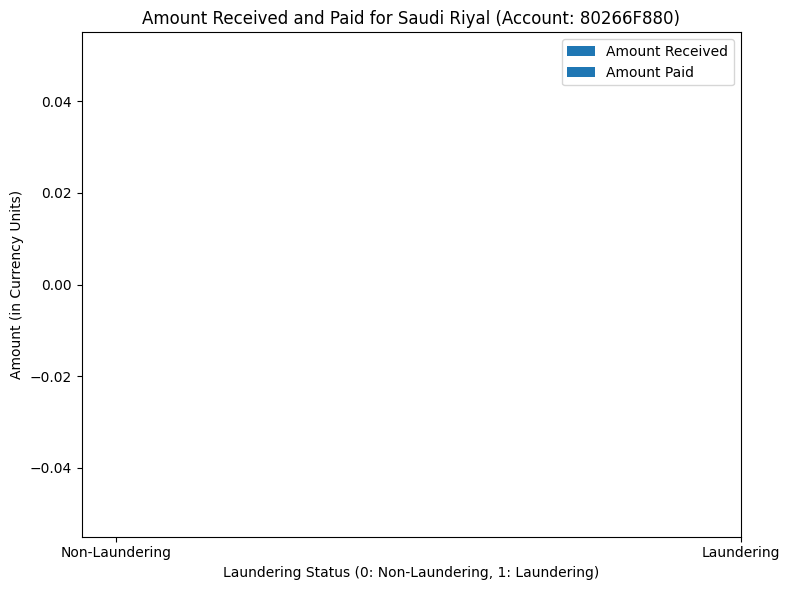

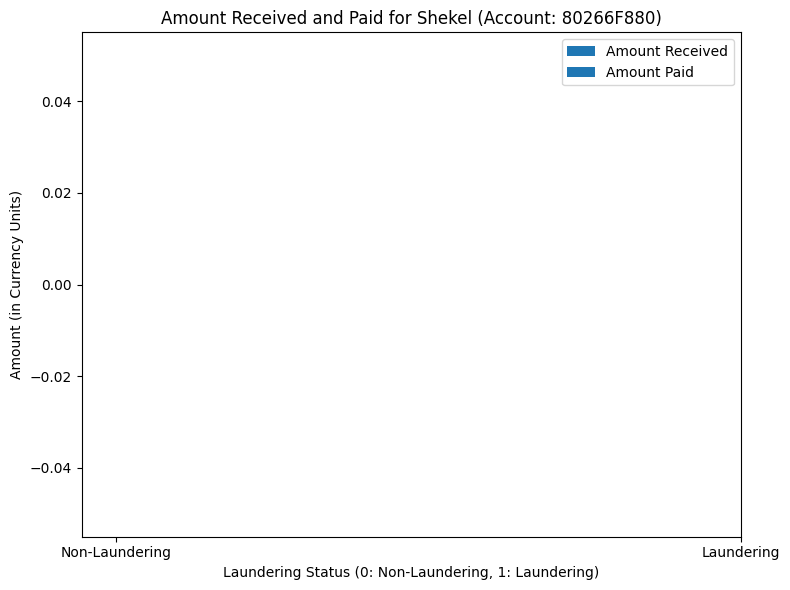

In [64]:
import pandas as pd
import matplotlib.pyplot as plt


account_filter = df[(df['Account'] == '80266F880') | (df['Account.1'] == '80266F880')]


currencies = ['US Dollar', 'Bitcoin', 'Euro', 'Australian Dollar', 'Yuan',
              'Rupee', 'Mexican Peso', 'Yen', 'UK Pound', 'Ruble',
              'Canadian Dollar', 'Swiss Franc', 'Brazil Real', 'Saudi Riyal', 'Shekel']


for currency in currencies:

    received_filter = account_filter[account_filter['Receiving Currency'] == currency]
    paid_filter = account_filter[account_filter['Payment Currency'] == currency]


    received_by_laundering = received_filter.groupby('Is Laundering')['Amount Received'].sum()
    paid_by_laundering = paid_filter.groupby('Is Laundering')['Amount Paid'].sum()


    fig, ax = plt.subplots(figsize=(8, 6))


    ax.bar(received_by_laundering.index - 0.2, received_by_laundering.values, width=0.4, label='Amount Received', color='skyblue')
    ax.bar(paid_by_laundering.index + 0.2, paid_by_laundering.values, width=0.4, label='Amount Paid', color='salmon')


    ax.set_title(f'Amount Received and Paid for {currency} (Account: 80266F880)')
    ax.set_xlabel('Laundering Status (0: Non-Laundering, 1: Laundering)')
    ax.set_ylabel('Amount (in Currency Units)')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Non-Laundering', 'Laundering'])
    ax.legend()


    plt.tight_layout()
    plt.show()


Interesting, transactions originating from and  recieved by 80266F880 seem to be in Euros, and it seems to be the same amount. Round-trip transactions are common in money laundering. These are transactions where the money originates from one account and is returned to the same or related account, often in the same amount. This might be done to obscure the origin of the funds or to make the transaction appear legitimate.
In this case, 80266F880 is both the originating and receiving account, and the amounts are identical, which is indicative of such round-trip activity.

In [117]:
# Create contingency table for To Bank and Is_Laundering
account_contingency = pd.crosstab(df['Account'], df['Is Laundering'])

# Perform chi-square test
to_bank_chi2, to_bank_p, to_bank_dof, to_bank_expected = st.chi2_contingency(account_contingency)

print("\nTo Bank Chi-square test results:")
print(f"Chi-square statistic: {to_bank_chi2}")
print(f"p-value: {to_bank_p}")
print(f"Degrees of freedom: {to_bank_dof}")


To Bank Chi-square test results:
Chi-square statistic: 1396927.3237582755
p-value: 0.0
Degrees of freedom: 496994


In [119]:
# Create contingency table for To Bank and Is_Laundering
account_1_contingency = pd.crosstab(df['Account.1'], df['Is Laundering'])

# Perform chi-square test
to_bank_chi2, to_bank_p, to_bank_dof, to_bank_expected = st.chi2_contingency(account_1_contingency)

print("\nTo Bank Chi-square test results:")
print(f"Chi-square statistic: {to_bank_chi2}")
print(f"p-value: {to_bank_p}")
print(f"Degrees of freedom: {to_bank_dof}")


To Bank Chi-square test results:
Chi-square statistic: 1130933.906476753
p-value: 0.0
Degrees of freedom: 420635


**High Chi-square Statistics:** Both tests yield extremely large chi-square statistics, indicating a very strong association between the Account/Account.1 variables and the Is Laundering variable. This could imply that certain accounts are disproportionately associated with laundering activities, assuming no underlying biases in the data.

**p-value of 0.0:** The p-value in both cases is 0.0, which is less than any standard significance level (e.g., 0.05 or 0.01). This suggests that the null hypothesis (that there is no association between the account and laundering status) can be rejected with very high confidence.

**Degrees of Freedom:** Both tests also have extremely high degrees of freedom, which likely corresponds to the large number of unique values in the Account and Account.1 variables. High degrees of freedom in chi-square tests can result from large contingency tables, which can inflate the chi-square statistic and might sometimes lead to overly strong conclusions about associations.

## From Bank/ To Bank

In [74]:
# Average transaction amounts between banks
amount_patterns = df.groupby(['From Bank', 'To Bank'])['Amount Received'].agg(['mean', 'min', 'max', 'count'])
amount_patterns

mean           min           max  count
From Bank To Bank                                                 
1         1        1.987968e+07  1.000000e-06  4.016071e+09   6556
          4        1.611799e+09  6.515756e+05  4.016071e+09     44
          6        1.539523e+06  1.539523e+06  1.539523e+06      1
          7        6.204890e+03  2.828670e+03  9.581110e+03      2
          8        2.564300e+02  2.960000e+01  5.004600e+02     28
...                         ...           ...           ...    ...
356295    255772   4.492000e-03  4.492000e-03  4.492000e-03      2
356296    255772   9.364000e-03  9.364000e-03  9.364000e-03      2
356300    55635    1.948287e-01  4.000000e-06  2.922410e-01      3
356302    255063   4.729000e-03  4.729000e-03  4.729000e-03      2
356303    255772   1.025600e-02  1.025600e-02  1.025600e-02      2

[283353 rows x 4 columns]

In [100]:
# Show which accounts are transacting with each other in laundering cases
laundering_pairs = df[df['Is Laundering']==1][['From Bank', 'Account', 'To Bank', 'Account.1']]
print("Account pairs involved in laundering:")
print(laundering_pairs)

Account pairs involved in laundering:
         From Bank    Account  To Bank  Account.1
4742            70  100428660     1124  800825340
40621           70  100428660    11474  805B716C0
69152           70  100428660    15980  80B39E7B0
85763           70  100428660   113798  80DC756E0
90684           70  100428660    32375  80E480620
...            ...        ...      ...        ...
5071168     111433  8065C2380    21550  8065C69E0
5073375          9  80727F930   219557  8072A28C0
5074248        222  812D127D0    50202  812D129C0
5075056      17327  8095F6C20    15695  8095F6C70
5077204          3  804FAA470   212789  804FAD580

[5177 rows x 4 columns]


In [101]:
# Top originating accounts by laundering frequency
top_from_accounts = df[df['Is Laundering']==1].groupby(['From Bank', 'Account']).size().sort_values(ascending=False)
print("Most frequent originating accounts in laundering:")
print(top_from_accounts.head(10))

# Top destination accounts by laundering frequency
top_to_accounts = df[df['Is Laundering']==1].groupby(['To Bank', 'Account.1']).size().sort_values(ascending=False)
print("\nMost frequent destination accounts in laundering:")
print(top_to_accounts.head(10))

Most frequent originating accounts in laundering:
From Bank  Account  
70         100428660    243
           1004286A8    158
           100428978     29
15231      80266F880     29
70         100428810     26
150240     812D22980     25
70         100428738     23
           1004286F0     21
23691      8021353D0     21
70         100428780     21
dtype: int64

Most frequent destination accounts in laundering:
To Bank  Account.1
48309    811C599A0    31
23691    8021353D0    28
119      811C597B0    23
15231    80266F880    22
48308    811ED7DF0    20
119      812A09CF0    19
222      811D80C30    18
         811B83280    17
19888    8079DDC30    16
11128    80465E020    16
dtype: int64


In [91]:
# Summary of laundering activity by bank and account
laundering_summary = pd.DataFrame({
    'From_Bank': df[df['Is Laundering']==1]['From Bank'],
    'From_Account': df[df['Is Laundering']==1]['Account'],
    'To_Bank': df[df['Is Laundering']==1]['To Bank'],
    'To_Account': df[df['Is Laundering']==1]['Account.1'],
    'Amount': df[df['Is Laundering']==1]['Amount Received']
}).sort_values('Amount', ascending=False)

print("Summary of laundering transactions:")
print(laundering_summary)

Summary of laundering transactions:
         From_Bank From_Account  To_Bank To_Account        Amount
557728           4    806B9AF90   116781  806B9B6A0  8.485314e+10
825119       14381    805C2AFB0    13029  805C2B8A0  6.641449e+10
2809336      24922    8096BB9C0      213  8096D4300  2.150069e+10
3162459        121    8000E1590   148016  811DCA680  2.597164e+09
2016473     142183    80FB2BED0    42596  80FB2D130  2.486913e+09
...            ...          ...      ...        ...           ...
3114014         70    100428A51    55188  814596F01  1.566700e-02
3084606         70    100428A51   153502  8148FEA11  9.925000e-03
4147414         70    100428A51    54219  814350FC1  9.257000e-03
2032778         70    100428A51       15  8137542F1  8.828000e-03
3055579         70    100428A51   153706  8148D50E1  3.227000e-03

[5177 rows x 5 columns]


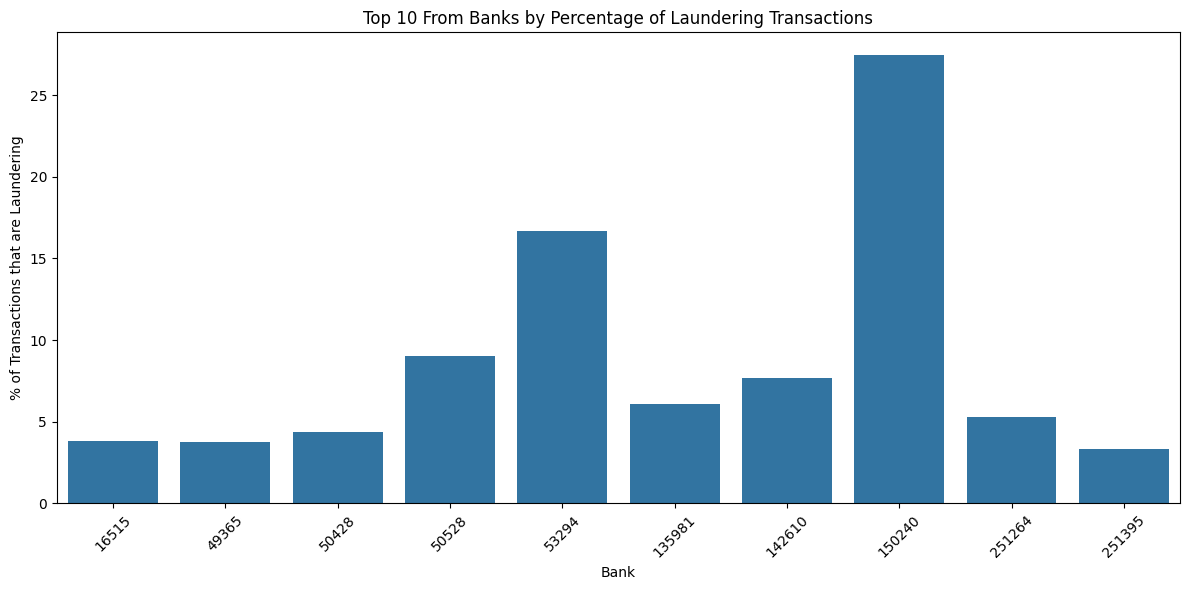

In [103]:
plt.figure(figsize=(12,6))

# Calculate percentage and get top 10
from_bank_pct = df.groupby('From Bank')['Is Laundering'].mean() * 100
top_10_pct = from_bank_pct.sort_values(ascending=False).head(10)

sns.barplot(x=top_10_pct.index, y=top_10_pct.values)
plt.title('Top 10 From Banks by Percentage of Laundering Transactions')
plt.xlabel('Bank')
plt.ylabel('% of Transactions that are Laundering')
plt.xticks(rotation=45)
plt.tight_layout()

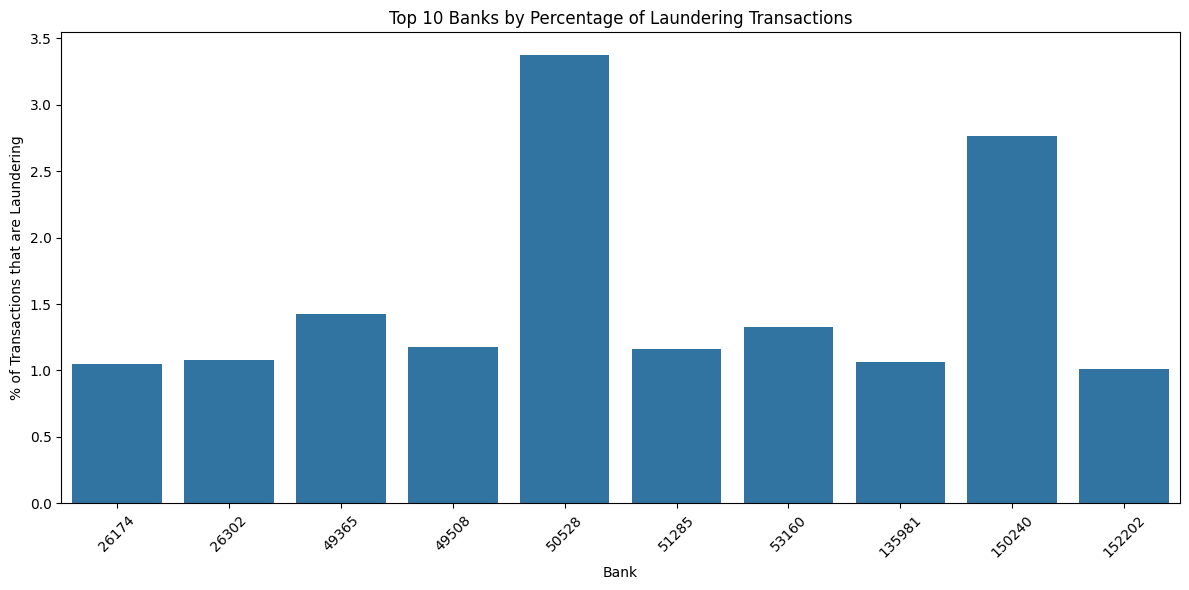

In [102]:
plt.figure(figsize=(12,6))

# Calculate percentage and get top 10
from_bank_pct = df.groupby('To Bank')['Is Laundering'].mean() * 100
top_10_pct = from_bank_pct.sort_values(ascending=False).head(10)

sns.barplot(x=top_10_pct.index, y=top_10_pct.values)
plt.title('Top 10 To Banks by Percentage of Laundering Transactions')
plt.xlabel('Bank')
plt.ylabel('% of Transactions that are Laundering')
plt.xticks(rotation=45)
plt.tight_layout()

So, it seems like specific banks have more number of laundered transactions than others. But let us verify.

In [107]:
# Create contingency table for From Bank and Is_Laundering
from_bank_contingency = pd.crosstab(df['From Bank'], df['Is Laundering'])

# Perform chi-square test
from_bank_chi2, from_bank_p, from_bank_dof, from_bank_expected = st.chi2_contingency(from_bank_contingency)

print("From Bank Chi-square test results:")
print(f"Chi-square statistic: {from_bank_chi2}")
print(f"p-value: {from_bank_p}")
print(f"Degrees of freedom: {from_bank_dof}")

From Bank Chi-square test results:
Chi-square statistic: 17376.22334611687
p-value: 1.0
Degrees of freedom: 30469


In [109]:
# Create contingency table for To Bank and Is_Laundering
to_bank_contingency = pd.crosstab(df['To Bank'], df['Is Laundering'])

# Perform chi-square test
to_bank_chi2, to_bank_p, to_bank_dof, to_bank_expected = st.chi2_contingency(to_bank_contingency)

print("\nTo Bank Chi-square test results:")
print(f"Chi-square statistic: {to_bank_chi2}")
print(f"p-value: {to_bank_p}")
print(f"Degrees of freedom: {to_bank_dof}")


To Bank Chi-square test results:
Chi-square statistic: 6623.292163210105
p-value: 1.0
Degrees of freedom: 15810


The p-value of 1.0 for both tests suggests that there is NOT a statistically significant relationship between:

- Which bank originates a transaction and whether it's laundering
- Which bank receives a transaction and whether it's laundering


This is somewhat surprising given our earlier observation that "specific banks have more number of laundered transactions than others."

This could mean:

- The differences we see in laundering frequencies might be proportional to the overall transaction volumes of these banks
- The large degrees of freedom (30469 and 15810) suggest we have many banks, which might be making it harder to detect relationships
- There might be other factors more strongly associated with laundering than just the bank identity

This feature might not be that useful in predicting whether a transaction is laundering or not.

## Payment Format

In [120]:
df["Payment Format"].unique()

array(['Reinvestment', 'Cheque', 'Credit Card', 'ACH', 'Cash', 'Wire',
       'Bitcoin'], dtype=object)

([<matplotlib.patches.Wedge at 0x7bfaff33da20>,
 [Text(-1.00388379253605, 0.44968581374492717, 'ACH'),
  Text(0.8785637435871084, -0.6619106801179492, 'Cheque'),
  Text(1.0427487478241586, -0.3502499806012124, 'Credit Card'),
  Text(1.090211716614044, -0.14641862230419836, 'Cash'),
  Text(1.099364901289936, -0.037373972384123676, 'Bitcoin')])

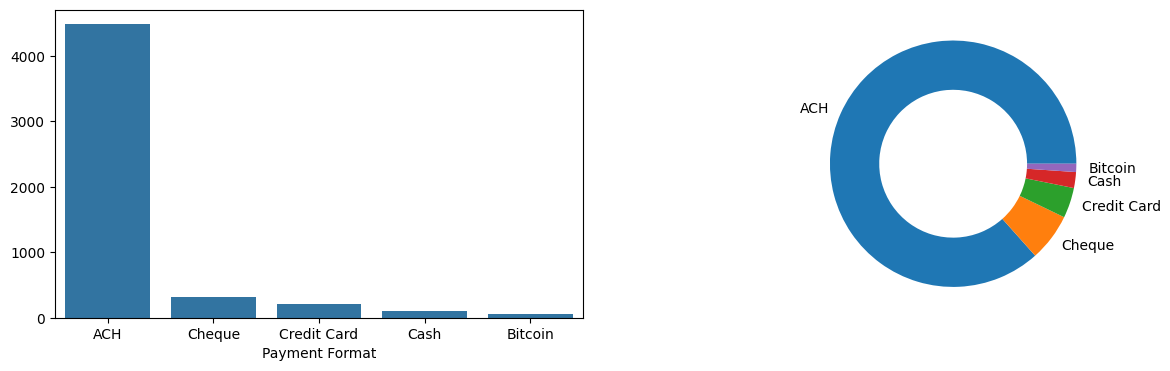

In [121]:
payment_format=df[df["Is Laundering"]==1]["Payment Format"].value_counts()

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.barplot(x=payment_format.index,y=payment_format.values)

plt.subplot(1,2,2)
plt.pie(payment_format.values,labels=payment_format.index,wedgeprops=dict(width=0.4))

We can see that majority of the laundered funds come from ACH accounts.

In [122]:
contingency_payment_format = pd.crosstab(df['Payment Format'], df['Time'])
x,p,y,z = st.chi2_contingency(contingency_payment_format)

if p < 0.05:
    print("There is a relationship")
else:
    print("There is no relationship")

There is a relationship


## Conclusion of Laundering

All in all, it seems that the following features might be good predictors for whether a particular transaction is laundering or not:
- The day that a transaction took place
- The originationg account
- The recieving account
- The amount recieved
- The amount paid
- The currency of the payment
- The format of the payment

We shall dive deep more into creating new features in the feature engineering section of this project